# A. Get the Data

## A.1 Frame the Problem

The subject of this project is to use AI models and algorithms for stock selection. We frame and divide this problem as follow:
* We want to predict the excessive return of each stocks in advance as accurately as possible
* We make use of such prediction to construct our portfolio

Thus, our task is to:
* Develop machine learning and deep learning models and algorithms that can predict labels (excessive returns) as accurately as possible, making full use of machine learning pipeline
* Develop algorithmic trading portfolios based on AI model's prediction
* Prove the algorithmic trading portfolios are profitable

We also want to highlight the importance to separate development environment and client/application environment from a software development view:
* The nature of development and client sides determines they take totally different tasks and should only focus on their own tasks in our framework:
    * The model development team should place themselves in the development side, where they should only focus on model's development and what they can deliver to the client
    * The portfolio team should place themselves in the client/application side, where they should only focus on the quality of the model they take from the model team and how they can benefit from the model's prediction through trading
* The requirements and implementations can change at a fast speed in software development, which raises the importance that changes in the development codes should lead to fewest changes in client codes, and that the client codes rely on development codes only in the interface level without knowing how such APIs got implemented.

We use object oriented design patterns to address these concerns.

## A.2 Collect Data

Please refer to the directory `./data` for how specific price & volume and fundamental data is collected and integrated into a dataset. On the high level, the dataset contains all the daily historical price and volume and fundamental data for available stocks in S&P 500, sorted first based on tickers then based on Date. The label of the dataset is `er`, which is the next day's excessive return against the current day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('./Stlearn')
from Stlearn.Factory import *
from Stlearn.Portfolio import *

data = pd.read_parquet('data/data.parquet.gzip')

In [2]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Adj Close,...,Book To Market,Cash To Price,Dividend To Price,Earning To Price,30 Day Momentum,180 Day Momentum,360 Day Momentum,1080 Day Momentum,return,er
1,1999-11-19,26.279474,26.317727,24.366850,24.711123,15234146.0,0.000,0.0,A,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.082386,0.090529
2,1999-11-22,25.284907,26.929766,24.519857,26.929766,6577870.0,0.000,0.0,A,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.089783,-0.079438
3,1999-11-23,26.011702,26.700248,24.481602,24.481602,5975611.0,0.000,0.0,A,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.090909,0.017706
4,1999-11-24,24.558100,25.667423,24.481594,25.131887,4843231.0,0.000,0.0,A,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.026562,0.003369
5,1999-11-26,25.017140,25.399665,24.940636,25.208403,1729466.0,0.000,0.0,A,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.003045,0.028967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122978,2022-10-28,151.777511,153.553736,150.200859,152.955002,1615500.0,0.000,0.0,ZTS,0.0,...,18.535096,1.731228e+07,0.000000,1.341571e+07,-4.011475,-45.280731,-20.660767,69.528549,0.014159,-0.006765
4122979,2022-10-31,152.110001,153.339996,149.839996,150.779999,1899000.0,0.325,0.0,ZTS,0.0,...,15.995462,1.756201e+07,0.002155,1.360923e+07,-6.076706,-46.958588,-22.192078,67.178452,-0.014220,0.016968
4122980,2022-11-01,151.399994,154.910004,150.380005,152.720001,2286200.0,0.000,0.0,ZTS,0.0,...,13.117629,1.733892e+07,0.000000,1.343635e+07,0.104279,-42.592453,-22.242554,69.512009,0.012866,-0.010095
4122981,2022-11-02,152.869995,153.210007,147.190002,147.360001,2638300.0,0.000,0.0,ZTS,0.0,...,11.780445,1.796960e+07,0.000000,1.392508e+07,-3.559326,-49.274902,-25.136749,64.278610,-0.035097,-0.099485


Below I provide a useful tool for searching for a specific feature or its similar ones in this dataset.

In [3]:
def search(target, data):
    for col in data.columns:
        if target in col:
            print(col)
    pass
search('Growth', data)

assetGrowth
inventoryGrowth
taxGrowth
commonStockGrowth
longTermDebtGrowth
depreciationGrowth
equityGrowth


## A.3 Split the Data

Here we provide a high level design for how to split our dataset. We can first abstract our dataset as the structure below. Here we cannot simply split data according to a portion of the dataset because:
* We may leak data containing future information into the training dataset
* We may completely throw a significant number of stocks completely into training and validation datasets

To perform a machine learning task that meets the appetite of logics and portfolio management, we split the dataset as follow:
* We set 4 time variables `train_start`, `val_start`, `test_start`, `test_end`, we ask these 4 variables to be continuous
* We slice data whose data falls between `train_start` and `test_end`
* We select all data that falls between `train_start` and `val_start` into training dataset
* We select all data that falls between `val_start` and `test_start` into validation dataset
* We select all data that falls between `test_start` and `test_end` into test dataset

By doing so, we ensure that training, validation and test data comes in a sequential order across time axis, and that we have data for all available stocks in each dataset within the given period. This also means that each stock in this structure will be split into three dataset in time order.

|  Date  |  Ticker  | Features |
|  ----  | ----  | ----  |
| 1996-01-01 | A | data |
| 1996-01-02 | A | data |
| ... | ... | ... |
| 2021-12-30 | A | data |
| 2021-12-31 | A | data |
| 1996-01-01 | B | data |
| 1996-01-02 | B | data |
| ... | ... | ... |
| 2021-12-30 | B | data |
| 2021-12-31 | B | data |
| ... | ... | ... |
| 1996-01-01 | Z | data |
| 1996-01-02 | Z | data |
| ... | ... | ... |
| 2021-12-30 | Z | data |
| 2021-12-31 | Z | data |

## A.4 Define A Performance Metric

In a classical regression problem set, we want to set the loss function to calculate the mean squared error between the predicted label and the true label. Similar to what may happen in imbalanced dataset, we want to give different weights to different samples considering their different impacts on predictions and errors.

In [4]:
ERROR = 'mean_squared_error'

def performance_measure(y_true, y_pred):
    m_ = eval(ERROR)
    print('weighted_{}: {:.5f}'.format(
        ERROR, m_(y_true, y_pred, sample_weight=abs(y_true) / np.sum(abs(y_true)))
    )
         )
    return m_(y_true, y_pred, sample_weight=abs(y_true) / np.sum(abs(y_true)))

Besides such difference between predicted label and true label, it is also important to implement performance measurement for portfolios constructed based on the model's prediction. This is in nature the ultimate purpose of this machine learning task and is widely used by literature and researches targeting on machine learning model's application in stock selection which is the same as this project. We hereby do the following implementation.

In the Stlearn framework, we implement a module named `Portfolio`. Within this module, we implement class `Portfolio` and class `Performance`.

Class `Portfolio` is an abstract class, whose `_strategy()` function is set to be abstract method. `Portfolio` encapsulate all relevant data for a portfolio constructed based on certain strategy for a given period. Different types of portfolios should be distinguished by different strategies used to construct them. Hereby, all users are required to write their own `Portfolio` subclasses by inheriting `Portfolio` class and override the abstract method `_strategy()`. This abstract method is expected to take in relevant data predicted by the model and information relevant to the stocks within a given period. It should use its own strategy to process the data and output lists of long stocks and short stocks.

When the `Portfolio` objects are instantiated, it calls the constructor, which then calls `construct()` function, which use model to make predictions based on the data. It then provides data for `_strategy()` function to determine a specific scheme for this portfolio. It finally calculates the performance for this portfolio. We can also use `add_portfolio()` here to combine the scheme of portfolios along the time so that we get a `Portfolio` object based on a longer time period.

```python
class Portfolio(ABC):

    _scheme = None

    _performance = None

    def __init__(self, data=None, model=None)

    @abstractmethod
    def construct(self, data, model)

    def add_portfolio(self, portfolio)
    
    @property
    def scheme(self):

    @property
    def performance(self)

    @abstractmethod
    def _strategy(self, df)
```

The `_performance` variable in the `Portfolio` class is a class `Performance` object, which is designed specifically to encapsulate all the data for performance for a given portfolio. The `Performance` object generally can only be modified by `Portfolio` object through `add()` or `update()` function, and only based on `daily_returns` parameter. After modification functions takes in the daily returns, they then call `_cal()` function to calculate all the metrics defined for a portfolio's performance. Here `update()` is to replace the current portfolio's performance with another performance, and `add()` is to add another portfolio's performance into the current portfolio along time axis.

```python
class Performance:
    _daily_returns = None

    _mean_return = None
    _volatility = None
    _sharpe_ratio = None

    _portfolio_value = None

    def __init__(self)

    def update(self, daily_returns)

    def add(self, daily_returns)

    def _cal(self)

    def __str__(self)
    
    __repr__ = __str__
```

# B. Exploratory Data Analysis

First let's have a look at the description of the specific features.
* Originally we have 153 features,
* We in fact have 151 numeric features

In [5]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close,market return,index,...,Book To Market,Cash To Price,Dividend To Price,Earning To Price,30 Day Momentum,180 Day Momentum,360 Day Momentum,1080 Day Momentum,return,er
count,4.121982e+06,4.121982e+06,4.121982e+06,4.121982e+06,4.121982e+06,4.121982e+06,4.121982e+06,4121982.0,4.121982e+06,4.121982e+06,...,4.121982e+06,4.121982e+06,4.121982e+06,4.121982e+06,4.121982e+06,4.121982e+06,4.121982e+06,4.121982e+06,4.121982e+06,4.121982e+06
mean,4.167175e+01,4.227816e+01,4.126591e+01,4.178305e+01,5.229103e+06,3.184850e-03,7.201114e-04,0.0,3.579877e-04,2.686780e+04,...,5.862625e+02,8.898819e+07,2.338008e-04,1.978590e+08,-1.006672e-03,6.565447e-03,1.520012e-02,3.360795e-02,6.451854e-04,2.871273e-04
std,1.131419e+02,1.145419e+02,1.116521e+02,1.131158e+02,2.862546e+07,9.078736e-02,4.229336e-02,0.0,1.147206e-02,1.985461e+04,...,6.941970e+04,5.356903e+08,9.613347e-03,7.414544e+08,2.145842e+01,5.353109e+01,7.882830e+01,1.198933e+02,2.903654e-02,2.685523e-02
min,0.000000e+00,1.825140e-03,1.825141e-03,1.858731e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-2.046693e-01,0.000000e+00,...,-3.808785e+04,-6.311038e+06,0.000000e+00,-5.025265e+09,-4.320464e+03,-5.012240e+03,-5.959055e+03,-5.958507e+03,-9.999677e-01,-1.026060e+00
25%,3.970627e+00,4.154000e+00,4.040813e+00,4.099411e+00,4.400005e+05,0.000000e+00,0.000000e+00,0.0,-4.533584e-03,7.950000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,8.176540e+06,-3.970020e-01,-3.406788e-01,-2.063268e-01,-6.080985e-02,-9.170268e-03,-8.292631e-03
50%,1.634660e+01,1.660000e+01,1.612937e+01,1.637164e+01,1.336900e+06,0.000000e+00,0.000000e+00,0.0,5.618658e-04,2.633500e+04,...,3.958598e+01,6.948877e+06,0.000000e+00,4.483550e+07,7.539332e-02,5.253236e-01,1.120000e+00,3.016903e+00,0.000000e+00,-8.477397e-06
75%,4.276713e+01,4.326408e+01,4.226480e+01,4.277521e+01,3.576062e+06,0.000000e+00,0.000000e+00,0.0,5.688621e-03,4.431200e+04,...,1.173795e+02,3.545844e+07,0.000000e+00,1.523635e+08,1.232762e+00,4.233203e+00,7.309181e+00,1.566483e+01,1.020014e-02,8.496218e-03
max,5.977610e+03,5.982450e+03,5.884060e+03,5.959330e+03,7.421641e+09,1.037500e+02,2.000000e+01,0.0,1.158004e-01,6.211500e+04,...,5.856076e+07,3.436786e+10,1.111525e+01,3.853355e+10,1.095460e+03,1.863930e+03,3.010640e+03,3.539030e+03,2.633333e+01,2.632821e+01


## B.1 Correlation

We then compute the following two series to have a look at correlations among features:
* `corr_between_features`: the pairwise correlation between each pair of combination of features
* `corr_with_return`: the correlation between each feature with return

In [6]:
data = pd.read_parquet('data/data.parquet.gzip')
corr_between_features = data.corr()

/var/folders/5f/54m_k2jx639_v5w_34k81lg40000gn/T/ipykernel_4221/2716324507.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_between_features = data.corr()


In [7]:
corr_between_features = data.corr()
corr_with_return = pd.DataFrame(data[[i for i in data.columns if i != 'er']].corrwith(data['er']), columns=['corr'])
corr_with_return['index'] = range(corr_with_return.shape[0])

/var/folders/5f/54m_k2jx639_v5w_34k81lg40000gn/T/ipykernel_4221/3790391096.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_between_features = data.corr()
/var/folders/5f/54m_k2jx639_v5w_34k81lg40000gn/T/ipykernel_4221/3790391096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_return = pd.DataFrame(data[[i for i in data.columns if i != 'er']].corrwith(data['er']), columns=['corr'])


We first plot the matrix of `corr_between_features`. One can easily make an observation that we have multiple blank stripes crossing inside the matrix image. We can then realize that such blank stripes may be attributed to some sort of abnormal distributions of data. Indeed, if we pick one example, say the 7th feature, we will see correlations between every other features with this 7th feature is `nan`, which means missing data. We can further dive into such feature and then easily observe that this is because the 7th feature is a time series consisting of solely 0. Using the similar logic, we pick up all features correspondent to such blank stripes and drop them. The features that are going to be dropped because they don't contain any data are:
* `accumulatedAmortization`
* `negativeGoodwill`
* `effectOfAccountingCharges`
* `otherItems`
* `Accural`

<AxesSubplot: >

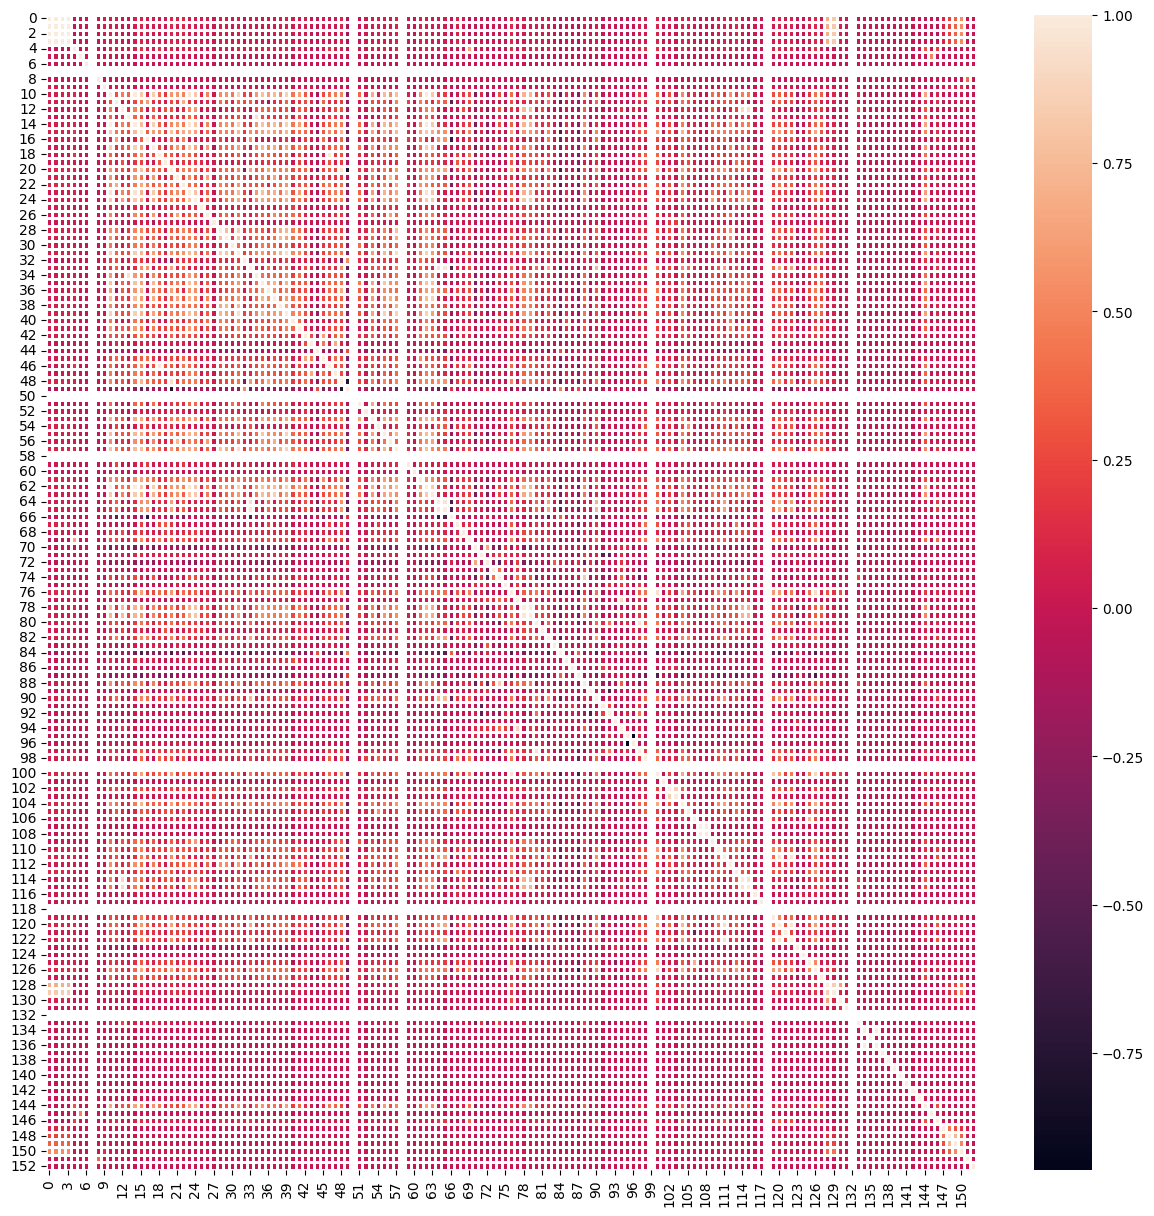

In [8]:
import seaborn as sns


fig, ax = plt.subplots(figsize=(15,15))

features = corr_between_features.columns
sns.heatmap(corr_between_features.values, linewidths=2, annot=False, ax=ax)

After dropping the useless features we can get a clearer correlation matrix. We can make the following observation with respect to correlations between pairs of features:
* The first 6 features are highly correlated
* No obvious clusters of highly correlated features, only some pairs of features show relatively high correlations among the first 50 features

/var/folders/5f/54m_k2jx639_v5w_34k81lg40000gn/T/ipykernel_4221/528111366.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_between_features = data.corr()
/var/folders/5f/54m_k2jx639_v5w_34k81lg40000gn/T/ipykernel_4221/528111366.py:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_return = pd.DataFrame(data[[i for i in data.columns if i != 'er']].corrwith(data['er']), columns=['corr'])


<AxesSubplot: >

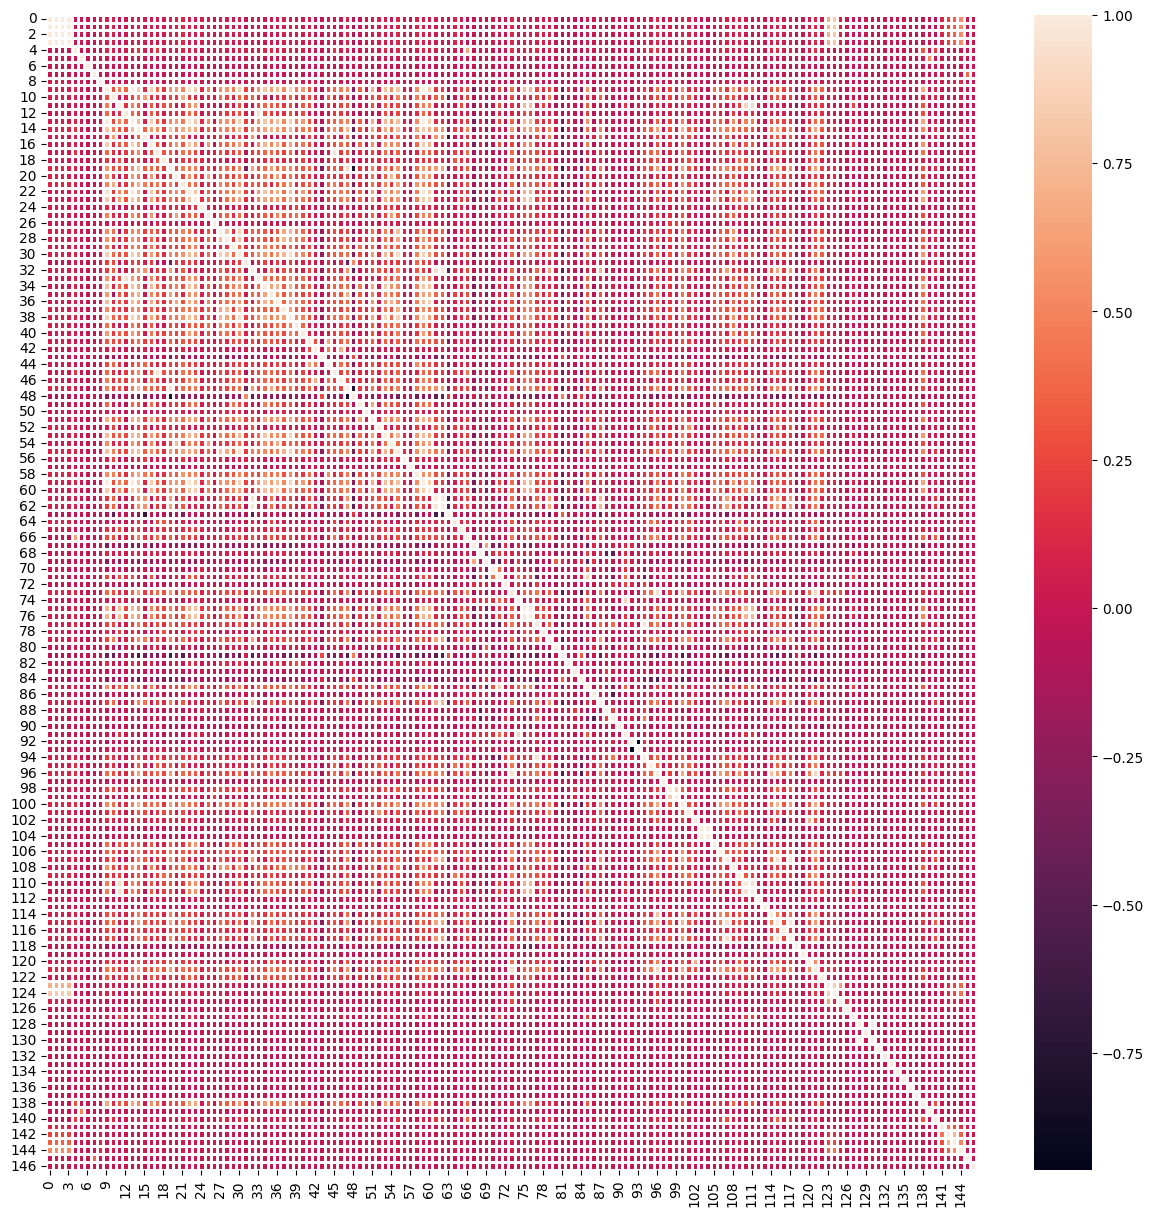

In [9]:
t = corr_between_features.isna().sum()
data = data.drop(t[t > 6].index, axis = 1)

corr_between_features = data.corr()
corr_with_return = pd.DataFrame(data[[i for i in data.columns if i != 'er']].corrwith(data['er']), columns=['corr'])
corr_with_return['index'] = range(corr_with_return.shape[0])

fig, ax = plt.subplots(figsize=(15,15))

features = corr_between_features.columns
sns.heatmap(corr_between_features.values, linewidths=2, annot=False, ax=ax)

We further examine the distribution of absolute values of all correlation numbers and plot them into histgram accordingly. We can conclude that most of correlations lie in the range between -0.25 and 0.75, only a very small portion is observed to have very extreme correlatioin.

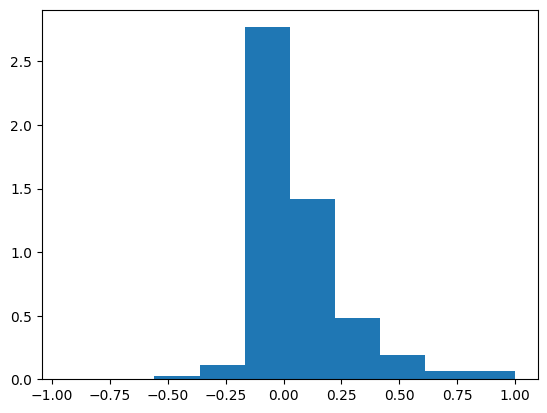

In [10]:
_ = plt.hist(corr_between_features.values.flatten(), density=True)

We also want to study the pattern of all features' correlation with excessive returns, thus plot them into a scatter chart. We make the following observations:
* The correlation between single feature with excessive return is not very significant, ranging from -0.008 to 0.015, which is very close to 0.
* Based on such premise, we can still identify several features which have relatively high correlation, we pick up all those features whose correlation with return is either higher than 0.002 or lower than -0.007 and present them below for potential use

<AxesSubplot: xlabel='index', ylabel='corr'>

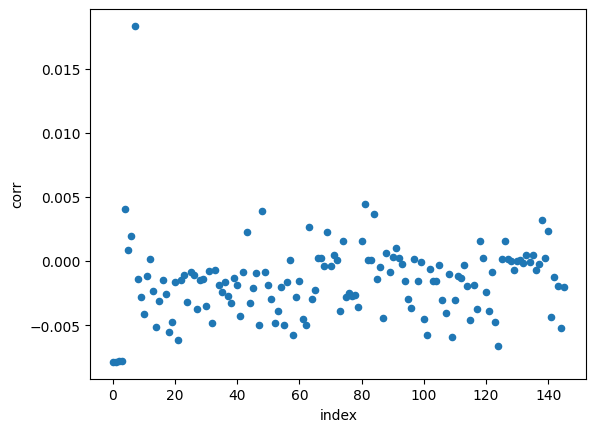

In [11]:
corr_with_return.plot(kind='scatter', x='index', y='corr')

In [12]:
corr_with_return[(corr_with_return['corr'] > 0.002) | (corr_with_return['corr'] < -0.007)]

,corr,index
Open,-0.007869,0
High,-0.007854,1
Low,-0.007801,2
Close,-0.007829,3
Volume,0.004055,4
market return,0.018338,7
accumulatedOtherComprehensiveIncome,0.002282,43
treasuryStock,0.003884,48
accumulatedDepreciation,0.002657,63
totalCashflowsFromInvestingActivities,0.002287,69


**Conclusion:** In this part, we explore the correlation among features and between features and excessive return. 
* We identify useless features through visualization of correlation matrix and drop them accordingly
* We believe the correlation among most features is in a resonable range, yet some of them is relatively extreme. For deep learning, we don't need to worry about this too much; but for classical machine learning models, we should use dimension reduction techniques to handle high correlations before feeding data into models
* The correlation between each single feature with excessive return is all low and close to 0, however we still manage to identify some feature with relatively high correlation with excessive return for potential use in classical machine learning models


## B.2 Technical Signals

This dataset builds its features following a literature review over prevail documentations on which financial and market data should be included in the dataset to help predict future excessive returns. One great group is different kinds of technical signals that are utilized by different investment strategies. We hereby study whether these technical signals can contribute to the prediction of excessive returns.

We observe that only Momentum can contribute to the prediction of excessive returns in a significant way. Yet it is no harm to retain other signals for deep learning.

In [13]:
import statsmodels.api as sm

x = data['30 Day Momentum'].values
y = data['er'].values


x2 =sm.add_constant(x)
est = sm.OLS(y,x2).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     78.04
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           1.01e-18
Time:                        15:14:01   Log-Likelihood:             9.0616e+06
No. Observations:             4121982   AIC:                        -1.812e+07
Df Residuals:                 4121980   BIC:                        -1.812e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   1.32e-05     21.707      0.0

In [14]:
x = data['Book To Market'].values
y = data['er'].values


x2 =sm.add_constant(x)
est = sm.OLS(y,x2).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2613
Date:                Sat, 12 Nov 2022   Prob (F-statistic):              0.609
Time:                        15:14:02   Log-Likelihood:             9.0616e+06
No. Observations:             4121982   AIC:                        -1.812e+07
Df Residuals:                 4121980   BIC:                        -1.812e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   1.32e-05     21.710      0.0

In [15]:
x = data['assetGrowth'].values
y = data['er'].values


x2 =sm.add_constant(x)
est = sm.OLS(y,x2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.004762
Date:                Sat, 12 Nov 2022   Prob (F-statistic):              0.945
Time:                        15:14:02   Log-Likelihood:             9.0616e+06
No. Observations:             4121982   AIC:                        -1.812e+07
Df Residuals:                 4121980   BIC:                        -1.812e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   1.32e-05     21.707      0.0

# C. Prepare the Data

## C.1 Transformations

The model practice of stock selection rely more on deep learning framework, where the transformation of the data features is essentially delayed from the data side to the model side, by adding reasonable design to neural networks layers serving as feature maps. We will discuss such design and implementations when we come across self defined deep learning models.

## C.2 Cleaning

As the dataset is collected by we ourselves, the cleaning issue has been accomplished in the data collection stage.

## C.3 Handling non-numeric features/targets

In this dataset, we conclude non-numeric features as follow:
* Date
* Ticker

While these two features cannot help when training, it contains important information to identify a sample. We hereby separate these features from X and y. We use a separate dataset to record relevant information that may be useful label during the prediction and test. We call this dataset idx, we put the non-numeric features into such dataset for future use.

## C.4 Scaling

To scale our data, we use `StandardScaler` from sklearn library.

## C.5 Data Windowing

For classical machine learning models, we use our dataset as its original 2-D dimensional shape of (number of samples, number of features), which is exactly the common practice. For deep learning models such as CNN or LSTM, we require a 3-D dimensional shape of (number of samples, length of look back period, number of features). This means that for each sample in this 3-D dimensional dataset, this is a 2-D dimensional sample, listing all features for all previous days or records within the given look back period.

The job to perform data windowing is a little bit challenging here:
* Due to the occurrence of padding, where we have to drop those initial samples who don't have enough previous records within the given look back period, we have to perform data windowing to the whole dataset at the very first stage and then split the dataset into training, validation and test dataset. We have to do this because otherwise each dataset will have to do padding and drop their initial samples, which is a waste of data, and can cause problems if we want to observe a continuous portfolio across time axis 

* Recall the structure of dataset again and we will realize that data windowing should be performed for each stock across the time axis. In terms of algorithm, a for loop over all stocks then combine all the datasets can be time consuming. We hereby do the data windowing over the whole dataset at first and then drop all initial samples for each stock using recorded indexes for those samples

<div class="alert alert-block alert-danger">
    <b>Warning:</b> 
    <br>
    The 3-D dataset mentioned above is really memory-consuming. Suppose we are considering a dataset with window size set to be 60, a dataset that covers all features for all stocks within a given year can consume at least 6GB memory. While the memory usage is an issue to optimize on in the future, at this time we should pay special attention to how big our `Data` object can be.
    
</div>

|  Date  |  Ticker  | Features |
|  ----  | ----  | ----  |
| 1996-01-01 | A | data |
| 1996-01-02 | A | data |
| ... | ... | ... |
| 2021-12-30 | A | data |
| 2021-12-31 | A | data |
| 1996-01-01 | B | data |
| 1996-01-02 | B | data |
| ... | ... | ... |
| 2021-12-30 | B | data |
| 2021-12-31 | B | data |
| ... | ... | ... |
| 1996-01-01 | Z | data |
| 1996-01-02 | Z | data |
| ... | ... | ... |
| 2021-12-30 | Z | data |
| 2021-12-31 | Z | data |

## C.6 Conclusion

Concluding the discussions above, we build a `Data` class to represent the whole dataset to perform machine learning/deep learning task. In general, object of this class is designed to do the following:
* Read collected price & volume & fundamental data from the disk
* Get indexes for training, validation and test dataset
* Divide data into X and y, handle non-numeric features and set aside ids
* If we require a 3-D dataset:
    * Perform data windowing over the whole dataset
    * Update indexes for training, validation and test dataset by kicking out indexes for samples that don't have enough previous records within given look back period for each stock
    * Split and return train, validation and test dataset based on updated indexes  
* else we require a 2-D dataset:
    * Split train, validation and test dataset based on updated indexes directly
* Perform scaling

We set the `Data` class to be an abstract class and derive two subclass from it:
* `MLData`: It defines its own constructor to pass arguments of machine learning data to call its super class constructor 
* `DLData`: It defines its own constructor to pass arguments of deep learning data to call its super class constructor 

# D. Train a Model

## D.1 Build Models

There are many available models in sklean and TensorFlow for users to research on, as well as many reusable codes for users to duplicate on. We hereby use a family of classes and objects to abstract these models so that users can only focus on the innovation of advanced models and call classical models conveniently.

We first define an abstract class `Model`, which represent all machine learning and deep learning models. Since it is unclear at this level such model is machine learning model or deep learning model, and because machine learning model and deep learning model depends on different libraries leading to different data and behavior of `Model` project, nearly all functions of this class is set to be abstract and needs to be override by its subclasses. In the design, the subclass should:
* Rewrite the constructor
* Override `_create_model()` to define a model using sklearn or TensorFlow and assign it to `_model` variable, or leaves it still abstract to be override by subclasses
* Override `fit()` to fit the already defined `_model`
* Override `evaluate()` to evaluate the performance of `_model`
* Override `info()` to print information of the current model

```python
class Model(ABC):
    _model = None
    _params = None
    _name = None

    @abstractmethod
    def __init__(self, name) -> None:
        self._create_model()
        self._name = name
        pass

    @abstractmethod
    def _create_model(self):
        pass

    @abstractmethod
    def fit(self, data) -> None:
        pass

    def predict(self, X):
        return self._model.predict(X)

    @abstractmethod
    def evaluate(self, data) -> None:
        pass

    @abstractmethod
    def info(self) -> None:
        pass

```

We further derive two subclasses from `Model` class, both override all the abstract methods except `_create_model()`, leaving these two subclasses still abstract. These two are:
* `MlModel`: It represents a machine learning model, which relies on sklearn
* `DlModel`: It represents a deep learning model, which replies on TensorFlow


We then implement some classical models by deriving from these two classes and only implementing the `_create_model()` function to define `_model` variable.

## D.2 Build Factories

To make the process of stock selection as clear as possible and to avoid potential changes in client codes as much as possible, we use `Factory` classes to create all products for machine learning/deep learning tasks we need. Similar to what we do with `Model` classes, `Factory` class is further derived by `MlFactor` and `DlFactor` to implement different ways to create machine learning and deep learning tasks' data and models. We then implement concrete classes by deriving from these two super classes and override `_load()` function to define how to create relevant data and models that will be finally returned to client codes.

```python
class StlearnFactory(ABC):

    _data = None
    _model = None

    _train_start = None
    _val_start = None
    _test_start = None
    _test_end = None

    _data_window_size = None

    def __init__(self, train_start, val_start, test_start, test_end):
        self._train_start = train_start
        self._val_start = val_start
        self._test_start = test_start
        self._test_end = test_end
        self._load()
        pass

    def create_data(self) -> Data:
        return self._data

    def create_model(self) -> Model:
        return self._model

    @abstractmethod
    def _load(self):
        pass
```

I develop Stlearn library to enclasp machine learning codes. I employ Object Oriented Design Patterns to design the framework. I use design patterns for this framework because:
* We should avoid add codes to existing classes to make them support more general information
* Handle possible future changes in requirement in advance 
* Enclasp as many code as possible and only write codes when necessary

To achieve this, I select [Abstract Factory Pattern](https://www.oodesign.com/abstract-factory-pattern) as my design pattern for Stlearn framework. Below, we define system as a machine learning client system that is either faced with commercial user, or faced with researcher that studies the performance of different machine learning models. We define product as required data and machine learning model. This pattern applies to our framework because:
* The system needs to be independent from the way the products are created, client only cares about what model to call and it is solely the developer's responsibility to implement and specify how products are created using specified protocol or API.
* The system should be configured to work with multiple families of products, where different machine learning task consist of pipelines with different dataset and models.
* A family of products is designed to work together, where one type machine learning task requires a specific type of data and models.

Based on general ideas of Abstract Factory Pattern, we design the framework and modules of Stlearn as follow:

<img src="./Stlearn/img/stframework.png" alt="framework" title="framework" width="4000" height="500"/>

In this framework, the client system is expected to use `Data` and `Model` objects and all their derived classes objects as their products to perform machine learning task. The rule of abstract factory discourages the client to directly call constructor of these objects to access specific product objects, because clients are expected not to know anything about how to construct or implement a specific product, and because how to construct and implement a specific product may change from time to time. Instead, the client is expected to go to `StlearnFactory` and all its derived classes to access specific product through unified and constant APIs.

For developer and producer who provides new model or new data to use, all they need to do is to:
* Derive a subclass from `MlModel` or `DlModel`, override the `_create_model()` function, where a specific machine learning or deep learning model which at lease has `fit()` and `predict()` function should be defined and assigned to `self._model` variable
* Derive a subclass from `MlData` or `DlData`, override the `_generate_data()` function, which should read data from a certain data source and then split it into train, validation and test dataset. For our problem, since data has already been provided, derive a new subclass is not necessary at all.
* Derive a subclass from `MlFactory` or `DlFactory`, override `_load()` function to initialize the relevant `Data` and `Model` object and return them accordingly.

## D.3 Select a Model

I select following models to perform machine learning/deep learning tasks:
* `RandomForestRegressor`: Random forest is well known for its capability to handle high dimensional data and feature extractions
* `LSTM`: LSTM is well-known to selectively memorize and forget features across time axis and thus of great help to handle sequential time-series data
* `CNN+LSTM`: One dimensional CNN is well known to extract features across time series. We hereby use it as an feature map to extract important features then feed feature maps into LSTM

Contrary to intuition, we build deep learning neural networks as multi-step model following the guidance of TensorFlow documentation and prevail literature. By multi-step model we are referring to such models that takes in structured features dataset and predict labels for multiple future sequential time steps at one time, rather than predict only one label for one future time step. The practical meaning of such implementation is that when doing prediction, based on features of previous days, we predict the excessive returns of next several days at the same time.

In this context, model's mathematical foundations can be classified to two different types:
* For un-sequential models, they still do single-shot predictions, which means they still take in only previous features of the current day and predict several days' label ahead of the current day in one single shot
* For sequential models, such as LSTM, they take in previous features of the current day and can predict features and labels one day ahead, but they can then feed the predicted data as input to predict the next next day's data sequentially

## D.4 Validation and Cross-Validation

<div class="alert alert-block alert-danger">
    <b>Warning:</b> 
    <br>
    Restart kernel here. Tasks below may be memory consuming. Also make sure delete data objects immediately once finished using.
    
</div>

In [1]:
import sys
sys.path.append('./Stlearn')
from Stlearn.Factory import *
from Stlearn.Portfolio import *

**Pipeline for Random Forest**

In [2]:
df = RandomForestRegressorFactory('2020-03-01', '2020-06-01', '2020-07-01', '2020-08-01')
data = df.create_data()
model = df.create_model()
model.fit(data)
model.evaluate(data, 'val')
del data

X_train shape: (31405, 152)
y_train shape: (31405,)
X_valid shape: (10976, 152)
y_valid shape: (10976,)
X_test shape: (10975, 152)
y_test shape: (10975,)
weighted_mean_squared_error: 0.00280


**Pipeline for LSTM**

X_train shape: (21856, 60, 152)
y_train shape: (21856,)
X_valid shape: (10958, 60, 152)
y_valid shape: (10958,)
X_test shape: (10975, 60, 152)
y_test shape: (10975,)
Parameters number in model:  10888


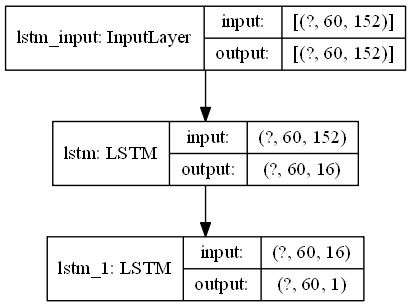

In [3]:
lstmf = LSTMFactory('2020-01-01', '2020-06-01', '2020-07-01', '2020-08-01', 60)
data = lstmf.create_data()
model = lstmf.create_model()
model.info()

Epoch 1/10
683/683 [==============================] - 12s 17ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - weighted_mean_squared_error: 0.0019 - val_loss: 6.2831e-04 - val_mean_squared_error: 6.2831e-04 - val_weighted_mean_squared_error: 6.2831e-04
Epoch 2/10
683/683 [==============================] - 11s 16ms/step - loss: 9.2071e-04 - mean_squared_error: 9.2071e-04 - weighted_mean_squared_error: 9.2071e-04 - val_loss: 5.9412e-04 - val_mean_squared_error: 5.9412e-04 - val_weighted_mean_squared_error: 5.9412e-04
Epoch 3/10
683/683 [==============================] - 11s 16ms/step - loss: 9.1392e-04 - mean_squared_error: 9.1392e-04 - weighted_mean_squared_error: 9.1392e-04 - val_loss: 5.9551e-04 - val_mean_squared_error: 5.9551e-04 - val_weighted_mean_squared_error: 5.9551e-04
Epoch 4/10
683/683 [==============================] - 11s 16ms/step - loss: 9.1217e-04 - mean_squared_error: 9.1217e-04 - weighted_mean_squared_error: 9.1217e-04 - val_loss: 6.0524e-04 - val_mean_squared_erro

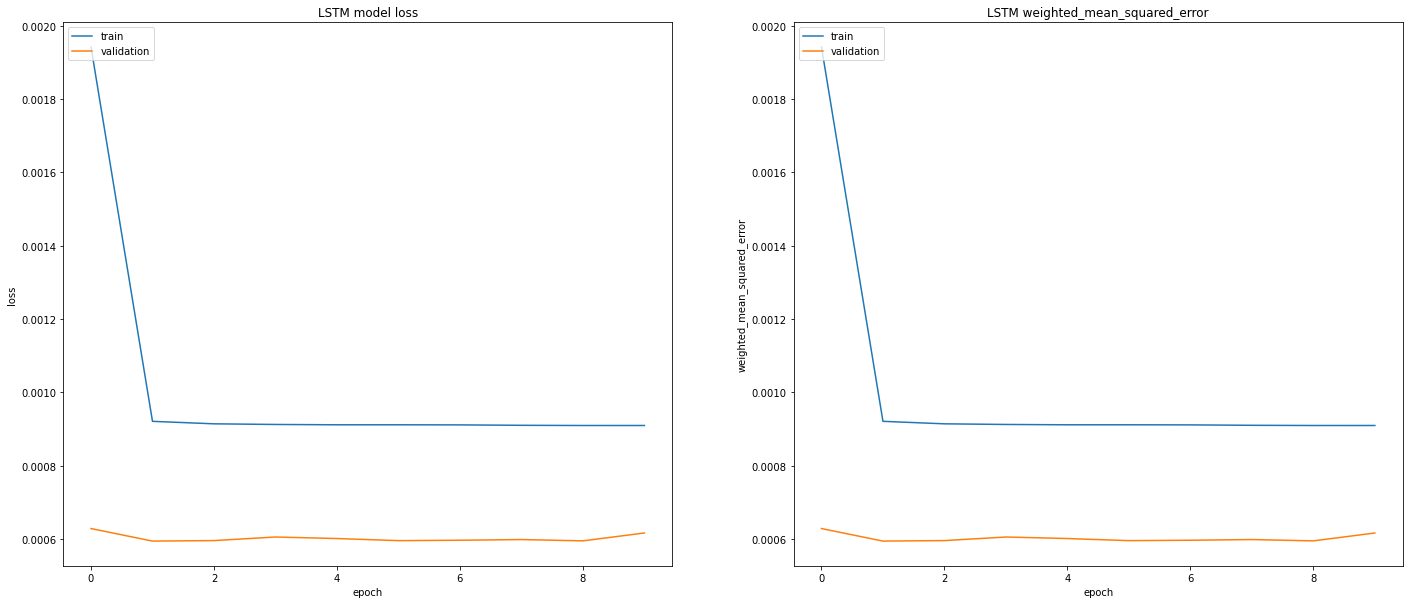

In [4]:
model.fit(data)

In [5]:
model.evaluate(data, 'val')
del data

343/343 [==============================] - 2s 5ms/step - loss: 6.1619e-04 - mean_squared_error: 6.1619e-04 - weighted_mean_squared_error: 6.1619e-04
LSTM: Test loss: 0.00062


**Pipeline for CNN+LSTM**

In [6]:
class CNNLSTMModel(DlModel):
    def _create_model(self):
        self._model = tf.keras.Sequential([
            tf.keras.layers.Conv1D(25, padding='same', kernel_size=(1,), 
                               activation='relu', input_shape=self._input_shape),
            tf.keras.layers.Conv1D(50, padding='same', kernel_size=(1,), 
                               activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.LSTM(1, return_sequences=True)
        ])
    pass

class CNNLSTMFactory(DlFactory):
    def _load(self):
        super()._load()
        self._model = CNNLSTMModel('CNNLSTM', self._data.get_shape())
    pass

X_train shape: (21856, 60, 152)
y_train shape: (21856,)
X_valid shape: (10958, 60, 152)
y_valid shape: (10958,)
X_test shape: (10975, 60, 152)
y_test shape: (10975,)
Parameters number in model:  5333


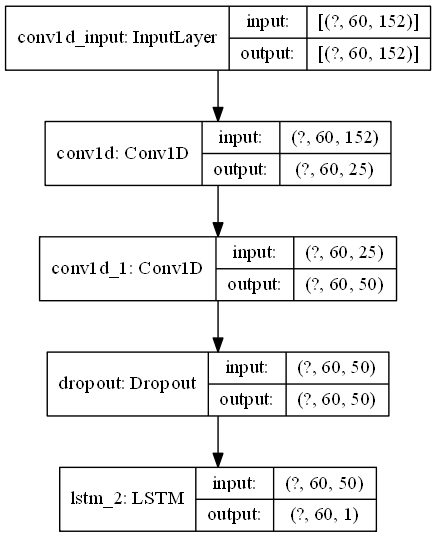

In [7]:
lstmf = CNNLSTMFactory('2020-01-01', '2020-06-01', '2020-07-01', '2020-08-01', 60)
data = lstmf.create_data()
model = lstmf.create_model()
model.info()

Epoch 1/10
683/683 [==============================] - 8s 12ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - weighted_mean_squared_error: 0.0022 - val_loss: 5.8748e-04 - val_mean_squared_error: 5.8748e-04 - val_weighted_mean_squared_error: 5.8748e-04
Epoch 2/10
683/683 [==============================] - 7s 11ms/step - loss: 9.1473e-04 - mean_squared_error: 9.1473e-04 - weighted_mean_squared_error: 9.1473e-04 - val_loss: 5.8782e-04 - val_mean_squared_error: 5.8782e-04 - val_weighted_mean_squared_error: 5.8782e-04
Epoch 3/10
683/683 [==============================] - 7s 10ms/step - loss: 9.1465e-04 - mean_squared_error: 9.1465e-04 - weighted_mean_squared_error: 9.1465e-04 - val_loss: 5.8784e-04 - val_mean_squared_error: 5.8784e-04 - val_weighted_mean_squared_error: 5.8784e-04
Epoch 4/10
683/683 [==============================] - 7s 10ms/step - loss: 9.1442e-04 - mean_squared_error: 9.1442e-04 - weighted_mean_squared_error: 9.1442e-04 - val_loss: 5.8784e-04 - val_mean_squared_error: 5

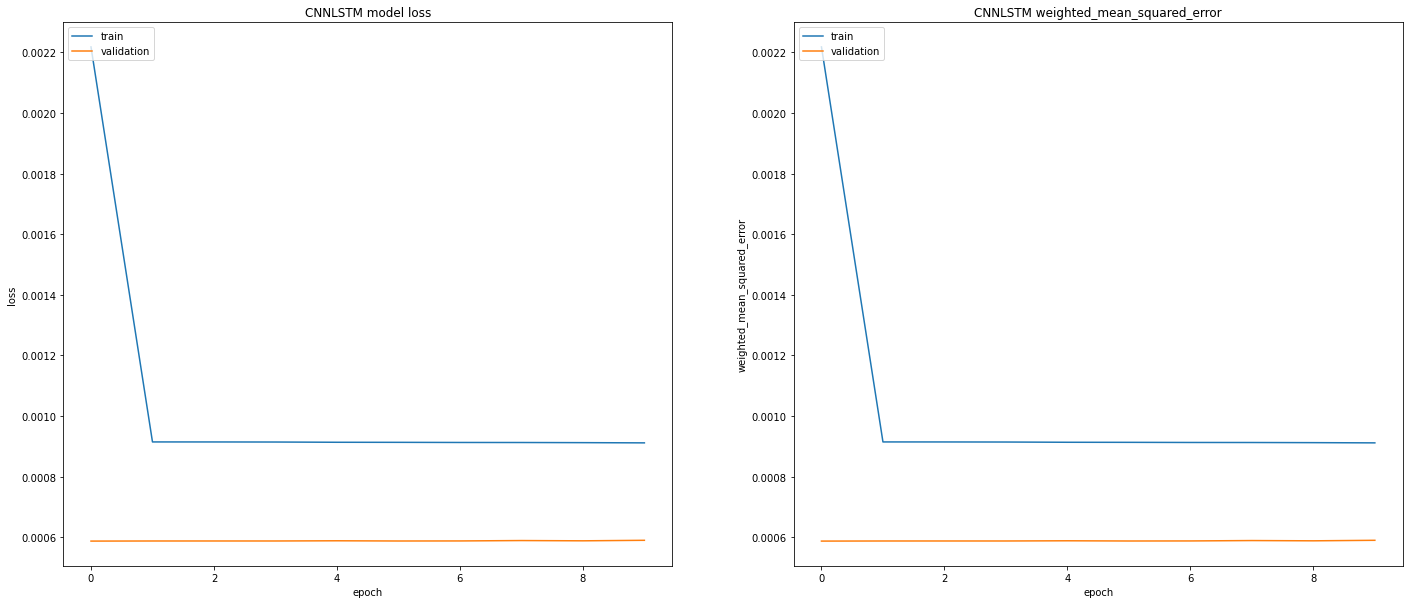

In [8]:
model.fit(data)

In [9]:
model.evaluate(data, 'val')
del data

343/343 [==============================] - 1s 3ms/step - loss: 5.9008e-04 - mean_squared_error: 5.9008e-04 - weighted_mean_squared_error: 5.9008e-04
CNNLSTM: Test loss: 0.00059


## D.5 Performance Test

As discussed in section A, we not only want to know how close the predicted label is to the true label, but also want to confirm the profitability of using such predictions. We built `Portfolio` class to construct portfolios based on the model's prediction.

In the world of portfolio management, we are actually not satisfied with portfolio's performance based on only one test period. We may be more interested in the long-term performance of portfolio using model's prediction continuously. We hereby perform rolling test of performance of model's prediction and portfolio constructed accordingly. By rolling test:
* We generate our dataset iteratively and continuously across a certain period, and split the dataset in a consistent way
* In such contest, dataset in each iteration is continuous, and its split portion: training, validation and test in particular are continuous
* For each iteration:
    * We fit the model on training and validation dataset
    * We test the portfolio performance on the test dataset
* We finally have a portfolio performance over a continuous time period
* We can view this portfolio performance as such that uring each sub period of this time series:
    * we train data according to the previous dataset
    * We select stock into our portfolio based on the model's prediction on their future performance
    * We rebalance our portfolio in the same way after we hold it for a certain period
* This is ultimately how our model will come to stock selection and thus reflects its long-term profitability

To better perform the rolling test, we provide a `DateGenerator` class as a date time generator to roll over the time axis from the designated start date time. This class takes in string and convert it into self-defined `Date` object to generate next available date given certain `frequency` (the unit of how frequently we rebalance our portfolio, day, year or month), `offset` (the number of how frequently we rebalance our portfolio, 1, 2, or 3), and `limit` (how long of the periods are we testing the portfolio's performance)

During the test, as we discussed in section A, we provide `Portfolio` objects to track portfolio performance. For the functionality of the test, we derive two subclasses from `Portfolio` class:
* `GlobalPortfolio`: It serves as a global tracking portfolio to track concatenated portfolios across the time axis
* `AlgoTradePortfolio`: It defines the skeleton for portfolios following using a certain algorithm to trade; It also defines that each of its subclass will define their class static variable `global_portfolio` as a `GlobalPortfolio`'s object to track all constructed portfolios of current class across time axis.

<div class="alert alert-block alert-info">
    <b>Note:</b> 
    <br>
    It is assumed that machine learning strategy should be consistent over the test time, it is not logical for one to change between different strategies during the test time. Under this assumption, the `global_portfolio` variable within each subclasses of `AlgoTradePortfolio` should be consistent across test time. However, if one insists on changing between different strategies across time, we can still construct a local `GlobalPortfolio` object in the test codes and manually add all portfolios into this local object during each iteration using the `add_portfolio()` method.
    
</div>

From `AlgoTradePortfolio`, we derive three concrete subclasses for portfolios based on concrete strategies:
* `LongMarketPortfolio`: It longs the market portfolio
* `LongRandomPortfolio`: It longs a randomly selected stock during each period
* `LongBestPortfolio`: It longs the stock with the highest predicted excessive returns during each period.
* `LongBestThreePortfolio`: It longs the three stocks with the highest predicted excessive returns during each period.

<div class="alert alert-block alert-danger">
    <b>Warning:</b> 
    <br>
    Restart kernel here. Tasks below may be memory consuming. Also make sure delete data objects immediately once finished using.
    
</div>

In [1]:
import sys
sys.path.append('./Stlearn')
from Stlearn.Factory import *
from Stlearn.Portfolio import *

class CNNLSTMModel(DlModel):
    def _create_model(self):
        self._model = tf.keras.Sequential([
            tf.keras.layers.Conv1D(25, padding='same', kernel_size=(1,), 
                               activation='relu', input_shape=self._input_shape),
            tf.keras.layers.Conv1D(50, padding='same', kernel_size=(1,), 
                               activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.LSTM(1, return_sequences=True)
        ])
    pass

class CNNLSTMFactory(DlFactory):
    def _load(self):
        super()._load()
        self._model = CNNLSTMModel('CNNLSTM', self._data.get_shape())
    pass

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-01-01 To 2020-01-01), Validation[2020-01-01 To 2020-07-01), Test[2020-07-01 To 2020-08-01)
X_train shape: (95638, 60, 152)
y_train shape: (95638,)
X_valid shape: (62137, 60, 152)
y_valid shape: (62137,)
X_test shape: (10975, 60, 152)
y_test shape: (10975,)
Parameters number in model:  5333
Epoch 1/10


2022-11-12 18:31:29.047457: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2989/2989 [==============================] - 48s 15ms/step - loss: 3.4245e-04 - mean_squared_error: 3.4245e-04 - weighted_mean_squared_error: 3.4245e-04 - val_loss: 9.2922e-04 - val_mean_squared_error: 9.2922e-04 - val_weighted_mean_squared_error: 9.2922e-04
Epoch 2/10
2989/2989 [==============================] - 29s 10ms/step - loss: 2.2316e-04 - mean_squared_error: 2.2316e-04 - weighted_mean_squared_error: 2.2316e-04 - val_loss: 9.2922e-04 - val_mean_squared_error: 9.2922e-04 - val_weighted_mean_squared_error: 9.2922e-04
Epoch 3/10
2989/2989 [==============================] - 29s 10ms/step - loss: 2.2316e-04 - mean_squared_error: 2.2316e-04 - weighted_mean_squared_error: 2.2316e-04 - val_loss: 9.2922e-04 - val_mean_squared_error: 9.2922e-04 - val_weighted_mean_squared_error: 9.2922e-04
Epoch 4/10
2989/2989 [==============================] - 29s 10ms/step - loss: 2.2316e-04 - mean_squared_error: 2.2316e-04 - weighted_mean_squared_error: 2.2316e-04 - val_loss: 9.2922e-04 - val_mean_squ

Epoch 2/10
2994/2994 [==============================] - 30s 10ms/step - loss: 2.3838e-04 - mean_squared_error: 2.3838e-04 - weighted_mean_squared_error: 2.3838e-04 - val_loss: 9.5283e-04 - val_mean_squared_error: 9.5283e-04 - val_weighted_mean_squared_error: 9.5283e-04
Epoch 3/10
2994/2994 [==============================] - 29s 10ms/step - loss: 2.3838e-04 - mean_squared_error: 2.3838e-04 - weighted_mean_squared_error: 2.3838e-04 - val_loss: 9.5283e-04 - val_mean_squared_error: 9.5283e-04 - val_weighted_mean_squared_error: 9.5283e-04
Epoch 4/10
2994/2994 [==============================] - 29s 10ms/step - loss: 2.3838e-04 - mean_squared_error: 2.3838e-04 - weighted_mean_squared_error: 2.3838e-04 - val_loss: 9.5283e-04 - val_mean_squared_error: 9.5283e-04 - val_weighted_mean_squared_error: 9.5283e-04
Epoch 5/10
2994/2994 [==============================] - 29s 10ms/step - loss: 2.3838e-04 - mean_squared_error: 2.3837e-04 - weighted_mean_squared_error: 2.3837e-04 - val_loss: 9.5283e-04 - v

Epoch 3/10
3012/3012 [==============================] - 29s 10ms/step - loss: 5.9140e-04 - mean_squared_error: 5.9140e-04 - weighted_mean_squared_error: 5.9140e-04 - val_loss: 4.6411e-04 - val_mean_squared_error: 4.6411e-04 - val_weighted_mean_squared_error: 4.6411e-04
Epoch 4/10
3012/3012 [==============================] - 29s 10ms/step - loss: 5.9140e-04 - mean_squared_error: 5.9140e-04 - weighted_mean_squared_error: 5.9140e-04 - val_loss: 4.6411e-04 - val_mean_squared_error: 4.6411e-04 - val_weighted_mean_squared_error: 4.6411e-04
Epoch 5/10
3012/3012 [==============================] - 29s 10ms/step - loss: 5.9140e-04 - mean_squared_error: 5.9140e-04 - weighted_mean_squared_error: 5.9140e-04 - val_loss: 4.6411e-04 - val_mean_squared_error: 4.6411e-04 - val_weighted_mean_squared_error: 4.6411e-04
Epoch 6/10
3012/3012 [==============================] - 29s 10ms/step - loss: 5.9140e-04 - mean_squared_error: 5.9140e-04 - weighted_mean_squared_error: 5.9140e-04 - val_loss: 4.6411e-04 - v

Epoch 4/10
3013/3013 [==============================] - 29s 10ms/step - loss: 6.7456e-04 - mean_squared_error: 6.7456e-04 - weighted_mean_squared_error: 6.7456e-04 - val_loss: 4.3325e-04 - val_mean_squared_error: 4.3325e-04 - val_weighted_mean_squared_error: 4.3325e-04
Epoch 5/10
3013/3013 [==============================] - 30s 10ms/step - loss: 6.7456e-04 - mean_squared_error: 6.7456e-04 - weighted_mean_squared_error: 6.7456e-04 - val_loss: 4.3325e-04 - val_mean_squared_error: 4.3325e-04 - val_weighted_mean_squared_error: 4.3325e-04
Epoch 6/10
3013/3013 [==============================] - 29s 10ms/step - loss: 6.7456e-04 - mean_squared_error: 6.7456e-04 - weighted_mean_squared_error: 6.7456e-04 - val_loss: 4.3325e-04 - val_mean_squared_error: 4.3325e-04 - val_weighted_mean_squared_error: 4.3325e-04
Epoch 7/10
3013/3013 [==============================] - 31s 10ms/step - loss: 6.7456e-04 - mean_squared_error: 6.7456e-04 - weighted_mean_squared_error: 6.7456e-04 - val_loss: 4.3325e-04 - v

Epoch 5/10
3001/3001 [==============================] - 29s 10ms/step - loss: 7.1012e-04 - mean_squared_error: 7.1012e-04 - weighted_mean_squared_error: 7.1012e-04 - val_loss: 4.4090e-04 - val_mean_squared_error: 4.4090e-04 - val_weighted_mean_squared_error: 4.4090e-04
Epoch 6/10
3001/3001 [==============================] - 29s 10ms/step - loss: 7.1012e-04 - mean_squared_error: 7.1012e-04 - weighted_mean_squared_error: 7.1012e-04 - val_loss: 4.4090e-04 - val_mean_squared_error: 4.4090e-04 - val_weighted_mean_squared_error: 4.4090e-04
Epoch 7/10
3001/3001 [==============================] - 29s 10ms/step - loss: 7.1012e-04 - mean_squared_error: 7.1012e-04 - weighted_mean_squared_error: 7.1012e-04 - val_loss: 4.4090e-04 - val_mean_squared_error: 4.4090e-04 - val_weighted_mean_squared_error: 4.4090e-04
Epoch 8/10
3001/3001 [==============================] - 29s 10ms/step - loss: 7.1011e-04 - mean_squared_error: 7.1012e-04 - weighted_mean_squared_error: 7.1012e-04 - val_loss: 4.4090e-04 - v

Epoch 6/10
3003/3003 [==============================] - 29s 10ms/step - loss: 7.5020e-04 - mean_squared_error: 7.5020e-04 - weighted_mean_squared_error: 7.5020e-04 - val_loss: 4.3181e-04 - val_mean_squared_error: 4.3181e-04 - val_weighted_mean_squared_error: 4.3181e-04
Epoch 7/10
3003/3003 [==============================] - 29s 10ms/step - loss: 7.5020e-04 - mean_squared_error: 7.5020e-04 - weighted_mean_squared_error: 7.5020e-04 - val_loss: 4.3181e-04 - val_mean_squared_error: 4.3181e-04 - val_weighted_mean_squared_error: 4.3181e-04
Epoch 8/10
3003/3003 [==============================] - 29s 10ms/step - loss: 7.5020e-04 - mean_squared_error: 7.5020e-04 - weighted_mean_squared_error: 7.5020e-04 - val_loss: 4.3181e-04 - val_mean_squared_error: 4.3181e-04 - val_weighted_mean_squared_error: 4.3181e-04
Epoch 9/10
3003/3003 [==============================] - 29s 10ms/step - loss: 7.5020e-04 - mean_squared_error: 7.5020e-04 - weighted_mean_squared_error: 7.5020e-04 - val_loss: 4.3181e-04 - v

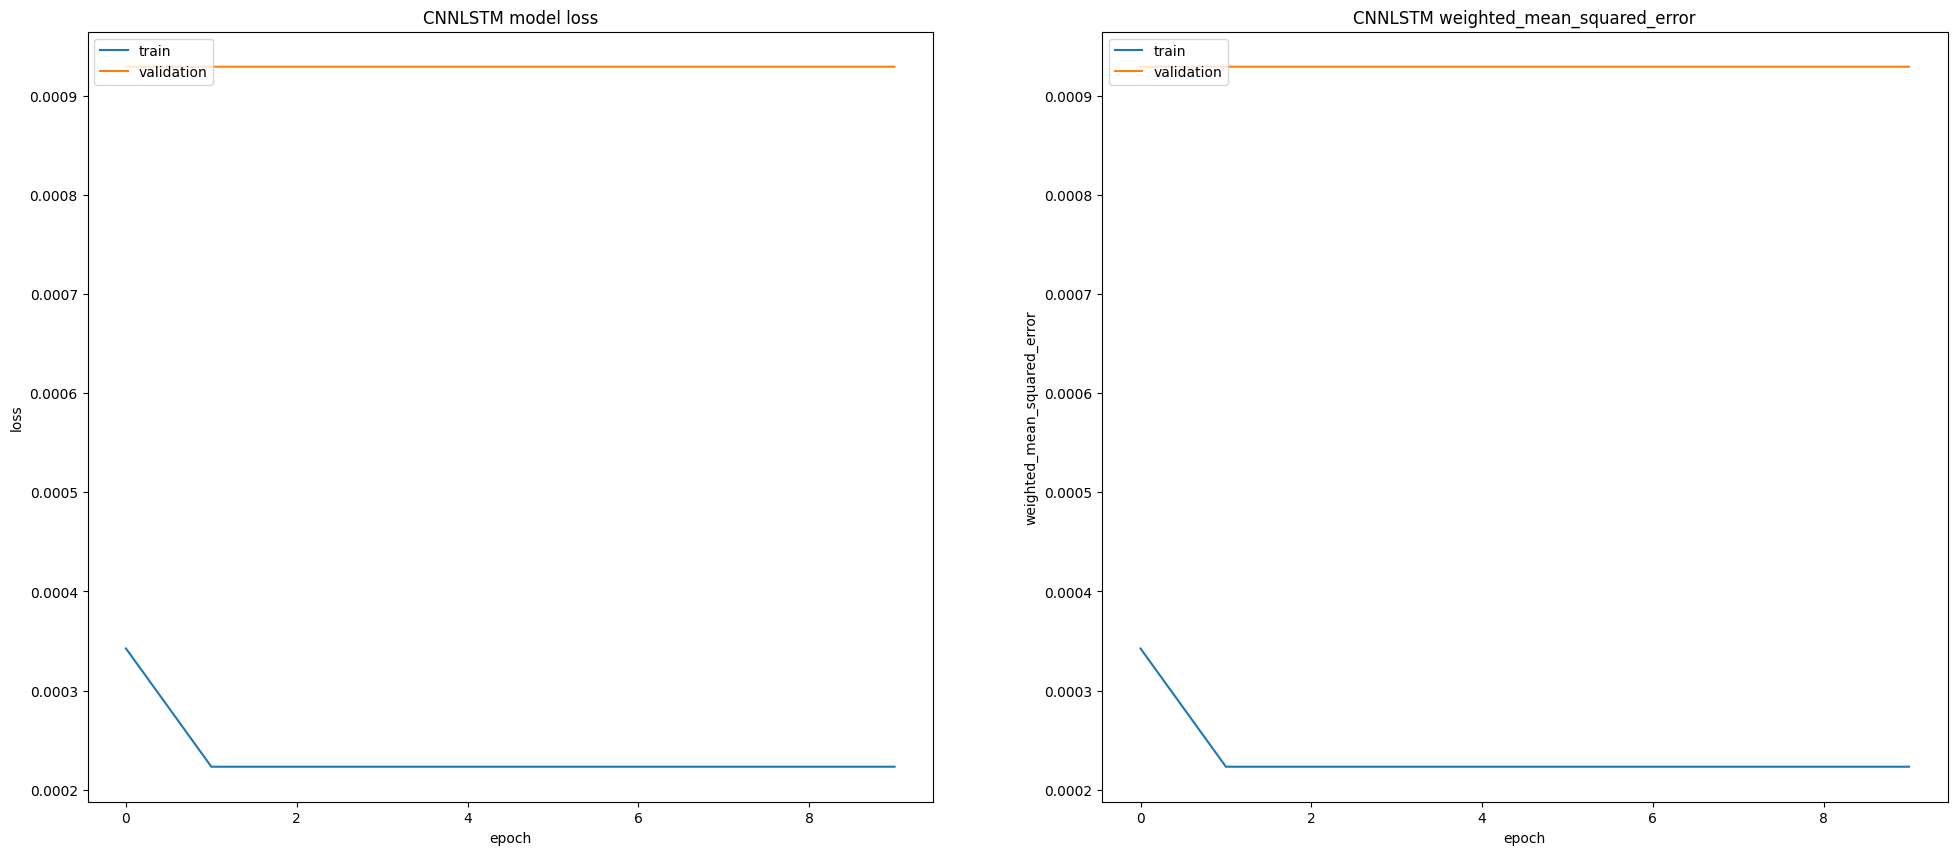

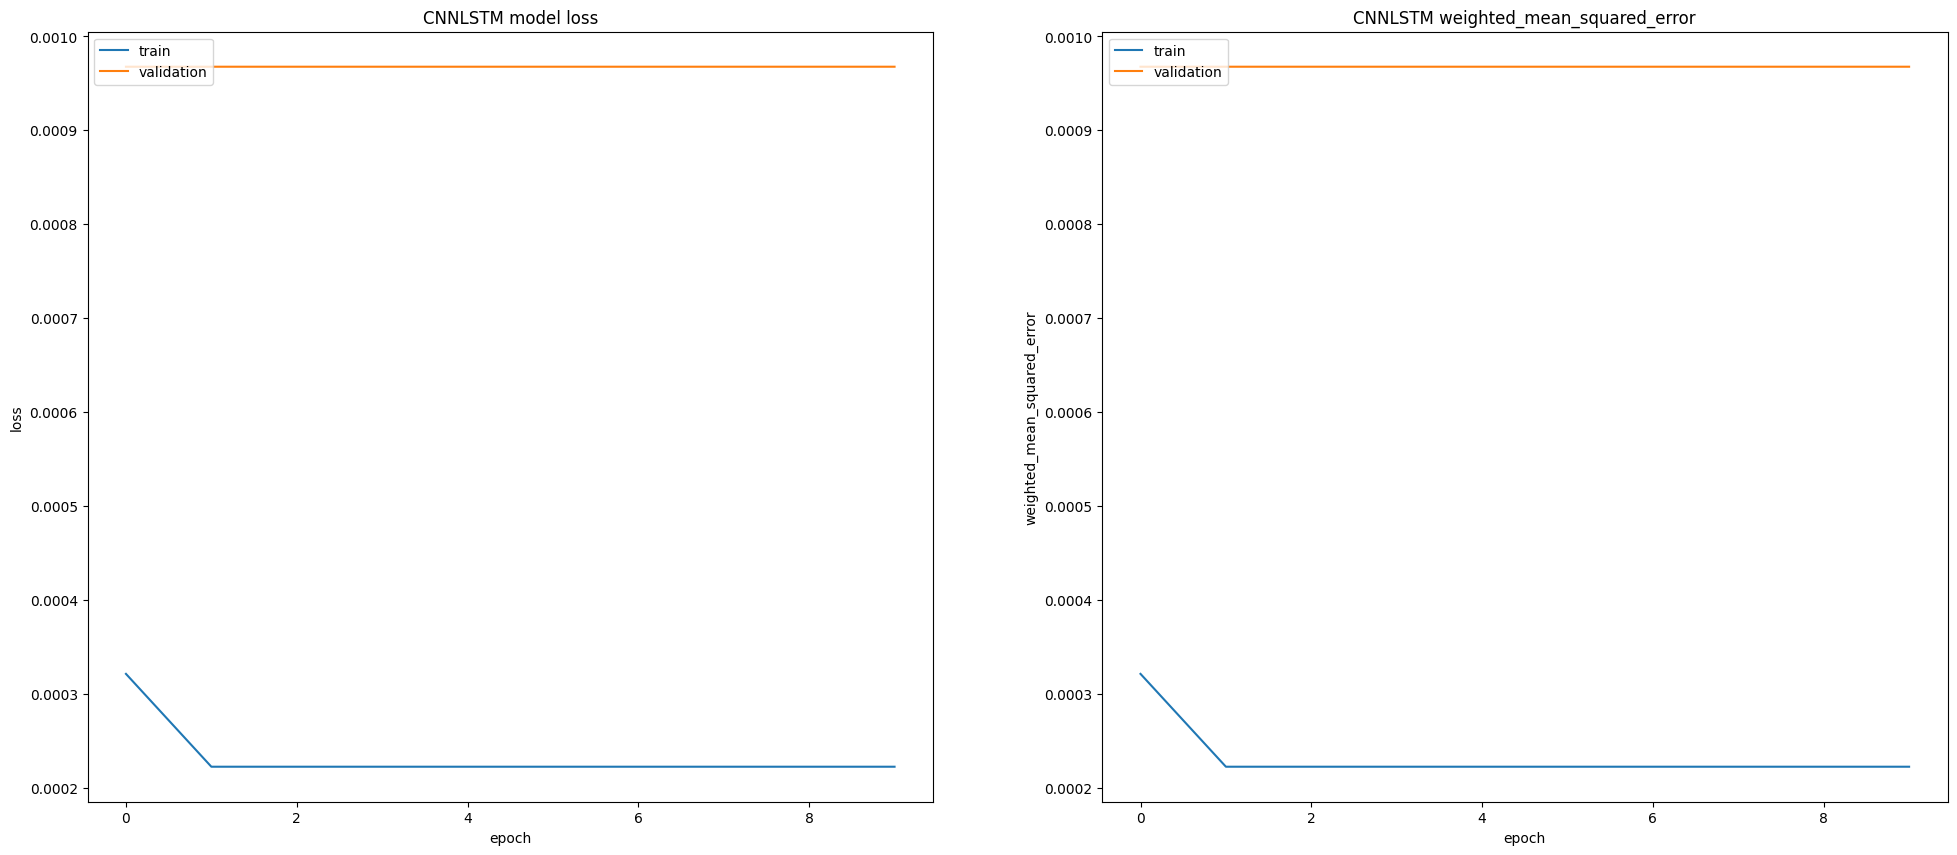

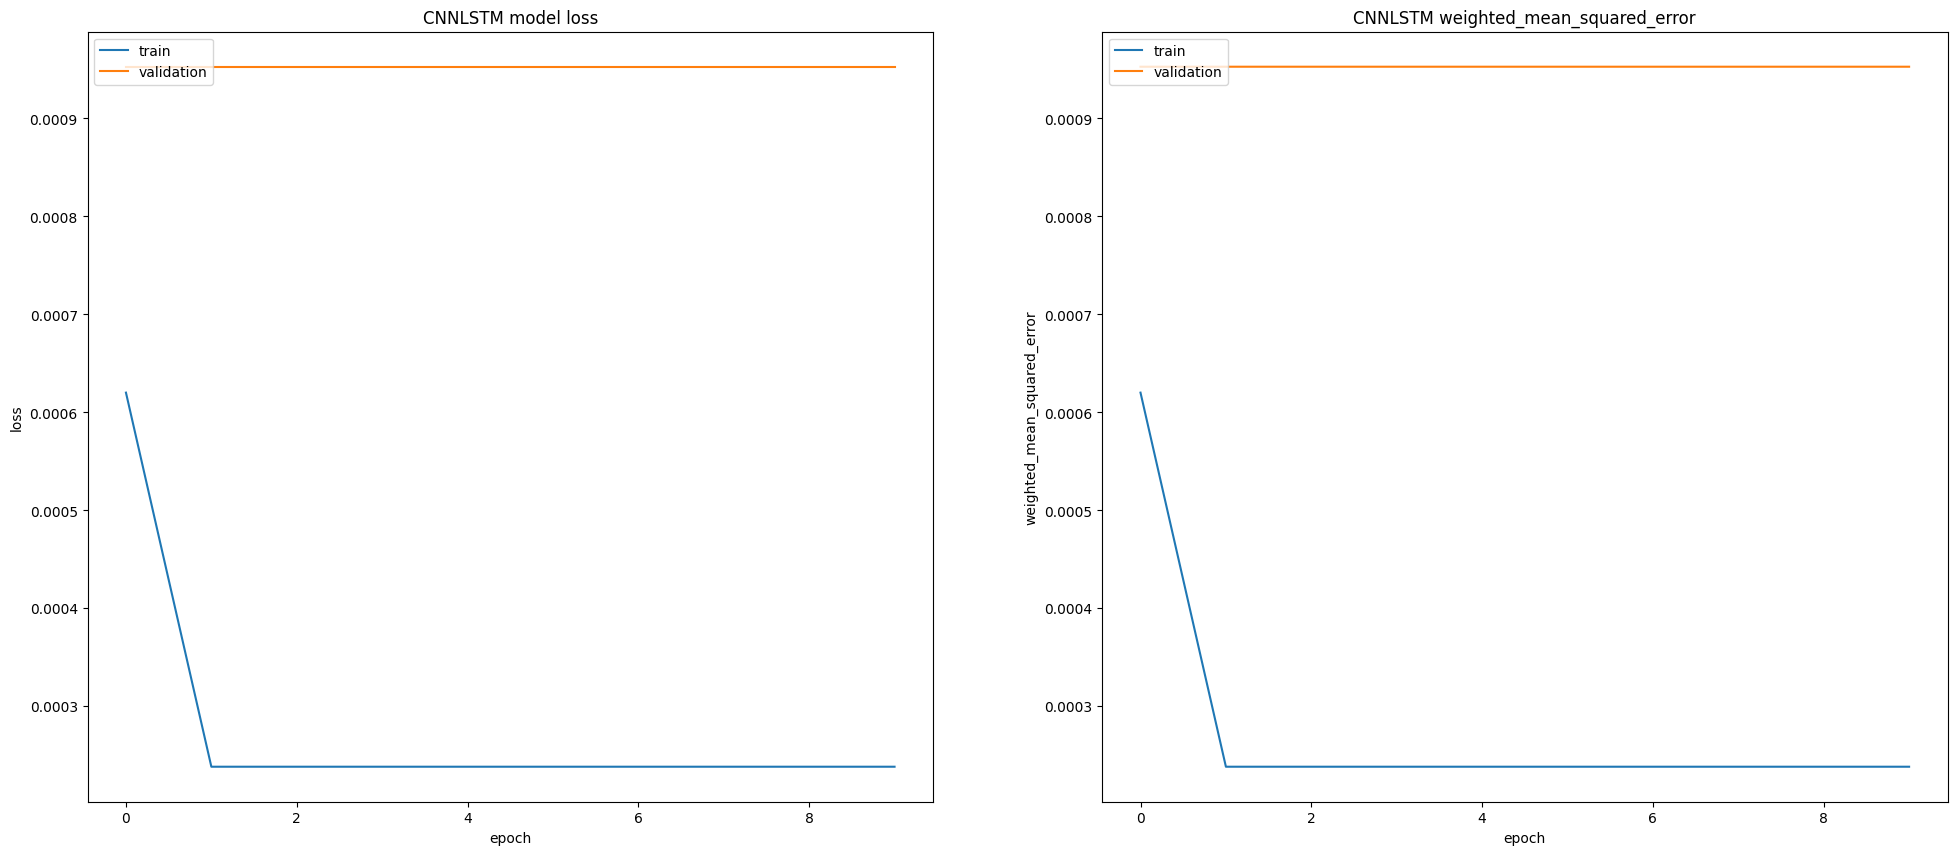

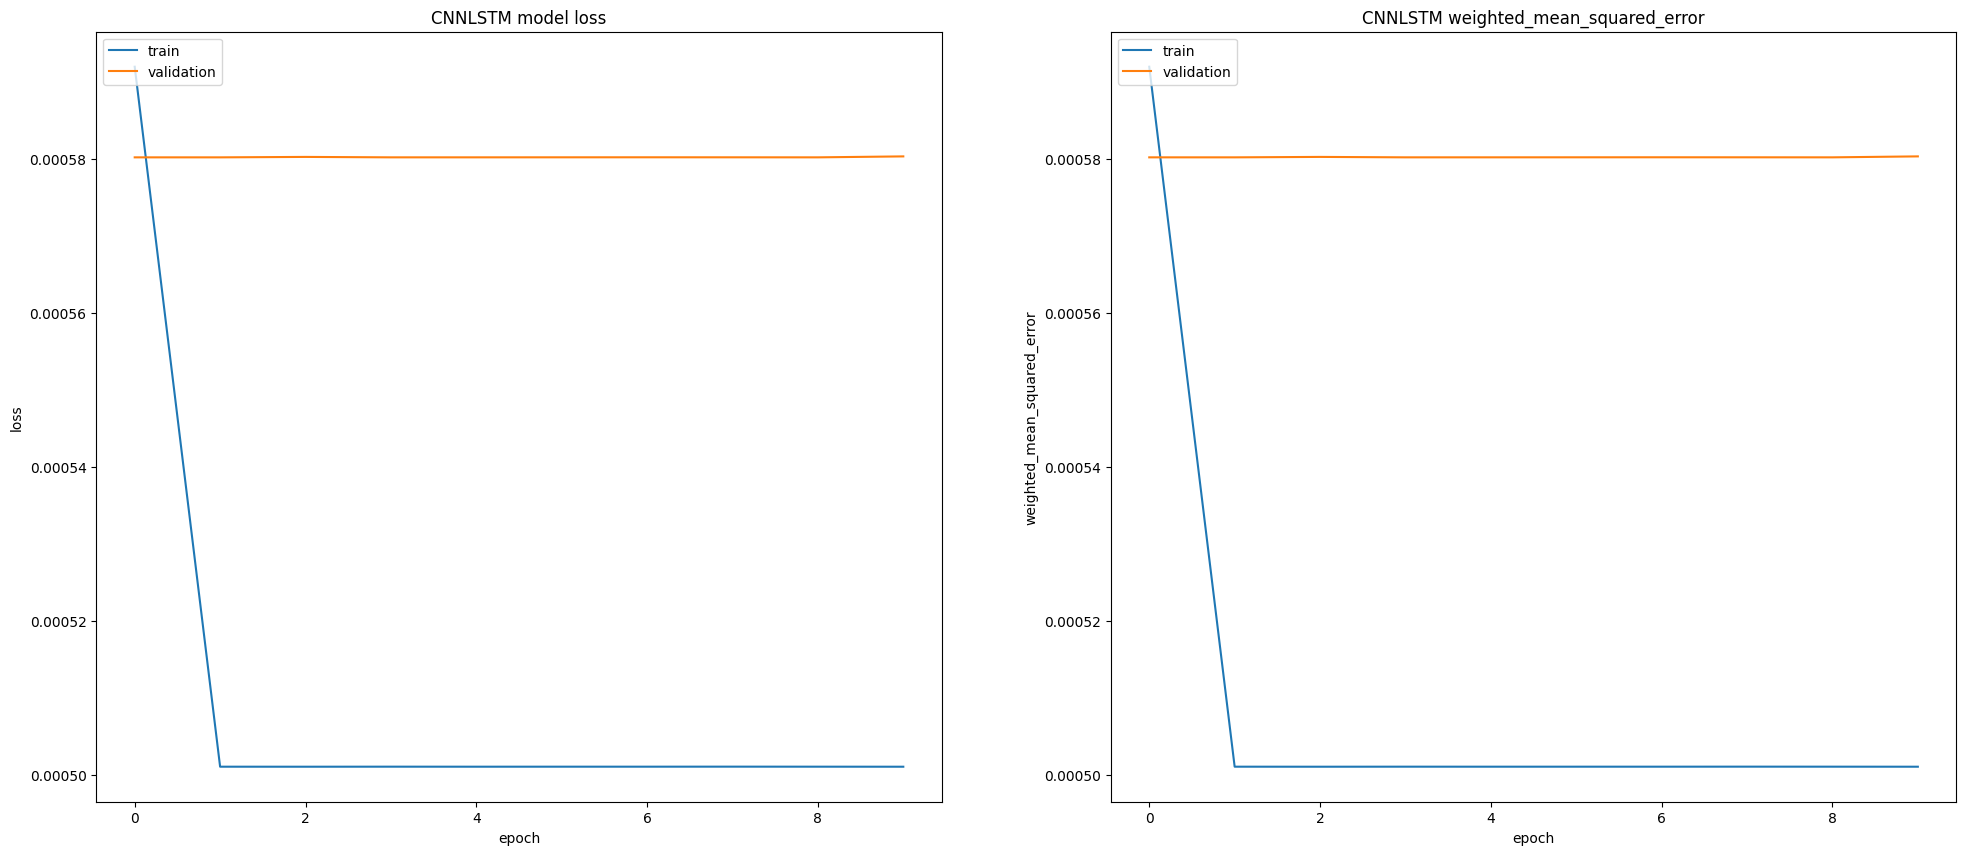

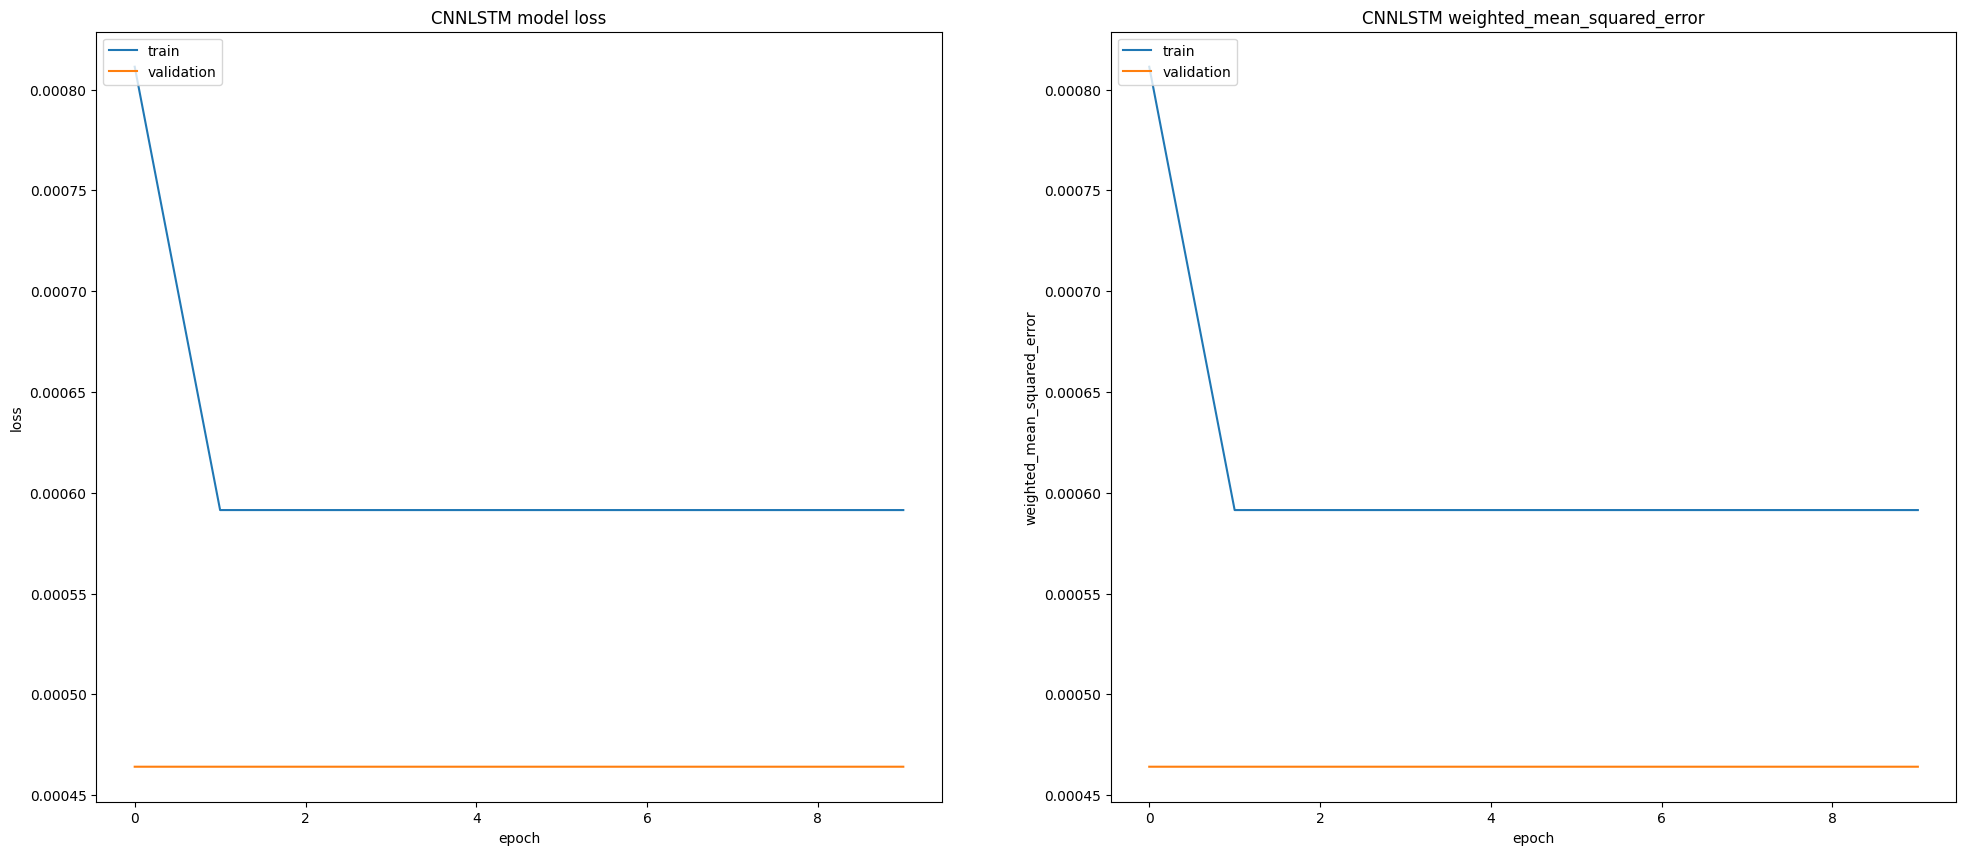

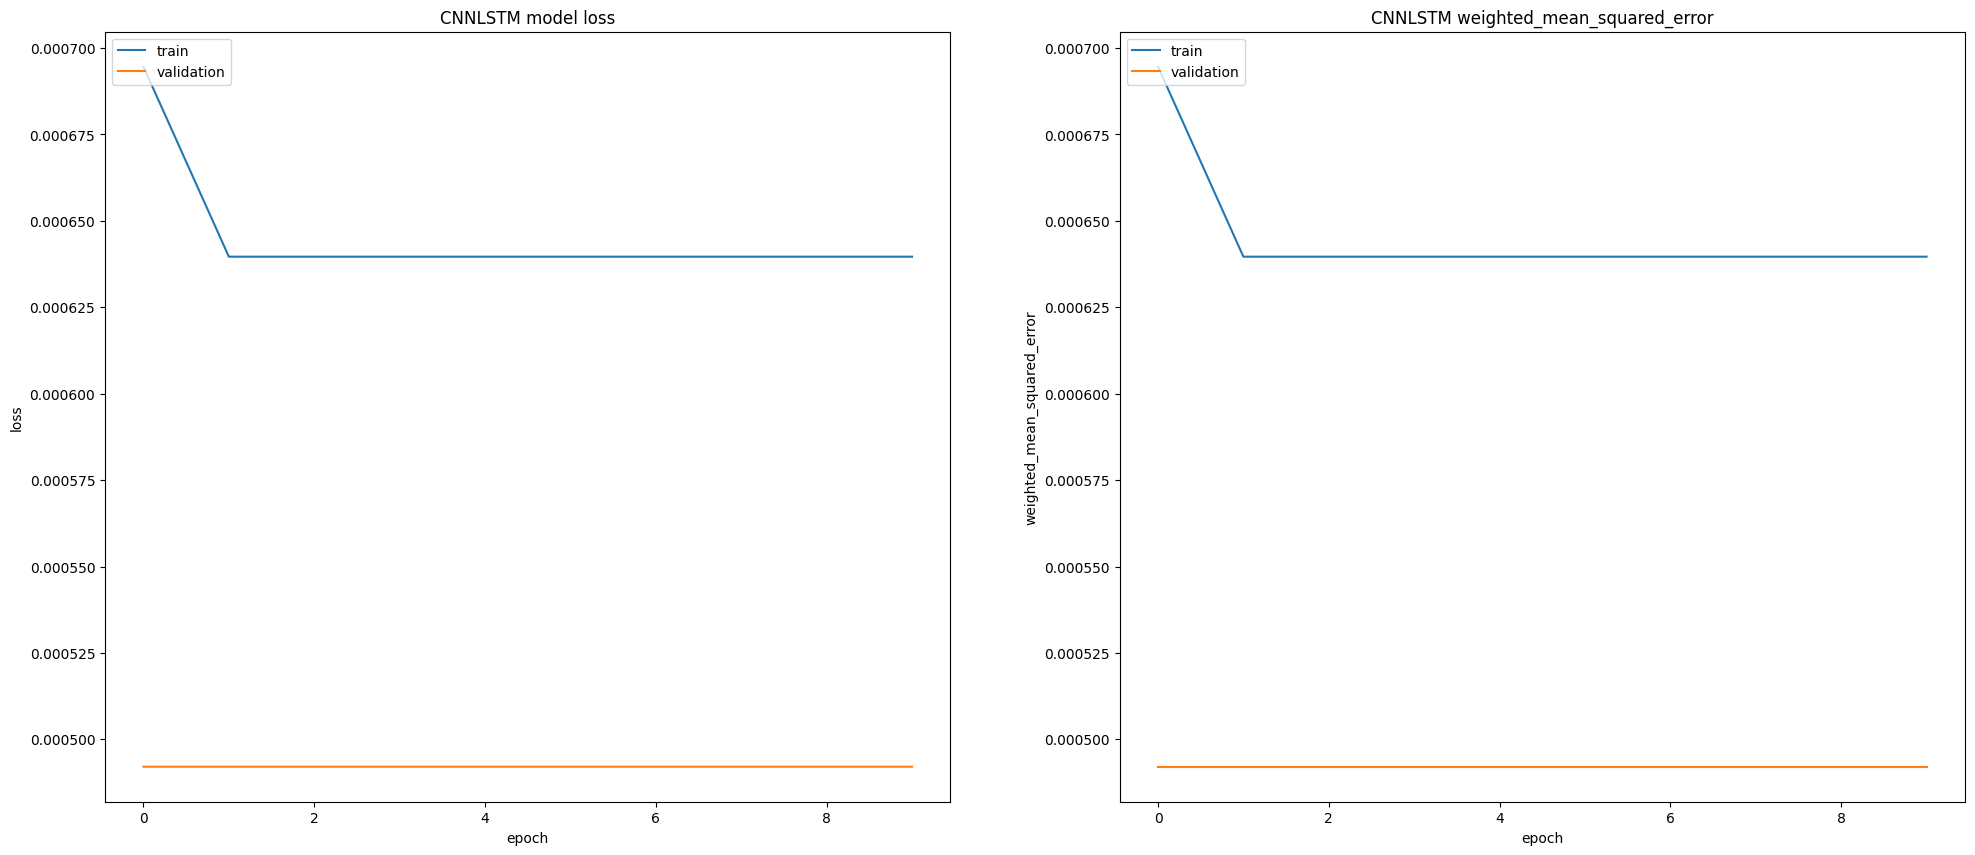

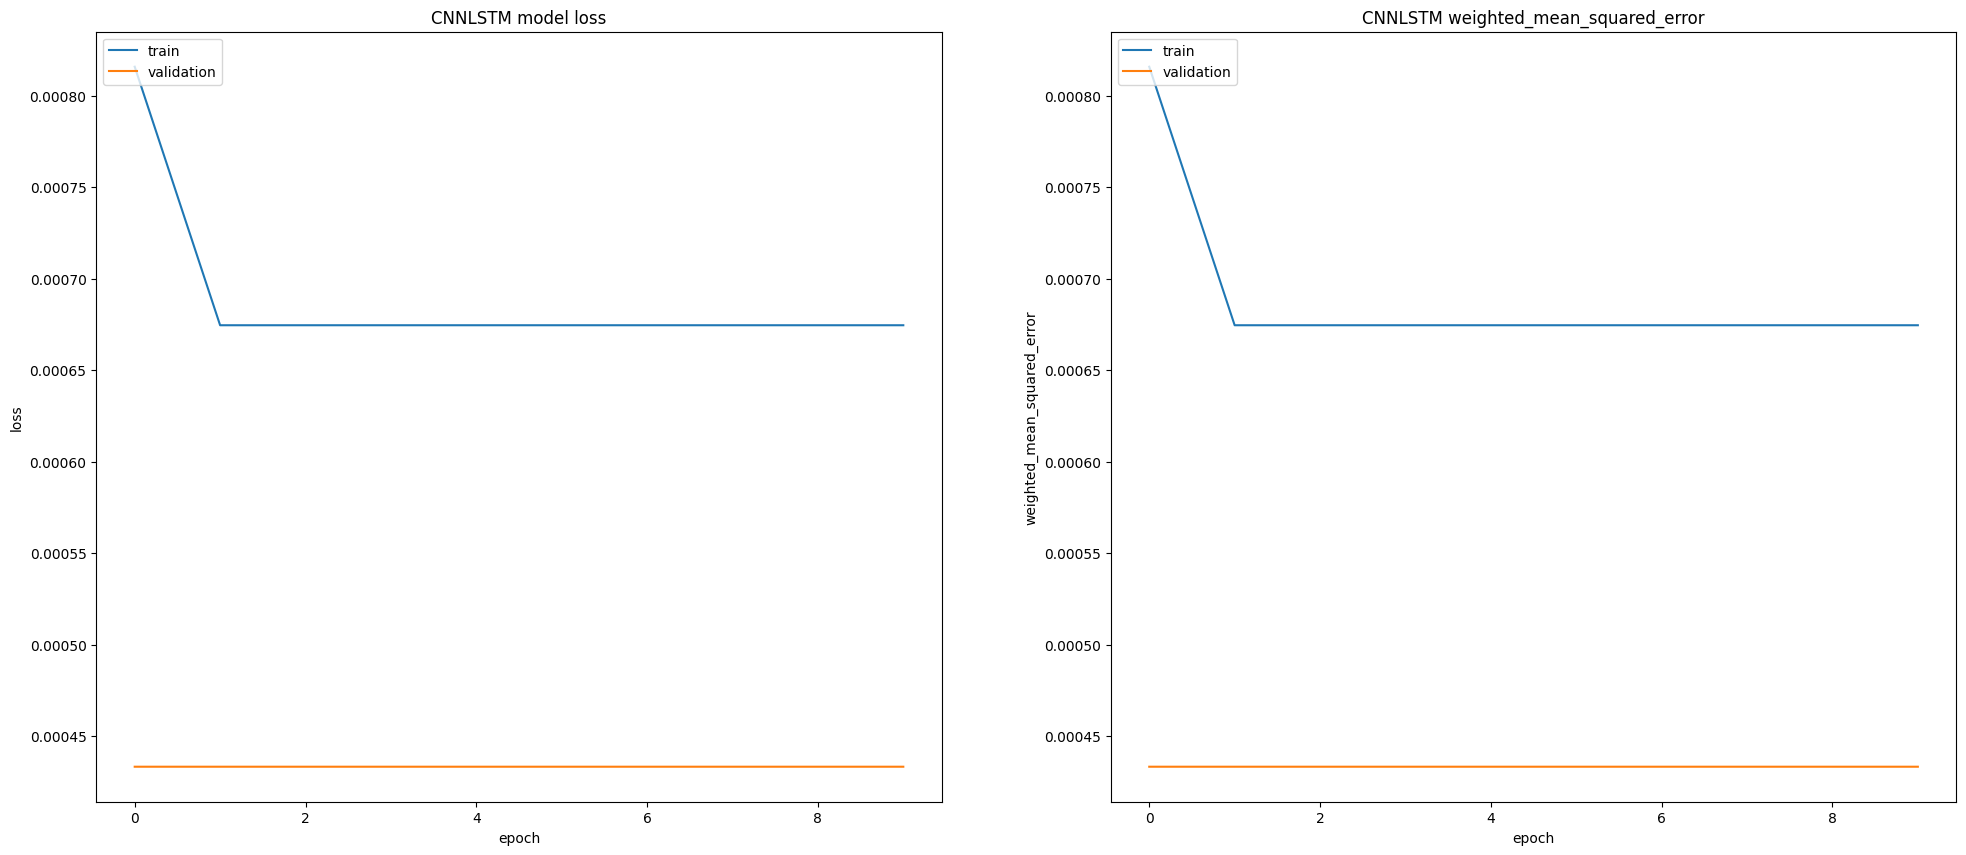

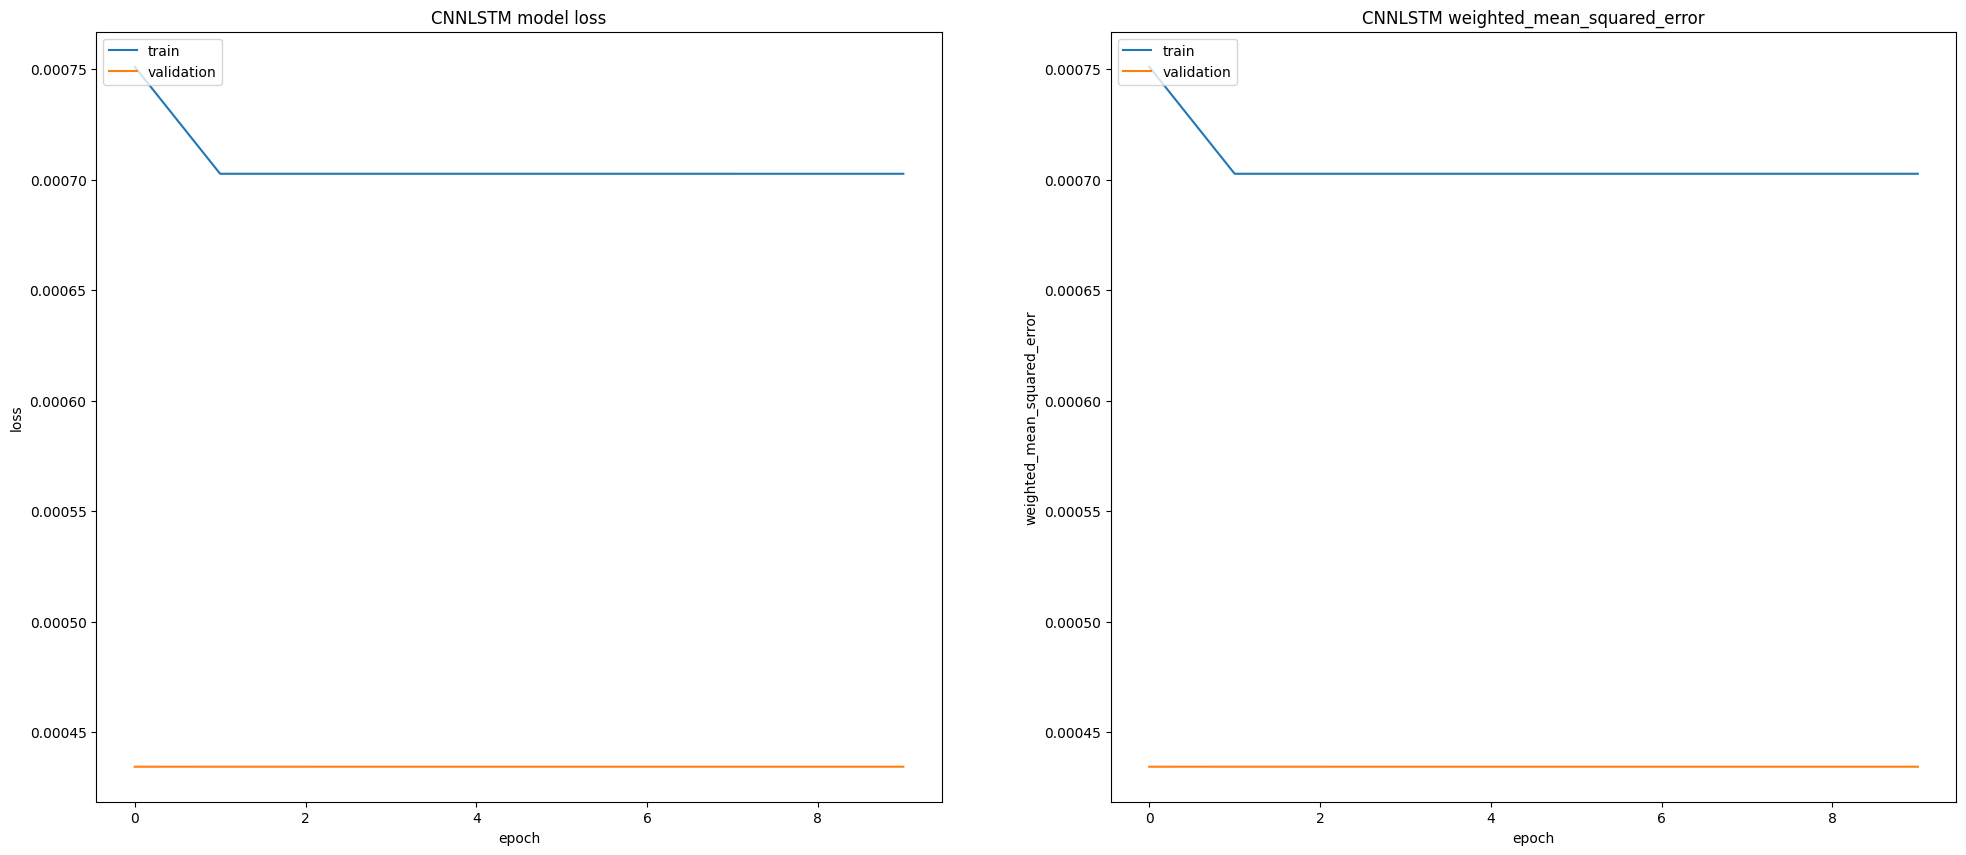

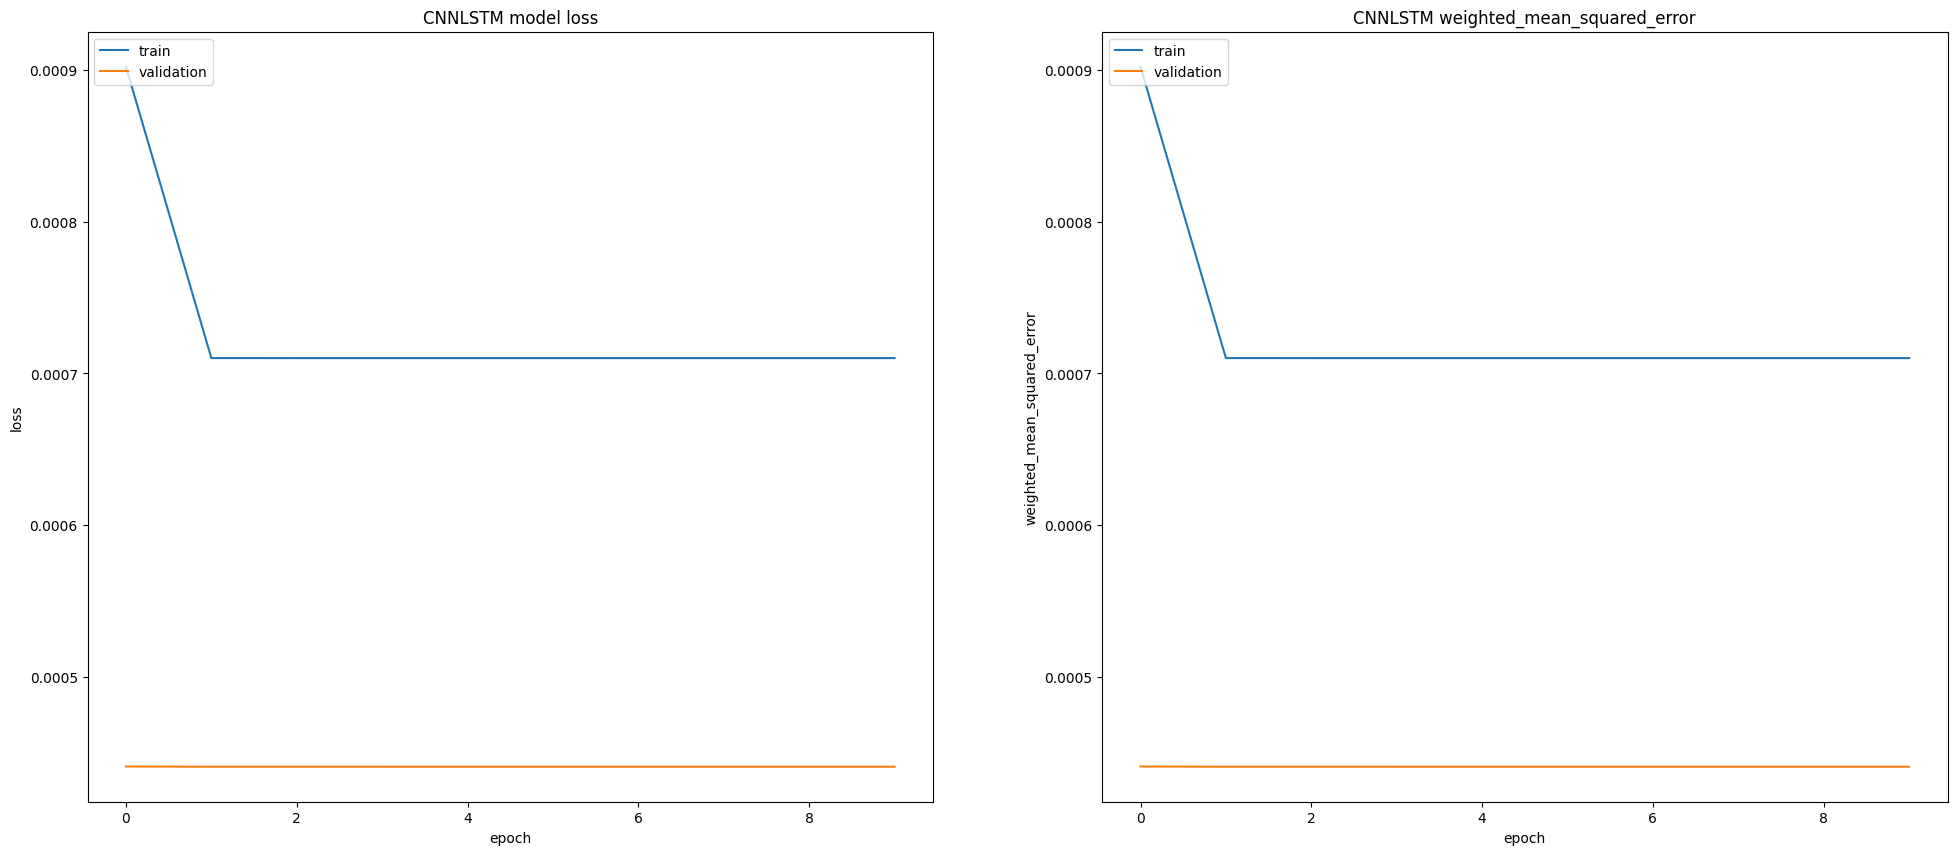

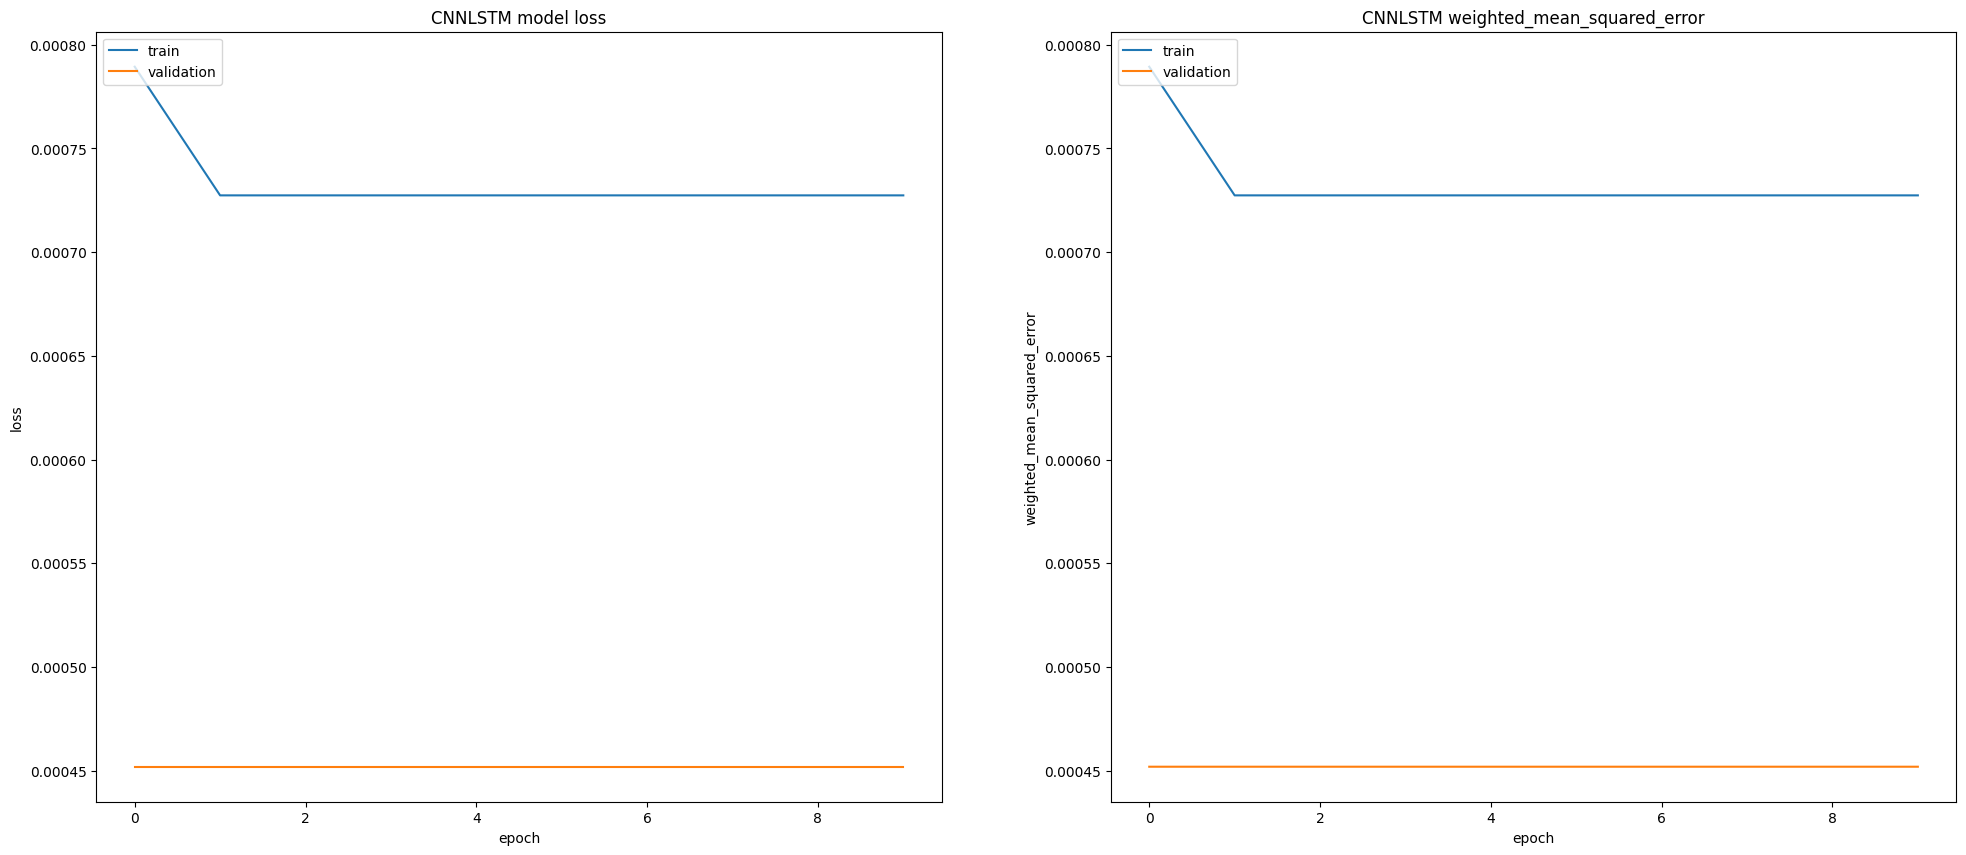

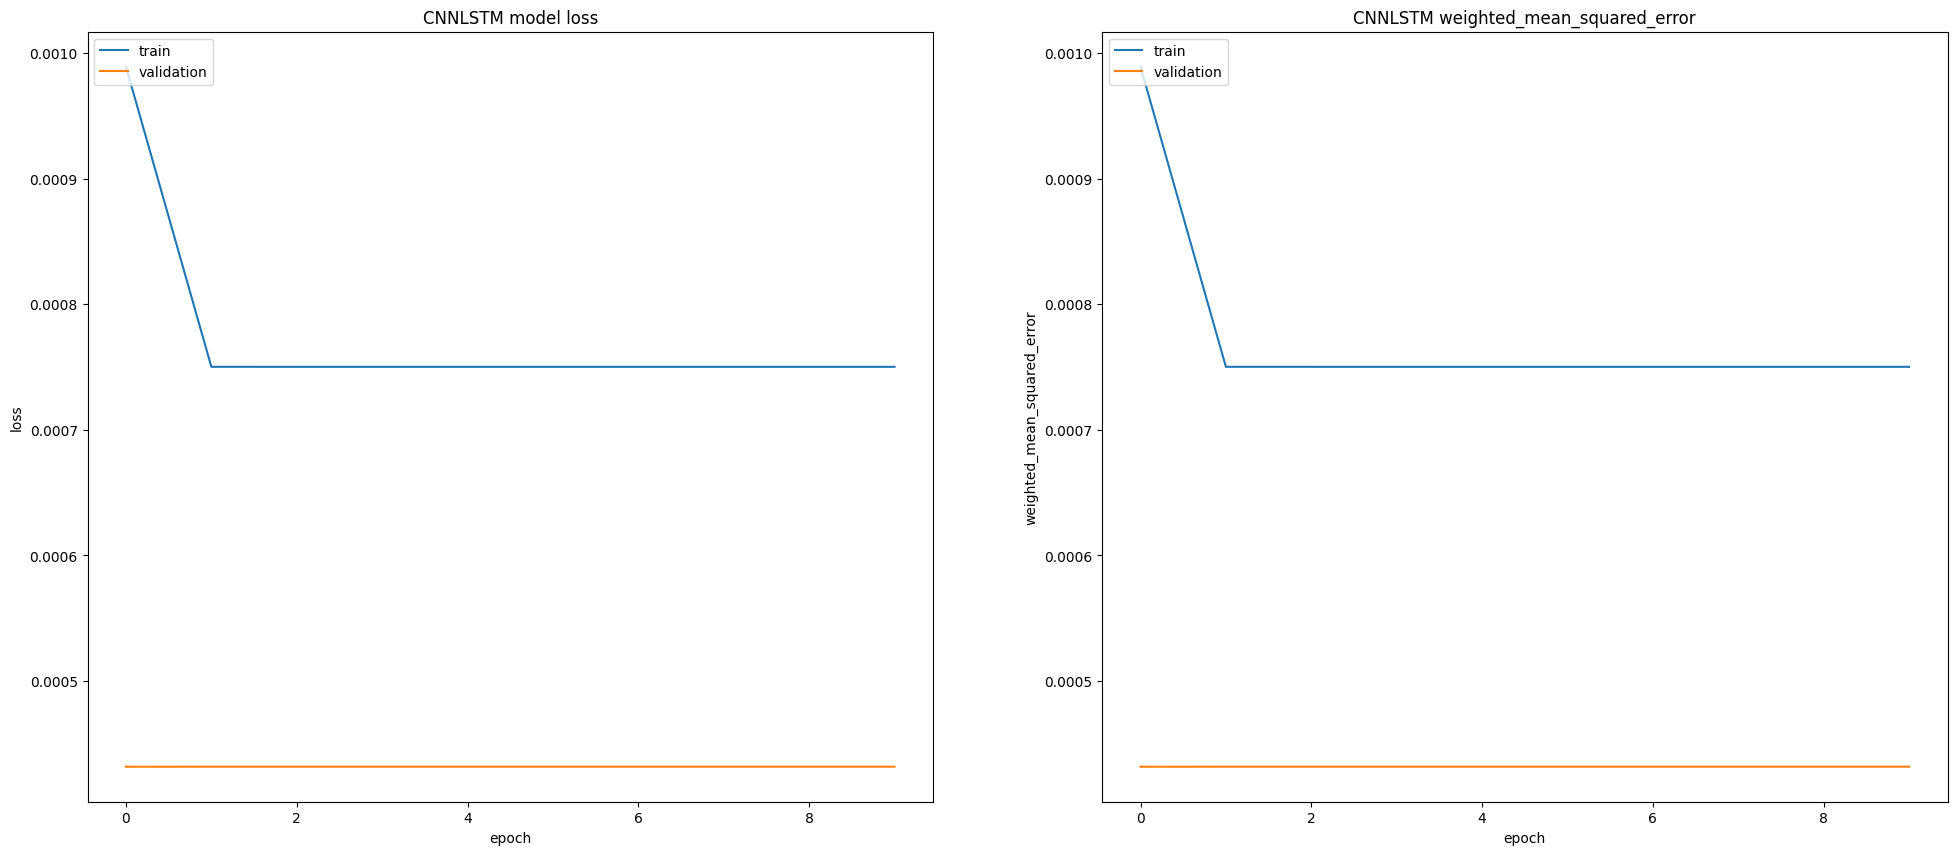

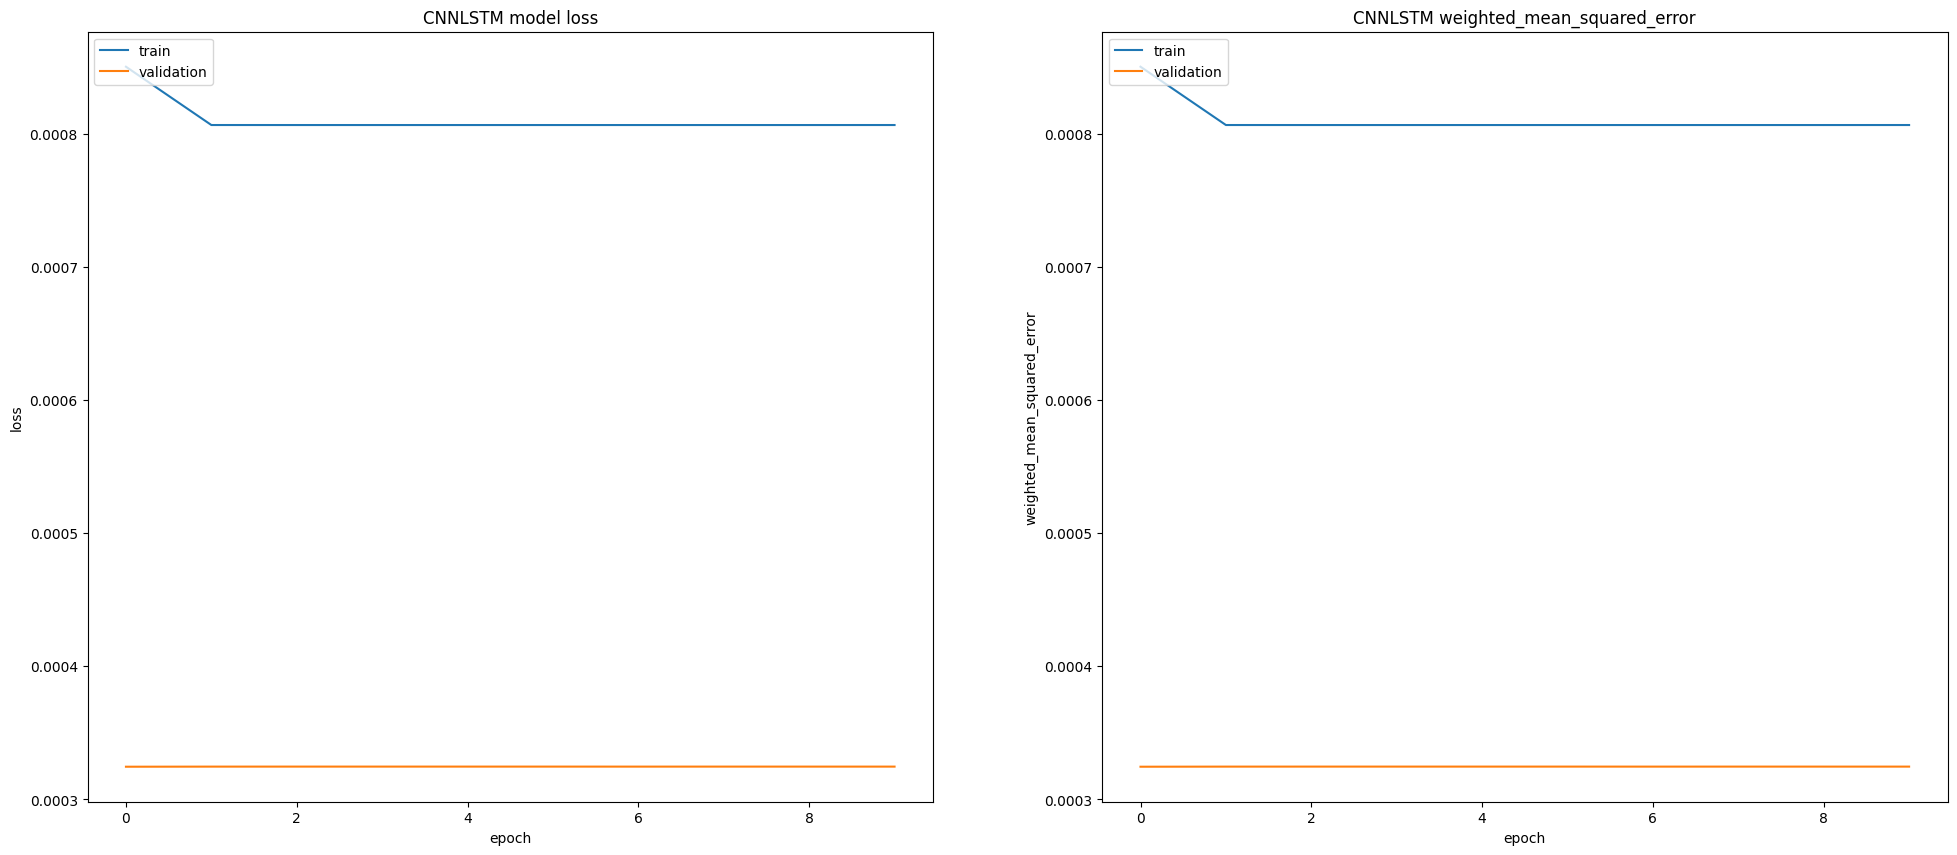

In [2]:
train_start_date_s = '2019-01-01'
val_start_date_s = '2020-01-01'
test_start_date_s = '2020-07-01'
test_end_date_s = '2020-08-01'

freq = 'month'
offset = 1
limit = 12

train_start_date_generator = DateGenerator(Date.create_from_str(train_start_date_s), freq, offset, limit)
val_start_date_generator = DateGenerator(Date.create_from_str(val_start_date_s), freq, offset, limit)
test_start_date_generator = DateGenerator(Date.create_from_str(test_start_date_s), freq, offset, limit)
test_end_date_generator = DateGenerator(Date.create_from_str(test_end_date_s), freq, offset, limit)

while (train_start_date_generator.has_next()):
    
    train_start_date = train_start_date_generator.next()
    val_start_date = val_start_date_generator.next()
    test_start_date = test_start_date_generator.next()
    test_end_date = test_end_date_generator.next()
    
    lg = 'Train[{} To {}), Validation[{} To {}), Test[{} To {})'.format(
        str(train_start_date), str(val_start_date), 
        str(val_start_date), str(test_start_date),
        str(test_start_date), str(test_end_date))
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    print(lg)
    
    lstmf = CNNLSTMFactory(str(train_start_date), str(val_start_date), 
                           str(test_start_date), str(test_end_date), 60)
    data = lstmf.create_data()
    model = lstmf.create_model()
    model.info()
    model.fit(data)
    model.evaluate(data, 'val')

    portfolio = LongRandomPortfolio(data, model)
    print("Long Randomly Picked Stock Portfolio Performance: " + str(portfolio.performance))
    portfolio = LongBestPortfolio(data, model)
    print("Long Best Predicted Stock Portfolio Performance: " + str(portfolio.performance))
    portfolio = LongBestThreePortfolio(data, model)
    print("Long Three Highest Predicted Stock Portfolio Performance: " + str(portfolio.performance))
    portfolio = LongMarketPortfolio(data, model)
    print("Long Market Portfolio Performance: " + str(portfolio.performance))
    
    del lstmf, model, data

Now let us use class variable of each class to have a look at the cum portfolio performance during the whole test period for each trading portfolio. We can easily conclude that out traing portfolio to long the three highest predicted stocks performs the best and have beaten the market portfolio.

In [4]:
print("Long Randomly Picked Stock Portfolio Performance: " + str(LongRandomPortfolio.global_portfolio.performance))
print("Long Best Predicted Stock Portfolio Performance: " + str(LongBestPortfolio.global_portfolio.performance))
print("Long Three Highest Predicted Stock Portfolio Performance: " + str(LongBestThreePortfolio.global_portfolio.performance))
print("Long Market Portfolio Performance: " + str(LongMarketPortfolio.global_portfolio.performance))

Long Randomly Picked Stock Portfolio Performance: [2020-07-01 00:00:00 - 2021-06-30 00:00:00] mean return: 0.37, volatility: 0.30, sharpe ratio: 1.12
Long Best Predicted Stock Portfolio Performance: [2020-07-01 00:00:00 - 2021-06-30 00:00:00] mean return: 0.33, volatility: 0.33, sharpe ratio: 0.90
Long Three Highest Predicted Stock Portfolio Performance: [2020-07-01 00:00:00 - 2021-06-30 00:00:00] mean return: 0.86, volatility: 0.23, sharpe ratio: 3.61
Long Market Portfolio Performance: [2020-07-01 00:00:00 - 2021-06-30 00:00:00] mean return: 0.40, volatility: 0.15, sharpe ratio: 2.46


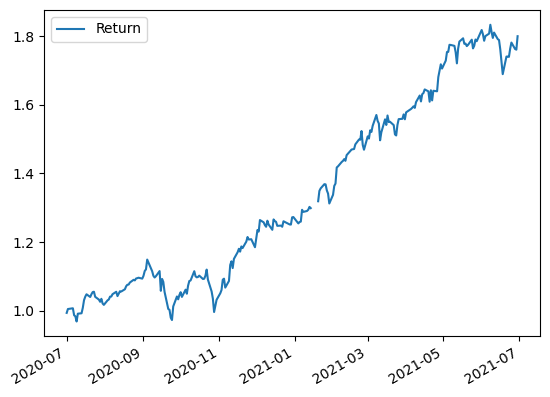

In [6]:
LongBestThreePortfolio.global_portfolio.performance.plot_portfolio_value()

# E. Conclusion

**So far, we have done the following work on dataset, which is a dataset for all S&P500 stocks during their whole life cycle:**
* We collect price and volume data from Yahoo Finance
* We collect fundamental data from EOD database
* We merge this two dataset into one on a daily base
* We clean the dataset, do feature engineering based on literature review
* We finally get a huge dataset with 153 features, and with excessive returns as label

**So far, we have done the following work for Stlearn framework, which is currently composed of over 800 lines of codes and 5 modules:**
* On the side of model developement, we use abstract factory design pattern to avoid changes on client codes as much as possible:
    * We develop `Data` module, featuring a family of `Data` class and its subclasses to read data from disk and convert it to given shape, split it into training, validation and test datasets
    * We develop `Model` module, featuring a family of `Model` class and its subclasses to represent classical or self-defined machine learning and deep learning models, encapsulate their data and behavior
    * We develop `Factory` module, featuring a family of `StFactory` class and its subclasses to represent different factories to create data and models for correspondent machine learning or deep learning tasks on the client side
* On the client side, we try to make our codes and models realize their true value 
    * We develop `Portfolio` module, featuring a family of `Portfolio` class and its subclasses. They are used to construct algorithmic trading portfolios which are mainly based on machine learning or deep learning models' predictions
    * We develop a protocal to perform rolling test over a given test period, to reach a conclusion of the profitability of our models whose predictions can be used for constructing algorithmic trading portfolios


**We list future work to be done as follow based on priority:**
* Model issues: We need to develop more advanced sequential models based on literature review. Replicate first then try to do some innovation
* Data issues: As discussed before, the dataset is extremely huge to load in memory. We may want to develop new pipelines to reduce our tasks' impact on memory space. The current options are:
    * Explore ways to feed disk data directly into models in batches during training, without loading the whole training data into memory
* Performance issues: The current rolling test is still not enough for very limited time period samples, we consider the options to perform Monte Carlo Simulation below:
    * Generate new data samples using Mathematical theories or deep learning models, however this is risky because we have too many fundamental features to generate
    * Iterate the rolling test over a given period for a large number of times, since deep learning models have randomness, we may expect different portfolios constructed based on different deep learning model prediction for each iteration. However, given this is a too time-consuming task, we may consider GPU parrallel computation or at least python multi-processing to accelerate the rolling test process
* Build the current tasks into a real product and system that can target at a group of specified users

# F. Work done this week

# Model

We build a set of modules to support the functionality of machine learning and deep learning models. Fot the sake of convenience for extension in the future and enable the current framework to accommodate more advanced deep learning models, we apply the [Single Responsibility Principle](https://en.wikipedia.org/wiki/Single-responsibility_principle) to design the architecture.

## Design

By Single Responsibility, we argue each class should do only one job. We hereby separate the scope of machine learning/deep learning models from the academic side into the following modules:
* `Zoo`: it is only used to develop and implement machine learning and deep learning model prototypes. It means we only define what the model should look like here, as long as inner structure
* `Model`: it is only used to encapsulate data and behavior of an already-defined sophisticated model defined in `Zoo` or other libraries such as Sklearn or TensorFlow

The reason behind this design is intuitive. In the real world, we have a lot of models that have already been written by libraries or frameworks, such as Random Forest, Linear Regression, CNN. But we also have tons of models that we have to derive some classes and write their mechanisms on our own. Thus we need a separate module `Zoo` to define these prototypes. We then encapsulate these self-defined sophisticated models together with library models into `Model` module.

<img src="./Stlearn/img/Model.png" alt="framework" title="framework" width="4000" height="500"/>

We derive two subclasses from `Model`, which are `MlModel` and `DlModel`, representing abstract classes for machine learning and deep learning models. We then derive subclasses from these two classes, overriding `_create_model()` to define the `_model` variable. 

All the models' output have been transformed into multi-time-step predictions. By multi-time-step predictions, we are saying that for each sample:
* We take in all its available features,
* We predict multiple labels for multiple future time steps, rather than only predict one label

We currently have two solutions to this:
* `Single Shot Model`: We still do one prediction, but we can duplicate, or we can output a sequence then reshape it
* `Auto Regressive Model`: We do one prediction each time, we then feed this prediction as input features into the model to get the prediction for the next time step

## Library-defined Model

We currently encapsulated some well-known library-defined models:
* Machine Learning:
  * Linear Regression
  * Random Forest
  * AdaBoost
* Deep Learning:
  * Simple Neural Networks
  * Convolution Neural Networks (CNN)
  * Long Short Term Memory Neural Networks (LSTM)

All of these models except LSTM that returns sequences are attributed to `Single Shot Model` stated ahead. Please refer to the following image from TensorFlow documentation to have a illustration on its mechanism.

<img src="./Stlearn/img/multistep_conv.png" alt="framework" title="framework" width="300" height="50"/>


## Advanced Model

We also did some researches on advanced deep learning models. The first family of advanced models that we implement is auto regressive models. Please refer to the following image from TensorFlow documentation to have a illustration on its mechanism.

<img src="./Stlearn/img/multistep_autoregressive.png" alt="framework" title="framework" width="500" height="50"/>

On the high level, the model is warmed up with input features. It then starts to make predictions for multiple time steps. During each time step:
* It takes in inputs and outputs for previous time steps, and memorized states (LSTM only)
* It then make its prediction for this current time step
* It updates all the data mentioned above with the prediction of current time step to next time step

We hereby define abstract class `AutoRegressor` as follow:
```python
class AutoRegressor(tf.keras.Model, ABC):
    def __init__(self):
        super().__init__()

    @abstractmethod
    def warmup(self, inputs):
        return None

    @abstractmethod
    def call(self, inputs, training=None):
        return None
```

We define cells as the exact models doing prediction during warmup period and during each output time step.

We then implement this interface by deriving two subclasses, one is to implement the auto regressor model with LSTM as cell, another is to implement the auto regressor model with one dimensional CNN as cell.

For LSTM, during the warm up part we should return its predictions for all features plus label, as well as its memorized states. During prediction part, for each output time step:
* We use predicted features and states from last time step as input features to make the prediction of features and label for the current time step
* We then forward such predictions and states of the current time step to next time step

```python
class LSTMAutoRegressor(AutoRegressor):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(Constant.NUM_FEATURES + 1)

    def warmup(self, inputs):
        x, *state = self.lstm_rnn(inputs)
        prediction = self.dense(x)
        return prediction, state

    def call(self, inputs, training=None):
        predictions = []
        prediction, state = self.warmup(inputs)

        predictions.append(prediction)

        for n in range(1, self.out_steps):
            x = prediction[:, :-1]
            x, state = self.lstm_cell(x, states=state, training=training)
            prediction = self.dense(x)
            predictions.append(prediction)

        predictions = tf.stack(predictions)
        predictions = tf.transpose(predictions, [1, 0, 2])
        return predictions[:, :, -1]
```

For CNN, during the warm up part we should return its predictions for all features plus label. During prediction part, for each output time step:
* Unlike LSTM, CNN cannot memorize the previous features, so what we can do here is create a new feature set of shape (number of look back periods, number of features) for the current time step. We do this by dropping the most previous time step's features and concatenate the prediction of last time step's features into our feature set.
* We then forward such predictions of the current time step to next time step

<div class="alert alert-block alert-danger">
    <b>Warning:</b> 
    <br>
    Only use operations provided by TensorFlow framework here. Using numpy operation or convert tensors to numpy arrays cannot work here as tensors can be symbolic during computation.
    
</div>

<div class="alert alert-block alert-danger">
    <b>Warning:</b> 
    <br>
    Avoid accessing information of any tensors, because they can be symbolic during computation.
    
</div>

```python
class CNNAutoRegressor(AutoRegressor):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.cnn = Prototype.cnn()

    def warmup(self, inputs):
        prediction = self.cnn(inputs)
        return prediction

    def call(self, inputs, training=None):
        predictions = []
        prediction = self.warmup(inputs)
        predictions.append(prediction)

        for n in range(1, self.out_steps):
            new_X = prediction[:, :-1]
            new_X = tf.reshape(new_X, [-1, 1, Constant.NUM_FEATURES])

            inputs = tf.boolean_mask(inputs, np.array(
                [False] + [True] * (Constant.WIN_SIZE - 1)), axis=1
            )
            inputs = tf.concat([inputs, new_X], 1)
            prediction = self.cnn(inputs)
            predictions.append(prediction)

        predictions = tf.stack(predictions)
        predictions = tf.transpose(predictions, [1, 0, 2])
        return predictions[:, :, -1]
```

# Portfolios for back testing

We define a portfolio as an combination of investment that:
* longs or shorts or longs shorts at the same time
* applied on a set of stocks, which are chosen based on certain model and data
* held over a certain time period

By concatenating portfolios across time axis, we mean:
* two or more portfolios defined as above
* are solely applied over their designated time period
* one after one continuously over time axis

For the utility of back testing our machine learning tasks in the client side, we also develop a family of `Portfolio` classes. A `Portfolio` object encapsulate all relevant data and behavior for a portfolio. At the highest level, abstract class `Portfolio` has 2 variables:
* `_performance`: it encapsulates all data and behavior for a portfolio's performance metric, represented by self defined `Performance` class objects
* `_scheme`: it is a dictionary specifying what stocks the current portfolio longs and what stocks the current portfolio shorts

Abstract class `Portfolio` also has 3 methods:
* `construct()`: abstract method, requires the subclasses to implement how a specific portfolio is constructed and furthermore updates the `_performance` and `_scheme` accordingly
* `add_portfolio()`: implements how to add a portfolio of the **same class** to the current `Portfolio` object. For some portfolios, this is as easy as add daily returns of new portfolio to the existing one and update the portfolio value accordingly based on new daily returns
* `clone()`: return a **deep copy** of current object

We derive 2 subclasses from abstract class `Portfolio`:
* `MultiStrategyPortfolio`: which is a container to concatenate different portfolios of different strategies (i.e. different subclasses of `Portfolio`) along the time axis
* `AlgoTradePortfolio`: which represents all portfolios traded algorithmically based on certain strategy. These objects are determined by `construct()`, which is further relied on two methods:
  * `_strategy()`: abstract method, it requires subclasses to implement how we choose specific stocks to long or short
  * `_apply_strategy()`: abstract method, it requires subclasses to implement how we long or short specific stocks provided by `_strategy()`

For `AlgoTradePortfolio`, we derive subclasses:
* `LongPortfolio`: which represents all long-only portfolio objects, it overrides `_apply_strategy()` and requires subclasses to implement `_strategy()`
* `DollarNeutralLongShortPortfolio`: which represents all dollar-neutral long short portfolio objects, it overrides `_apply_strategy()` and requires subclasses to implement `_strategy()`.
  * By dollar-neutral, we always assume we do the short sale on certain units of target stocks to long exactly one unit of target stocks with short sale proceeds. We keep these positions for a given period until rebalance. For each time step the portfolio is applying on, we calculate the long position value and short position value, thus net asset value. We calculate returns by formula (current net asset value - last net asset value) / last long value
  * The `add_portfolio()` overrides the super class method and implements a different logic. When add new portfolio to the current one, we use the existing portfolio's proceeds, which is the portfolio value of the last day to update the new portfolio's value and daily returns. If the existing portfolio's proceeds is positive, we use this part all to long new portfolio's choices of long stocks, thus we add the long value of this part to the original new portfolio's value and update daily returns accordingly. If the existing portfolio's proceeds is negative, we add this number to all portfolio values of the new portfolio.

Within `AlgoTradePortfolio` class and its subclasses, we also provide a static class variable `global_portfolio` to record all this kind of portfolios constructed across different time periods. We assume that portfolios are constructed based on consistent strategies (i.e. using the same `Portfolio` subclass) during a given back test period. However, under the circumstance when one insists on applying multiple strategies to different time periods within the back test period, we provide `MultiStrategyPortfolio` to manually combine portfolios of different strategies across time axis within the back test period.

We derive real concrete subclasses from `LongPortfolio` and `DollarNeutralPortfolio` and override `_strategy()` method:
* `LongBestPortfolio`: long the stock with the best performance predicted by the model
* `LongBestThreePortfolio`: long the three stock with best performance predicted by the model
* `LongRandomPortfolio`: long the stock randomly picked
* `LongMarketPortfolio`: long the market portfolio
* `LongShortBestShotPortfolio`: long the stock with the best performance predicted by the model and short the stock with the worst performance predicted by the model

<img src="./Stlearn/img/portfolio.png" alt="framework" title="framework" width="4000" height="500"/>

# Empirical Study

Below we do experiments on newly implemented `LSTMAutoRegressorModel` and `LongShortBestShotPortfolio`. We have the following observations:
* The new model has a better performance than previous models. It's training loss is reducing each epoch, meaning it is not suffering from underfitting severely like previous models any more. However, we can still witness its underfitting, meaning we still need to develop more complicated models in the future
* In general, portfolios based on the model's prediction can still beat the market. However, long short portfolio is not among them and it has much higher volatility than others

In [1]:
import sys
sys.path.append('./Stlearn')
import Constant
# Do any configuration here

  0%|                                                    | 0/12 [00:00<?, ?it/s]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-01-01 To 2020-01-01), Validation[2020-01-01 To 2020-02-01), Test[2020-02-01 To 2020-03-01)
X_train shape: (95638, 60, 152)
y_train shape: (95638,)
X_valid shape: (10437, 60, 152)
y_valid shape: (10437,)
X_test shape: (9437, 60, 152)
y_test shape: (9437,)
Epoch 1/10


2022-11-20 11:36:45.205410: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2989/2989 [==============================] - 80s 25ms/step - loss: 2.5068e-04 - mean_squared_error: 2.5068e-04 - weighted_mean_squared_error: 2.5068e-04 - val_loss: 2.0022e-04 - val_mean_squared_error: 2.0022e-04 - val_weighted_mean_squared_error: 2.0022e-04
Epoch 2/10
2989/2989 [==============================] - 75s 25ms/step - loss: 2.2511e-04 - mean_squared_error: 2.2511e-04 - weighted_mean_squared_error: 2.2511e-04 - val_loss: 2.0156e-04 - val_mean_squared_error: 2.0156e-04 - val_weighted_mean_squared_error: 2.0156e-04
Epoch 3/10
2989/2989 [==============================] - 75s 25ms/step - loss: 2.2504e-04 - mean_squared_error: 2.2504e-04 - weighted_mean_squared_error: 2.2504e-04 - val_loss: 2.0047e-04 - val_mean_squared_error: 2.0047e-04 - val_weighted_mean_squared_error: 2.0047e-04
Epoch 4/10
2989/2989 [==============================] - 76s 25ms/step - loss: 2.2489e-04 - mean_squared_error: 2.2489e-04 - weighted_mean_squared_error: 2.2489e-04 - val_loss: 2.0192e-04 - val_mean_squ

  8%|███▍                                     | 1/12 [14:14<2:36:43, 854.83s/it]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-02-01 To 2020-02-01), Validation[2020-02-01 To 2020-03-01), Test[2020-03-01 To 2020-04-01)
X_train shape: (95723, 60, 152)
y_train shape: (95723,)
X_valid shape: (9437, 60, 152)
y_valid shape: (9437,)
X_test shape: (10928, 60, 152)
y_test shape: (10928,)
Epoch 1/10
2992/2992 [==============================] - 78s 25ms/step - loss: 2.5239e-04 - mean_squared_error: 2.5239e-04 - weighted_mean_squared_error: 2.5239e-04 - val_loss: 3.9172e-04 - val_mean_squared_error: 3.9172e-04 - val_weighted_mean_squared_error: 3.9172e-04
Epoch 2/10
2992/2992 [==============================] - 74s 25ms/step - loss: 2.2447e-04 - mean_squared_error: 2.2447e-04 - weighted_mean_squared_error: 2.2447e-04 - val_loss: 3.9766e-04 - val_mean_squared_error: 3.9766e-04 - val_weighted_mean_squared_error: 3.9766e-04
Epoch 3/10
2992/2992 [==============================] - 76s 25ms/step - loss: 2.2415e-04 - mean_squared_erro

 17%|██████▊                                  | 2/12 [28:15<2:21:07, 846.72s/it]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-03-01 To 2020-03-01), Validation[2020-03-01 To 2020-04-01), Test[2020-04-01 To 2020-05-01)
X_train shape: (95798, 60, 152)
y_train shape: (95798,)
X_valid shape: (10928, 60, 152)
y_valid shape: (10928,)
X_test shape: (10437, 60, 152)
y_test shape: (10437,)
Epoch 1/10
2994/2994 [==============================] - 83s 26ms/step - loss: 2.6632e-04 - mean_squared_error: 2.6632e-04 - weighted_mean_squared_error: 2.6632e-04 - val_loss: 0.0025 - val_mean_squared_error: 0.0025 - val_weighted_mean_squared_error: 0.0025
Epoch 2/10
2994/2994 [==============================] - 75s 25ms/step - loss: 2.4044e-04 - mean_squared_error: 2.4044e-04 - weighted_mean_squared_error: 2.4044e-04 - val_loss: 0.0025 - val_mean_squared_error: 0.0025 - val_weighted_mean_squared_error: 0.0025
Epoch 3/10
2994/2994 [==============================] - 75s 25ms/step - loss: 2.4023e-04 - mean_squared_error: 2.4023e-04 - weight

 25%|██████████▎                              | 3/12 [42:10<2:06:09, 841.09s/it]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-04-01 To 2020-04-01), Validation[2020-04-01 To 2020-05-01), Test[2020-05-01 To 2020-06-01)
X_train shape: (96342, 60, 152)
y_train shape: (96342,)
X_valid shape: (10437, 60, 152)
y_valid shape: (10437,)
X_test shape: (9940, 60, 152)
y_test shape: (9940,)
Epoch 1/10
3011/3011 [==============================] - 83s 26ms/step - loss: 5.3546e-04 - mean_squared_error: 5.3546e-04 - weighted_mean_squared_error: 5.3546e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_weighted_mean_squared_error: 0.0011
Epoch 2/10
3011/3011 [==============================] - 76s 25ms/step - loss: 5.0386e-04 - mean_squared_error: 5.0386e-04 - weighted_mean_squared_error: 5.0386e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_weighted_mean_squared_error: 0.0011
Epoch 3/10
3011/3011 [==============================] - 76s 25ms/step - loss: 5.0279e-04 - mean_squared_error: 5.0279e-04 - weighted

 33%|█████████████▋                           | 4/12 [56:17<1:52:26, 843.33s/it]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-05-01 To 2020-05-01), Validation[2020-05-01 To 2020-06-01), Test[2020-06-01 To 2020-07-01)
X_train shape: (96363, 60, 152)
y_train shape: (96363,)
X_valid shape: (9940, 60, 152)
y_valid shape: (9940,)
X_test shape: (10958, 60, 152)
y_test shape: (10958,)
Epoch 1/10
3012/3012 [==============================] - 83s 26ms/step - loss: 6.2790e-04 - mean_squared_error: 6.2790e-04 - weighted_mean_squared_error: 6.2790e-04 - val_loss: 7.2970e-04 - val_mean_squared_error: 7.2970e-04 - val_weighted_mean_squared_error: 7.2970e-04
Epoch 2/10
3012/3012 [==============================] - 76s 25ms/step - loss: 5.9424e-04 - mean_squared_error: 5.9424e-04 - weighted_mean_squared_error: 5.9424e-04 - val_loss: 7.2462e-04 - val_mean_squared_error: 7.2462e-04 - val_weighted_mean_squared_error: 7.2462e-04
Epoch 3/10
3012/3012 [==============================] - 75s 25ms/step - loss: 5.8887e-04 - mean_squared_erro

 42%|████████████████▎                      | 5/12 [1:10:30<1:38:50, 847.14s/it]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-06-01 To 2020-06-01), Validation[2020-06-01 To 2020-07-01), Test[2020-07-01 To 2020-08-01)
X_train shape: (95390, 60, 152)
y_train shape: (95390,)
X_valid shape: (10958, 60, 152)
y_valid shape: (10958,)
X_test shape: (10975, 60, 152)
y_test shape: (10975,)
Epoch 1/10
2981/2981 [==============================] - 82s 26ms/step - loss: 6.7772e-04 - mean_squared_error: 6.7772e-04 - weighted_mean_squared_error: 6.7772e-04 - val_loss: 5.8783e-04 - val_mean_squared_error: 5.8783e-04 - val_weighted_mean_squared_error: 5.8783e-04
Epoch 2/10
2981/2981 [==============================] - 74s 25ms/step - loss: 6.4278e-04 - mean_squared_error: 6.4278e-04 - weighted_mean_squared_error: 6.4278e-04 - val_loss: 5.8803e-04 - val_mean_squared_error: 5.8803e-04 - val_weighted_mean_squared_error: 5.8803e-04
Epoch 3/10
2981/2981 [==============================] - 76s 26ms/step - loss: 6.3740e-04 - mean_squared_er

 50%|███████████████████▌                   | 6/12 [1:24:29<1:24:24, 844.11s/it]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-07-01 To 2020-07-01), Validation[2020-07-01 To 2020-08-01), Test[2020-08-01 To 2020-09-01)
X_train shape: (96410, 60, 152)
y_train shape: (96410,)
X_valid shape: (10975, 60, 152)
y_valid shape: (10975,)
X_test shape: (10478, 60, 152)
y_test shape: (10478,)
Epoch 1/10
3013/3013 [==============================] - 83s 26ms/step - loss: 7.1222e-04 - mean_squared_error: 7.1222e-04 - weighted_mean_squared_error: 7.1222e-04 - val_loss: 4.5944e-04 - val_mean_squared_error: 4.5944e-04 - val_weighted_mean_squared_error: 4.5944e-04
Epoch 2/10
3013/3013 [==============================] - 76s 25ms/step - loss: 6.7776e-04 - mean_squared_error: 6.7776e-04 - weighted_mean_squared_error: 6.7776e-04 - val_loss: 4.7107e-04 - val_mean_squared_error: 4.7107e-04 - val_weighted_mean_squared_error: 4.7107e-04
Epoch 3/10
3013/3013 [==============================] - 76s 25ms/step - loss: 6.7104e-04 - mean_squared_er

 58%|██████████████████████▊                | 7/12 [1:38:51<1:10:51, 850.23s/it]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-08-01 To 2020-08-01), Validation[2020-08-01 To 2020-09-01), Test[2020-09-01 To 2020-10-01)
X_train shape: (96457, 60, 152)
y_train shape: (96457,)
X_valid shape: (10478, 60, 152)
y_valid shape: (10478,)
X_test shape: (10471, 60, 152)
y_test shape: (10471,)
Epoch 1/10
3015/3015 [==============================] - 78s 25ms/step - loss: 7.4360e-04 - mean_squared_error: 7.4360e-04 - weighted_mean_squared_error: 7.4360e-04 - val_loss: 3.5932e-04 - val_mean_squared_error: 3.5932e-04 - val_weighted_mean_squared_error: 3.5932e-04
Epoch 2/10
3015/3015 [==============================] - 75s 25ms/step - loss: 7.0613e-04 - mean_squared_error: 7.0613e-04 - weighted_mean_squared_error: 7.0613e-04 - val_loss: 3.6089e-04 - val_mean_squared_error: 3.6089e-04 - val_weighted_mean_squared_error: 3.6089e-04
Epoch 3/10
3015/3015 [==============================] - 76s 25ms/step - loss: 7.0066e-04 - mean_squared_er

 67%|███████████████████████████▎             | 8/12 [1:52:51<56:27, 846.76s/it]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-09-01 To 2020-09-01), Validation[2020-09-01 To 2020-10-01), Test[2020-10-01 To 2020-11-01)
X_train shape: (96003, 60, 152)
y_train shape: (96003,)
X_valid shape: (10471, 60, 152)
y_valid shape: (10471,)
X_test shape: (10972, 60, 152)
y_test shape: (10972,)
Epoch 1/10
3001/3001 [==============================] - 79s 25ms/step - loss: 7.5116e-04 - mean_squared_error: 7.5116e-04 - weighted_mean_squared_error: 7.5116e-04 - val_loss: 3.3713e-04 - val_mean_squared_error: 3.3713e-04 - val_weighted_mean_squared_error: 3.3713e-04
Epoch 2/10
3001/3001 [==============================] - 74s 25ms/step - loss: 7.1533e-04 - mean_squared_error: 7.1533e-04 - weighted_mean_squared_error: 7.1533e-04 - val_loss: 3.4277e-04 - val_mean_squared_error: 3.4277e-04 - val_weighted_mean_squared_error: 3.4277e-04
Epoch 3/10
3001/3001 [==============================] - 77s 26ms/step - loss: 7.0802e-04 - mean_squared_er

 75%|██████████████████████████████▊          | 9/12 [2:06:56<42:18, 846.32s/it]


Long Market Portfolio Performance: [2020-10-01 00:00:00 - 2020-10-30 00:00:00] mean return: -0.26, volatility: 0.21, sharpe ratio: -1.39
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-10-01 To 2020-10-01), Validation[2020-10-01 To 2020-11-01), Test[2020-11-01 To 2020-12-01)
X_train shape: (96536, 60, 152)
y_train shape: (96536,)
X_valid shape: (10972, 60, 152)
y_valid shape: (10972,)
X_test shape: (9978, 60, 152)
y_test shape: (9978,)
Epoch 1/10
3017/3017 [==============================] - 82s 26ms/step - loss: 7.6592e-04 - mean_squared_error: 7.6592e-04 - weighted_mean_squared_error: 7.6592e-04 - val_loss: 3.4079e-04 - val_mean_squared_error: 3.4079e-04 - val_weighted_mean_squared_error: 3.4079e-04
Epoch 2/10
3017/3017 [==============================] - 74s 25ms/step - loss: 7.3123e-04 - mean_squared_error: 7.3123e-04 - weighted_mean_squared_error: 7.3123e-04 - val_loss: 3.4070e-04 - val_mean_squared_error: 3.4070e-04 - val_weighted_m

 83%|████████████████████████████████▌      | 10/12 [2:32:20<35:11, 1055.55s/it]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-11-01 To 2020-11-01), Validation[2020-11-01 To 2020-12-01), Test[2020-12-01 To 2021-01-01)
X_train shape: (96081, 60, 152)
y_train shape: (96081,)
X_valid shape: (9978, 60, 152)
y_valid shape: (9978,)
X_test shape: (10976, 60, 152)
y_test shape: (10976,)
Epoch 1/10
3003/3003 [==============================] - 82s 26ms/step - loss: 7.9534e-04 - mean_squared_error: 7.9534e-04 - weighted_mean_squared_error: 7.9534e-04 - val_loss: 9.0537e-04 - val_mean_squared_error: 9.0537e-04 - val_weighted_mean_squared_error: 9.0537e-04
Epoch 2/10
3003/3003 [==============================] - 74s 25ms/step - loss: 7.5363e-04 - mean_squared_error: 7.5363e-04 - weighted_mean_squared_error: 7.5363e-04 - val_loss: 8.9956e-04 - val_mean_squared_error: 8.9956e-04 - val_weighted_mean_squared_error: 8.9956e-04
Epoch 3/10
3003/3003 [==============================] - 74s 25ms/step - loss: 7.4858e-04 - mean_squared_erro

 92%|████████████████████████████████████▋   | 11/12 [2:46:16<16:28, 988.18s/it]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-12-01 To 2020-12-01), Validation[2020-12-01 To 2021-01-01), Test[2021-01-01 To 2021-02-01)
X_train shape: (96119, 60, 152)
y_train shape: (96119,)
X_valid shape: (10976, 60, 152)
y_valid shape: (10976,)
X_test shape: (9475, 60, 152)
y_test shape: (9475,)
Epoch 1/10
3004/3004 [==============================] - 81s 25ms/step - loss: 8.5203e-04 - mean_squared_error: 8.5203e-04 - weighted_mean_squared_error: 8.5203e-04 - val_loss: 2.4734e-04 - val_mean_squared_error: 2.4734e-04 - val_weighted_mean_squared_error: 2.4734e-04
Epoch 2/10
3004/3004 [==============================] - 74s 25ms/step - loss: 8.1013e-04 - mean_squared_error: 8.1013e-04 - weighted_mean_squared_error: 8.1013e-04 - val_loss: 2.4829e-04 - val_mean_squared_error: 2.4829e-04 - val_weighted_mean_squared_error: 2.4829e-04
Epoch 3/10
3004/3004 [==============================] - 74s 25ms/step - loss: 8.0228e-04 - mean_squared_erro

100%|███████████████████████████████████████| 12/12 [3:54:02<00:00, 1170.18s/it]


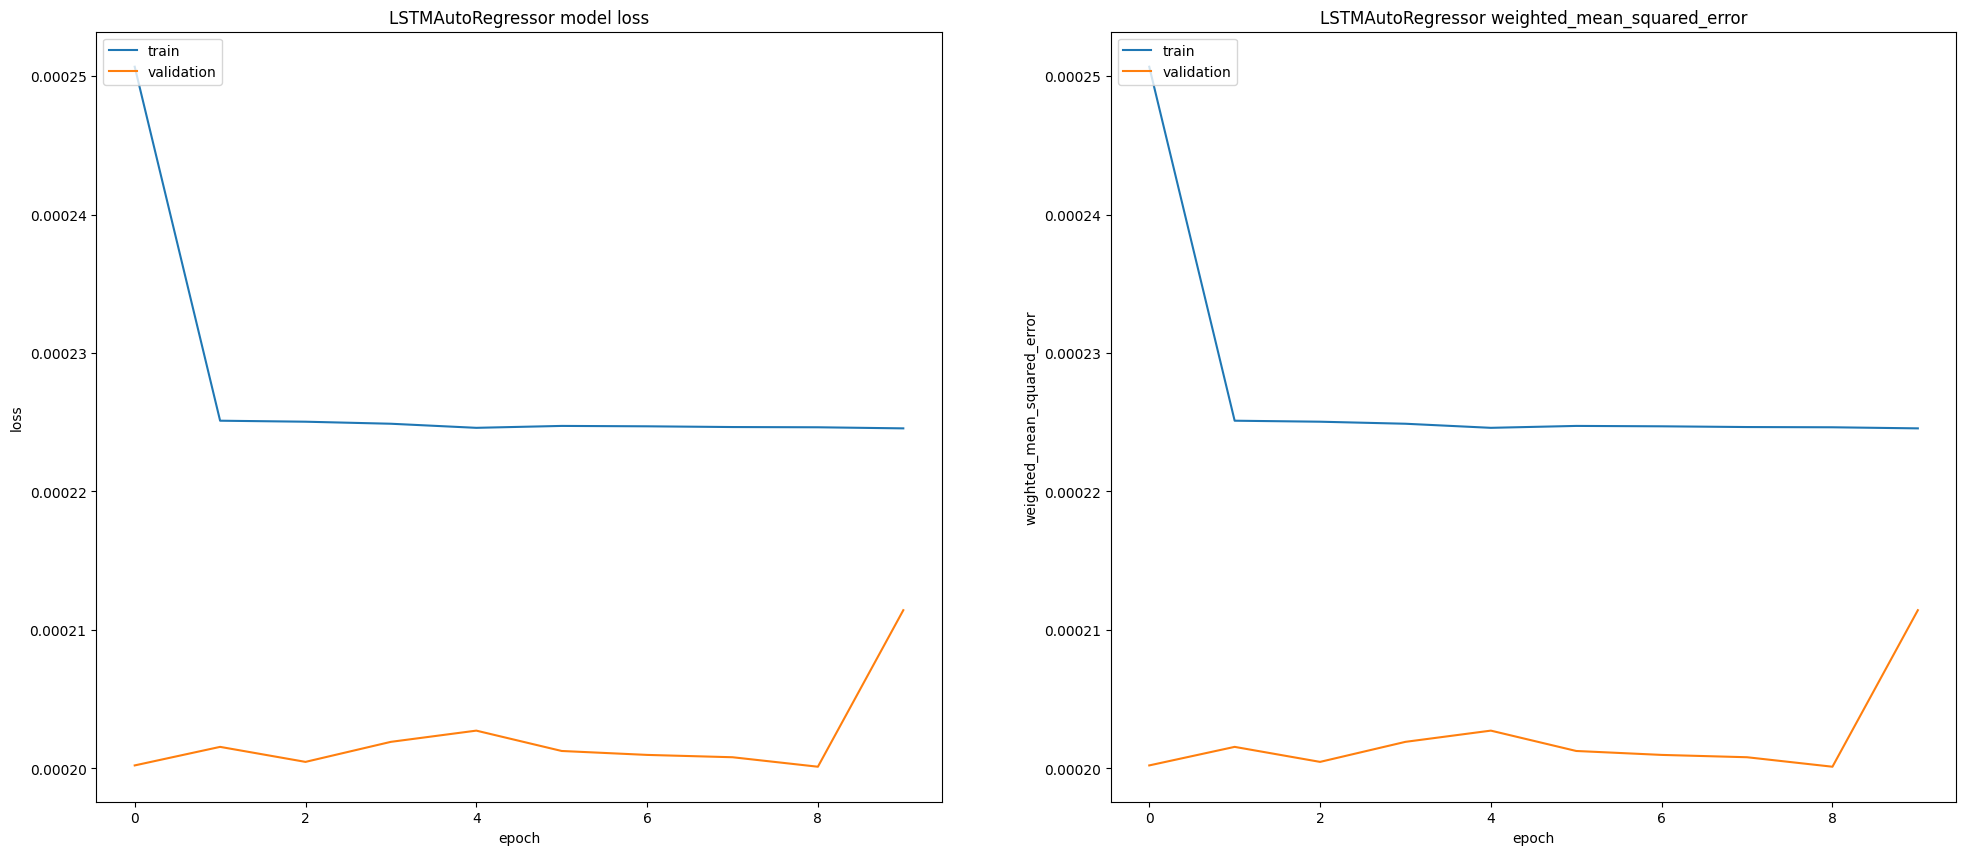

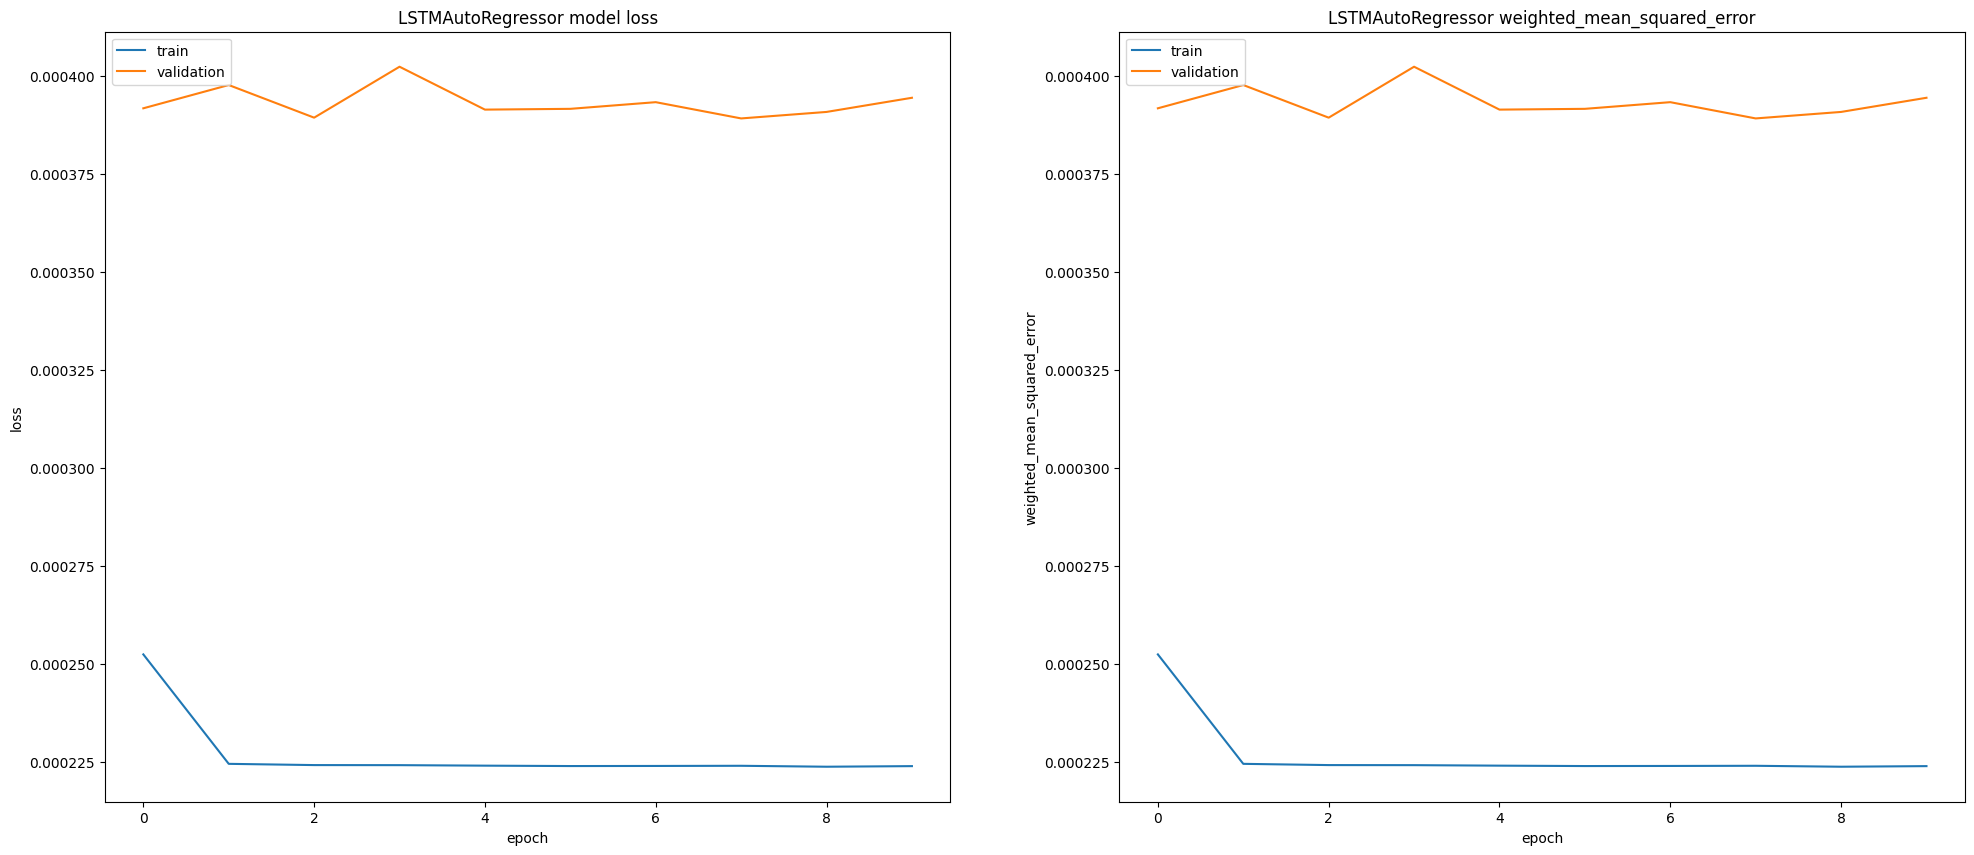

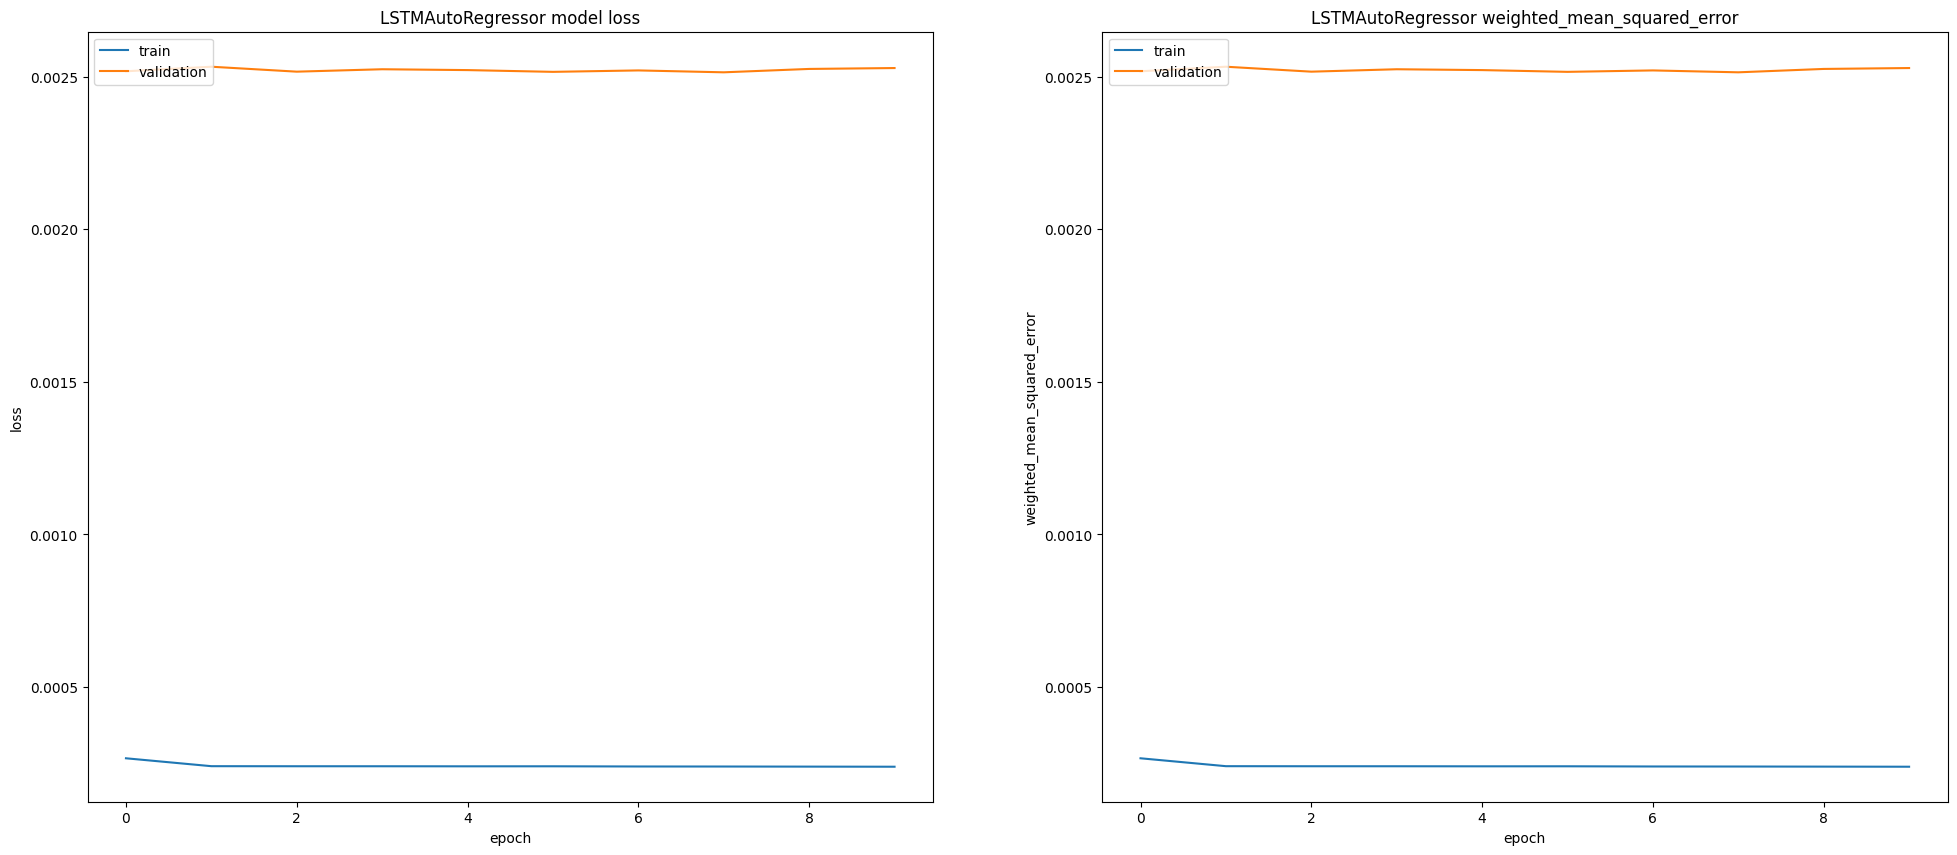

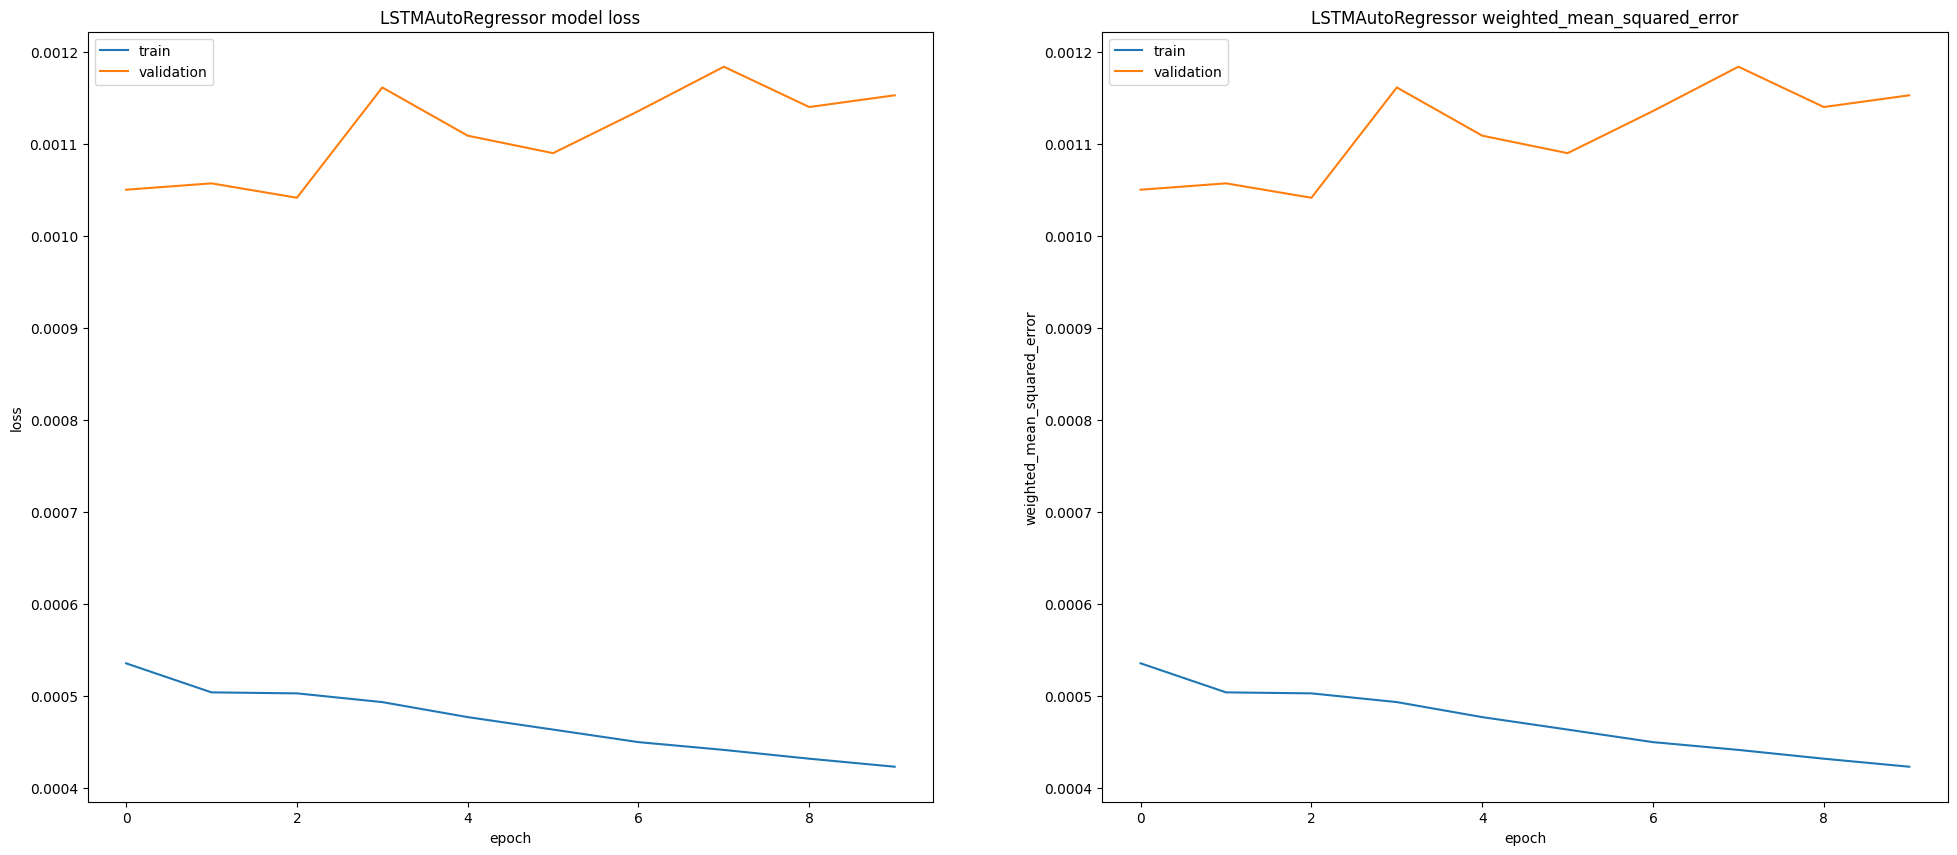

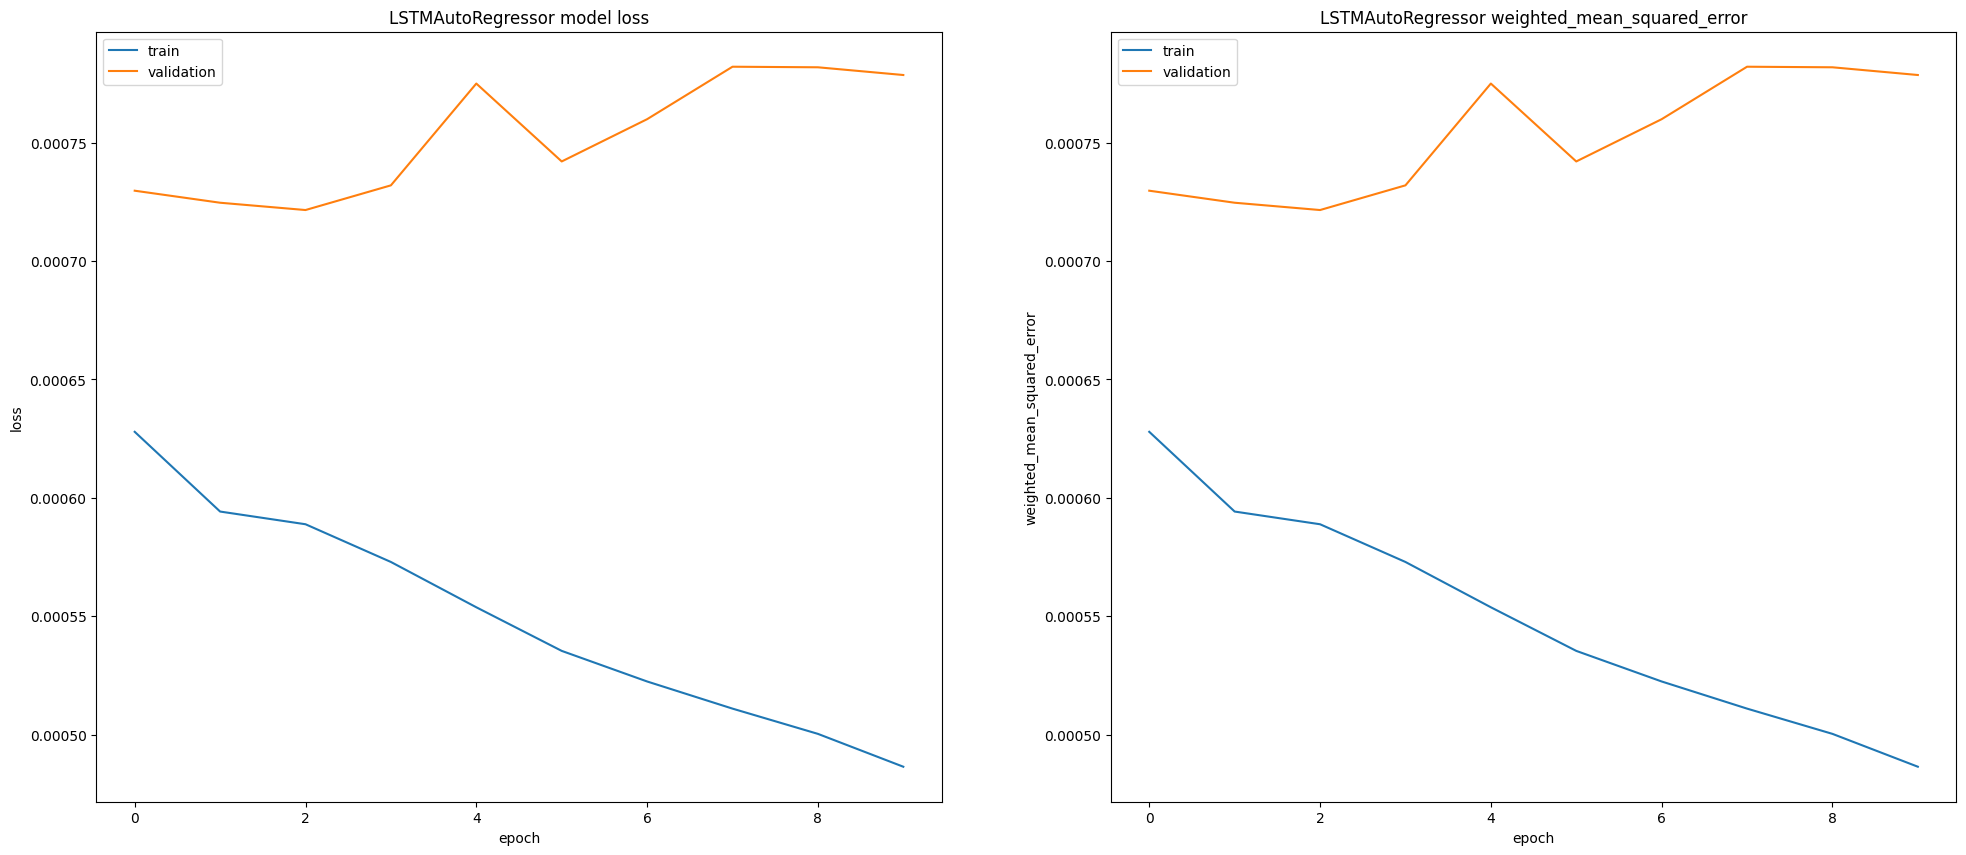

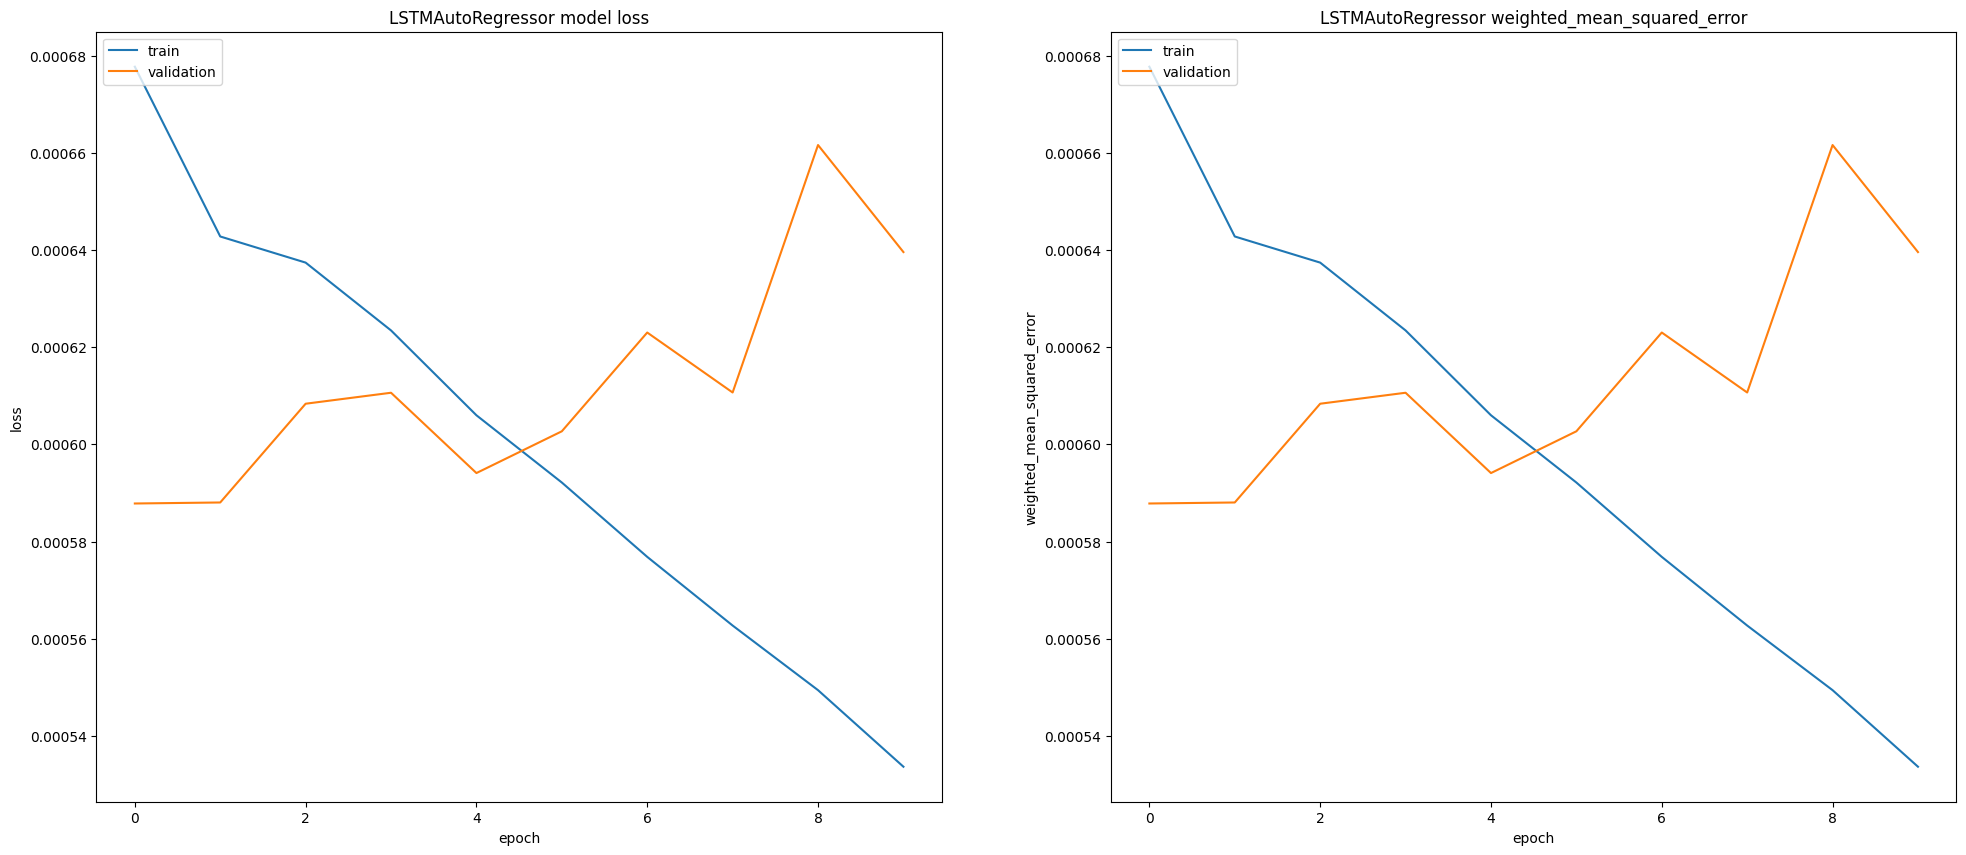

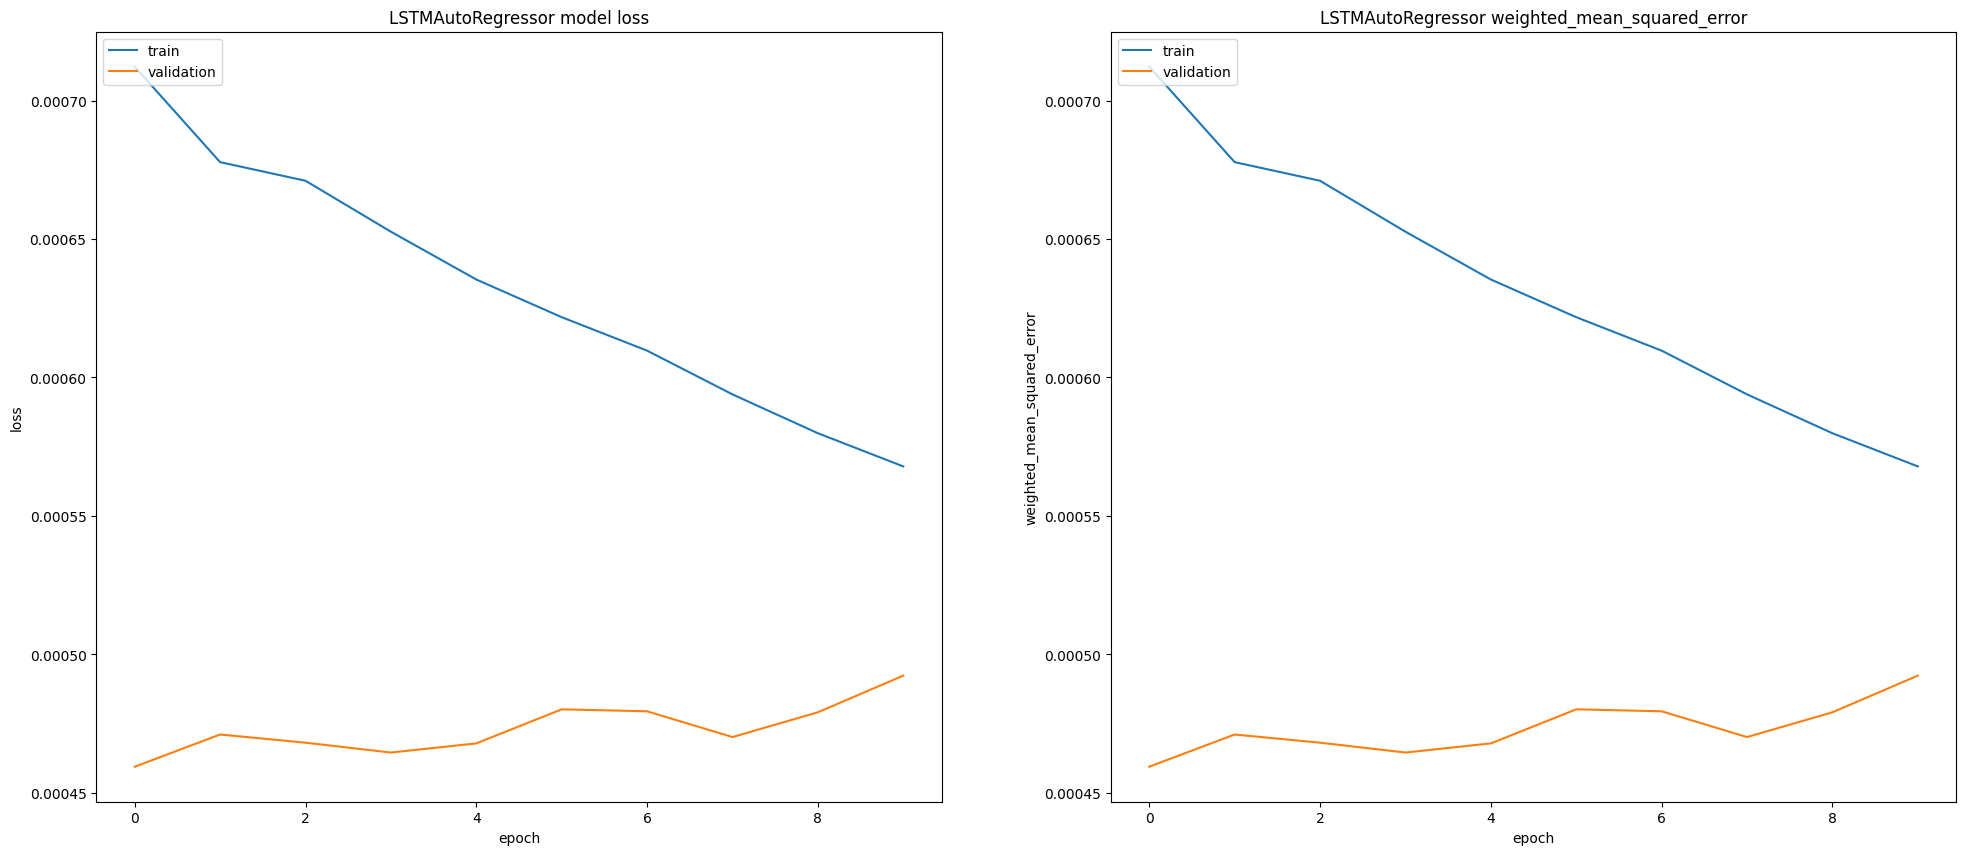

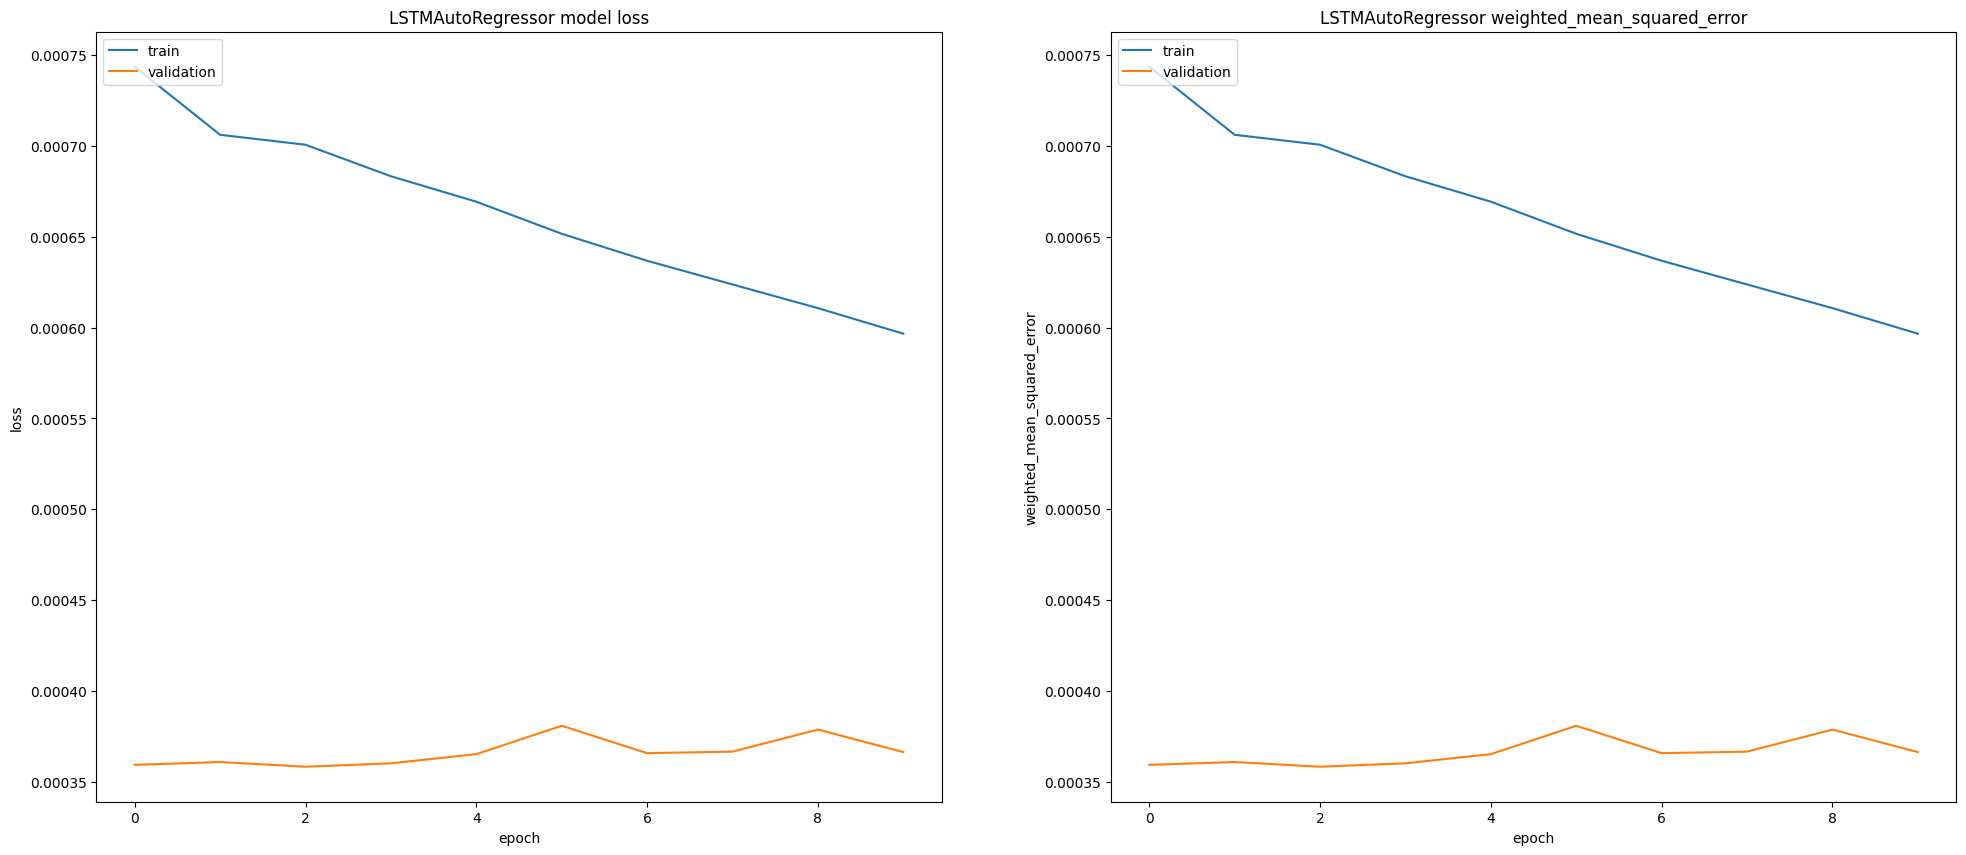

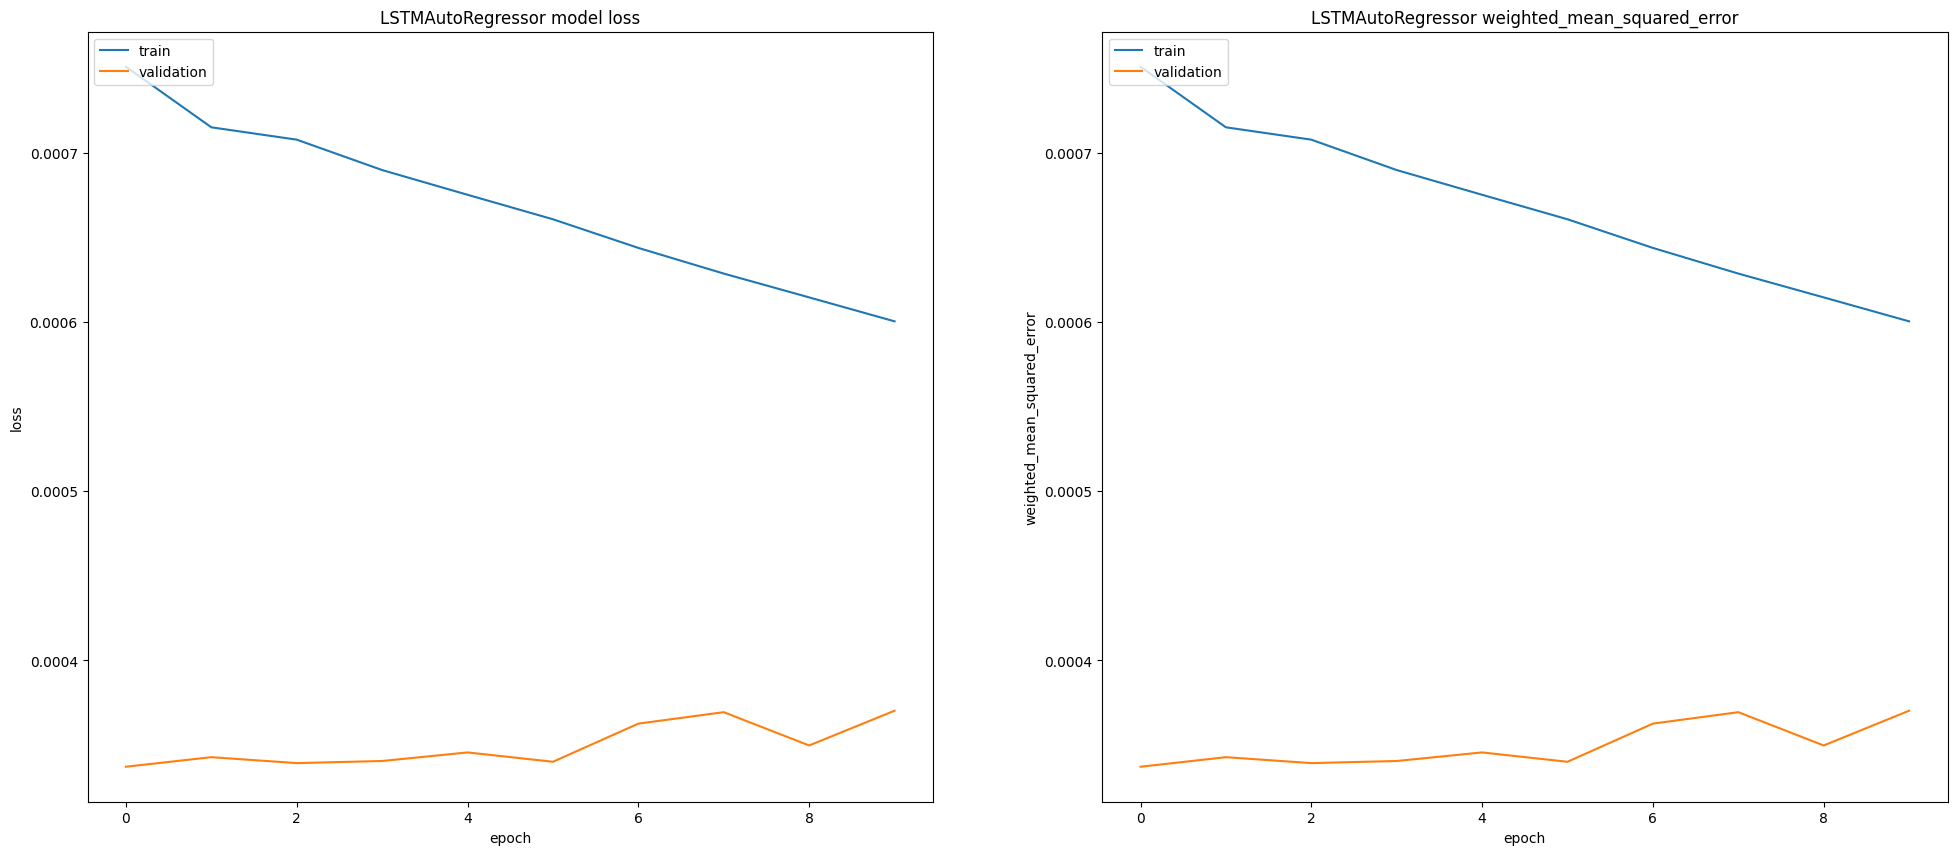

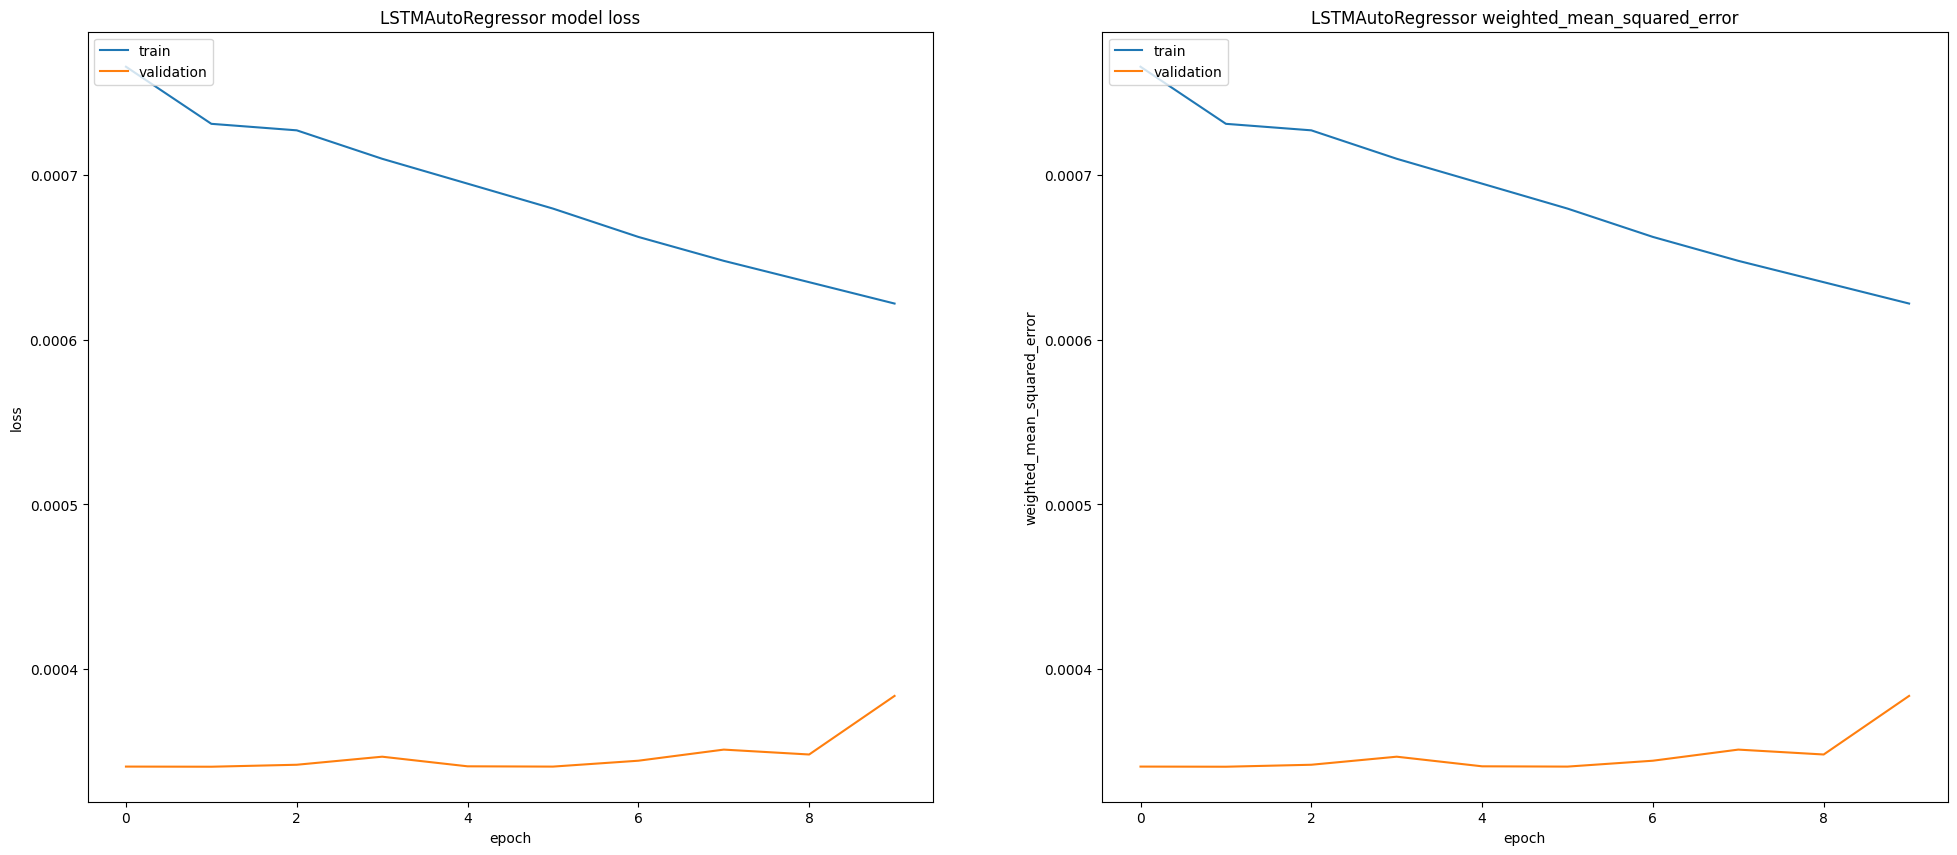

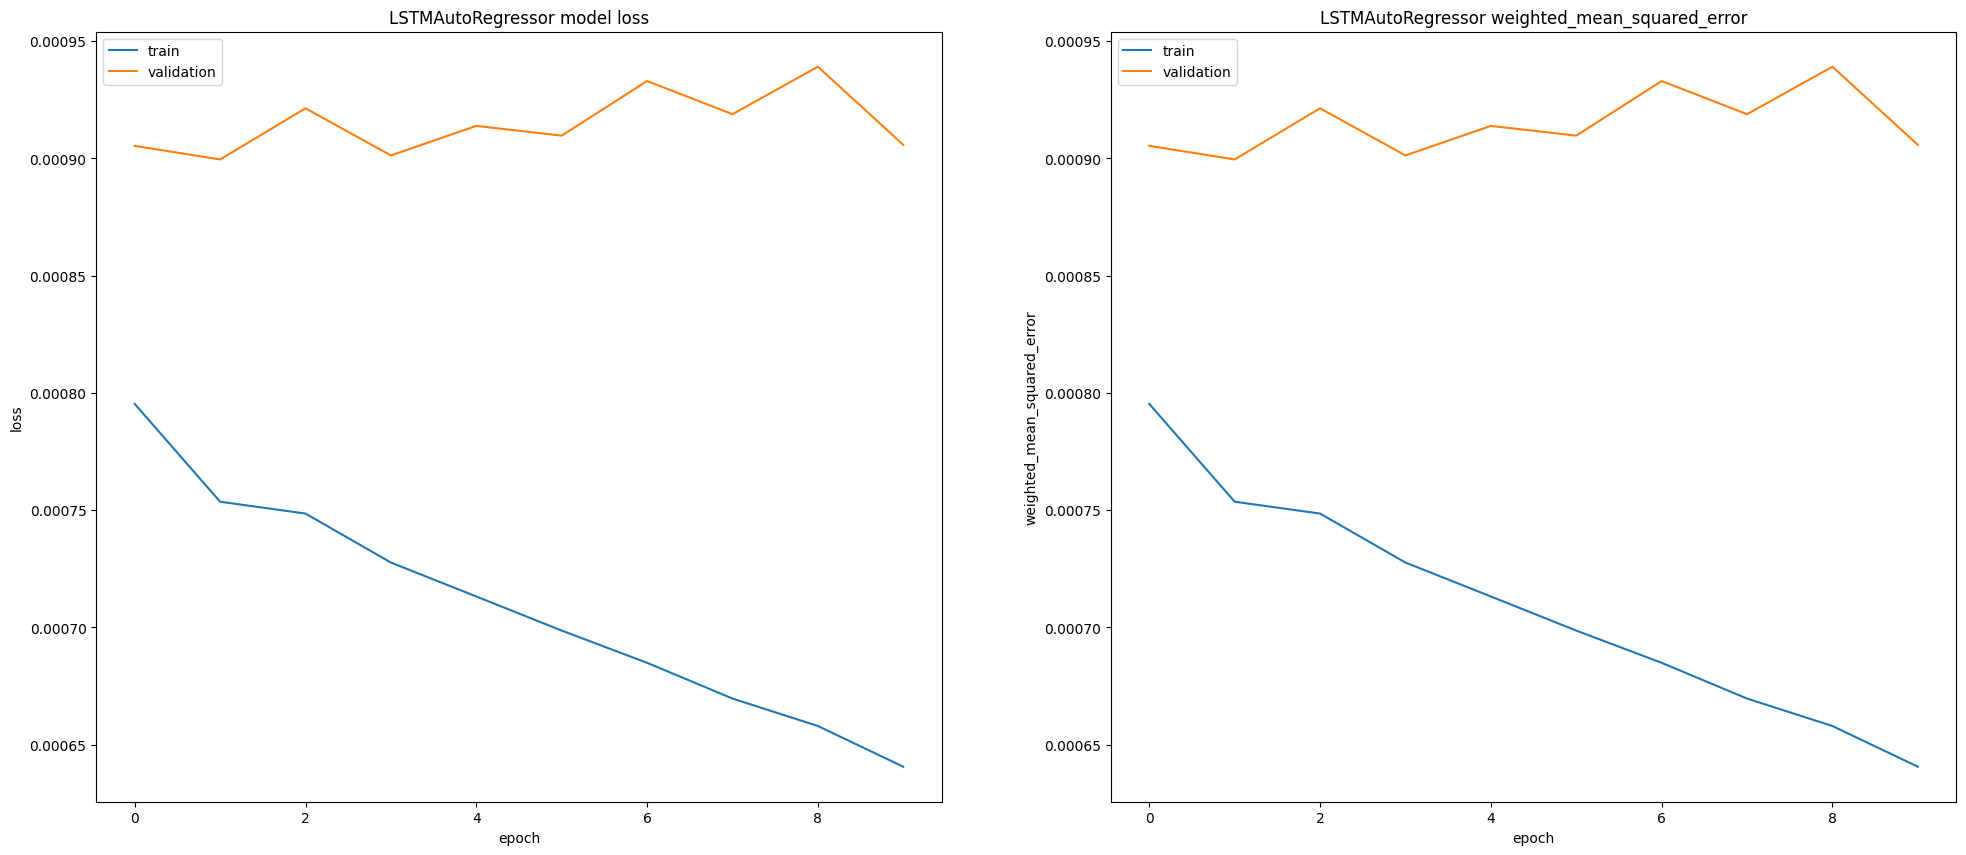

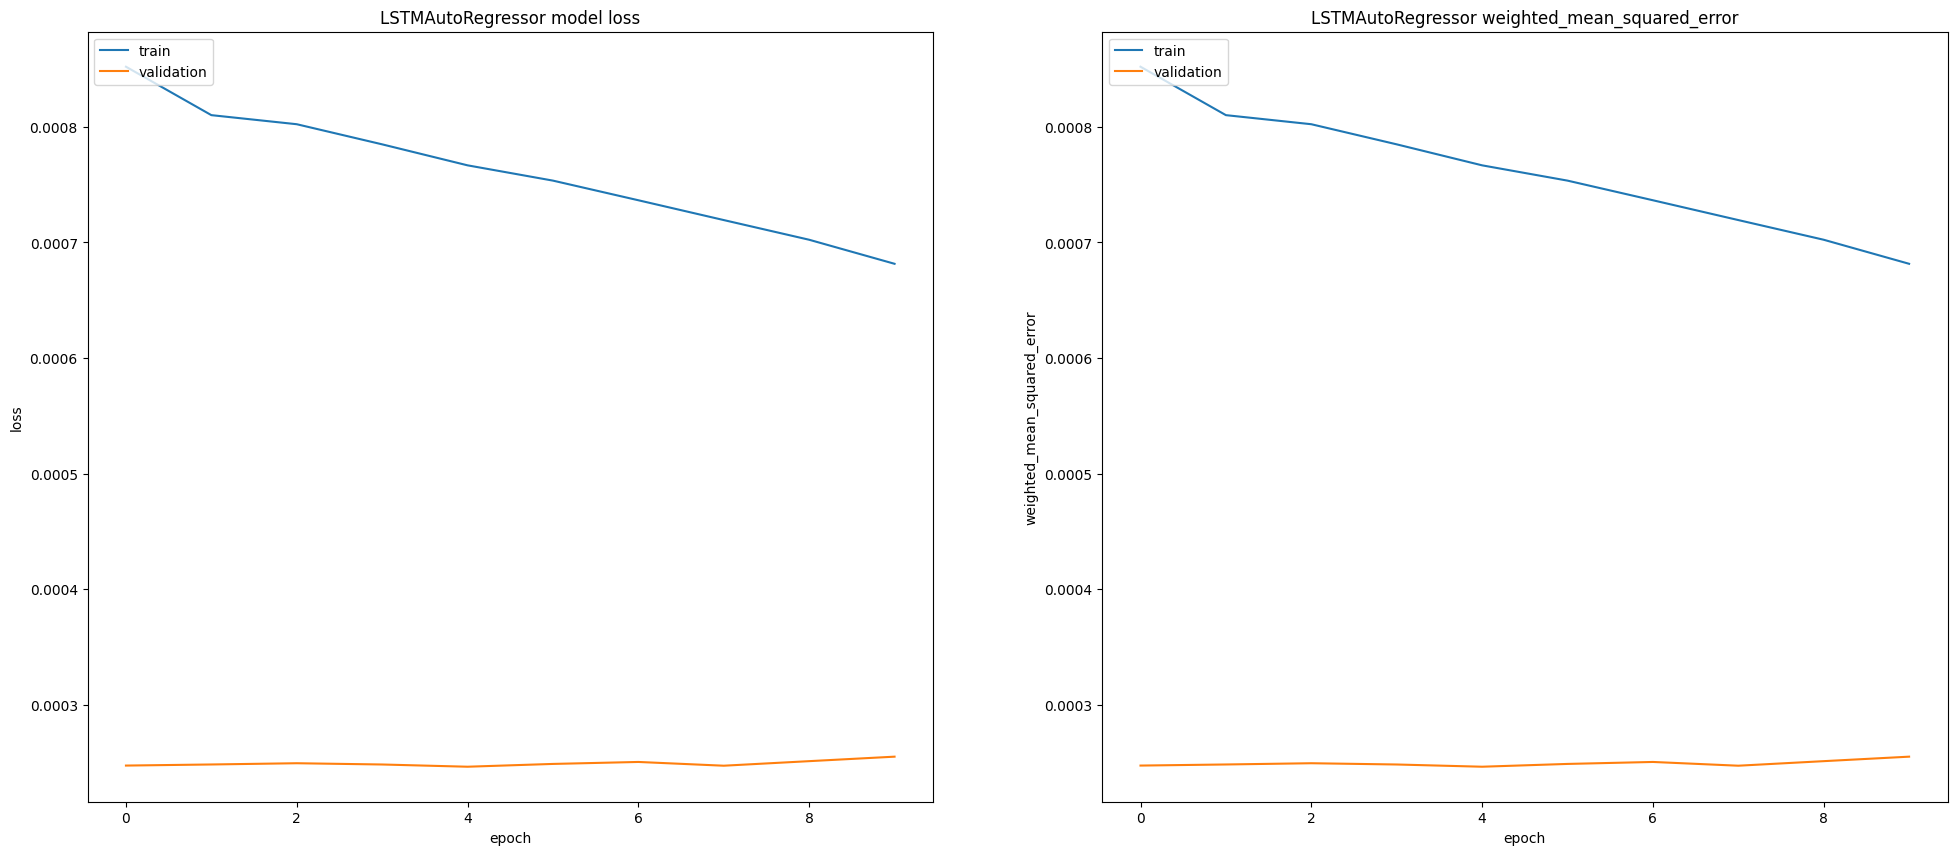

In [2]:
from Stlearn.Factory import *
from Stlearn.Portfolio import *
from tqdm import tqdm

train_start_date_s = '2019-01-01'
val_start_date_s = '2020-01-01'
test_start_date_s = '2020-02-01'
test_end_date_s = '2020-03-01'

freq = 'month'
offset = 1
limit = 12

train_start_date_generator = DateGenerator(Date.create_from_str(train_start_date_s), freq, offset, limit)
val_start_date_generator = DateGenerator(Date.create_from_str(val_start_date_s), freq, offset, limit)
test_start_date_generator = DateGenerator(Date.create_from_str(test_start_date_s), freq, offset, limit)
test_end_date_generator = DateGenerator(Date.create_from_str(test_end_date_s), freq, offset, limit)

# while (train_start_date_generator.has_next()):
for i in tqdm(range(limit)):
    
    train_start_date = train_start_date_generator.next()
    val_start_date = val_start_date_generator.next()
    test_start_date = test_start_date_generator.next()
    test_end_date = test_end_date_generator.next()
    
    lg = 'Train[{} To {}), Validation[{} To {}), Test[{} To {})'.format(
        str(train_start_date), str(val_start_date), 
        str(val_start_date), str(test_start_date),
        str(test_start_date), str(test_end_date))
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    print(lg)
    
    lstmf = LSTMAutoRegressorFactory(str(train_start_date), str(val_start_date), 
                           str(test_start_date), str(test_end_date), 60)
    data = lstmf.create_data()
    model = lstmf.create_model()
    model.fit(data)
    model.evaluate(data, 'val')
    model.info()

    portfolio = LongRandomPortfolio(data, model)
    print("Long Randomly Picked Stock Portfolio Performance: " + str(portfolio.performance))
    portfolio = LongBestPortfolio(data, model)
    print("Long Best Predicted Stock Portfolio Performance: " + str(portfolio.performance))
    portfolio = LongBestThreePortfolio(data, model)
    print("Long Three Highest Predicted Stock Portfolio Performance: " + str(portfolio.performance))
    portfolio = LongShortBestShotPortfolio(data, model)
    print("Long Short Best Shot Portfolio Performance: " + str(portfolio.performance))
    portfolio = LongMarketPortfolio(data, model)
    print("Long Market Portfolio Performance: " + str(portfolio.performance))
    
    del lstmf, model, data

In [3]:
print("Long Randomly Picked Stock Portfolio Performance: " + str(LongRandomPortfolio.global_portfolio.performance))
print("Long Best Predicted Stock Portfolio Performance: " + str(LongBestPortfolio.global_portfolio.performance))
print("Long Three Highest Predicted Stock Portfolio Performance: " + str(LongBestThreePortfolio.global_portfolio.performance))
print("Long Short Best Shot Portfolio Performance: " + str(LongShortBestShotPortfolio.global_portfolio.performance))
print("Long Market Portfolio Performance: " + str(LongMarketPortfolio.global_portfolio.performance))

Long Randomly Picked Stock Portfolio Performance: [2020-02-03 00:00:00 - 2021-01-29 00:00:00] mean return: 0.82, volatility: 0.68, sharpe ratio: 1.16
Long Best Predicted Stock Portfolio Performance: [2020-02-03 00:00:00 - 2021-01-29 00:00:00] mean return: 1.44, volatility: 0.84, sharpe ratio: 1.67
Long Three Highest Predicted Stock Portfolio Performance: [2020-02-03 00:00:00 - 2021-01-29 00:00:00] mean return: 0.60, volatility: 0.63, sharpe ratio: 0.90
Long Short Best Shot Portfolio Performance: [2020-02-03 00:00:00 - 2021-01-29 00:00:00] mean return: 0.63, volatility: 0.88, sharpe ratio: 0.69
Long Market Portfolio Performance: [2020-02-03 00:00:00 - 2021-01-29 00:00:00] mean return: 0.22, volatility: 0.35, sharpe ratio: 0.56


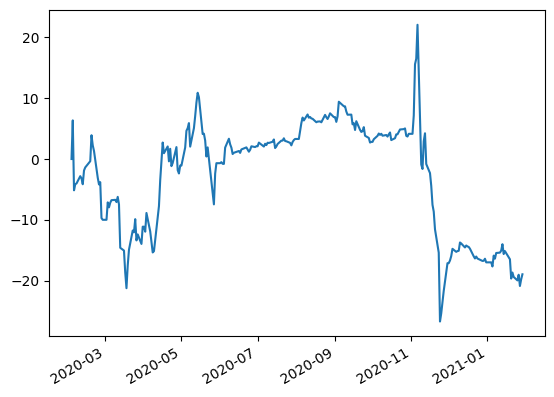

In [4]:
LongShortBestShotPortfolio.global_portfolio.performance.plot_portfolio_value()

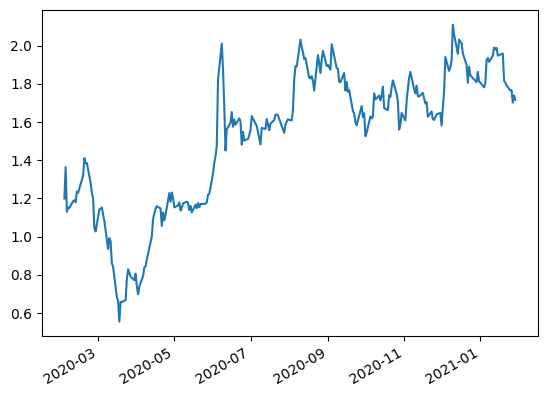

In [5]:
LongBestPortfolio.global_portfolio.performance.plot_portfolio_value()

In [1]:
import sys
sys.path.append('./Stlearn')
import Constant
# Do any configuration here

C:\Users\yzyan\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-06-01 To 2020-01-01), Validation[2020-01-01 To 2020-02-01), Test[2020-02-01 To 2020-03-01)
X_train shape: (119, 30, 488, 152)
y_train shape: (119, 15, 488, 1)
X_valid shape: (21, 30, 488, 152)
y_valid shape: (21, 15, 488, 1)
Epoch 1/10
4/4 [==============================] - 69s 10s/step - loss: 0.0476 - mean_squared_error: 0.0476 - weighted_mean_squared_error: 0.0476 - val_loss: 0.0527 - val_mean_squared_error: 0.0527 - val_weighted_mean_squared_error: 0.0527
Epoch 2/10
4/4 [==============================] - 35s 9s/step - loss: 0.0477 - mean_squared_error: 0.0477 - weighted_mean_squared_error: 0.0477 - val_loss: 0.0536 - val_mean_squared_error: 0.0536 - val_weighted_mean_squared_error: 0.0536
Epoch 3/10
4/4 [==============================] - 35s 9s/step - loss: 0.0479 - mean_squared_error: 0.0479 - weighted_mean_squared_error: 0.0479 - val_loss: 0.0544 - val_mean_squared_error: 0.0544 - val

 50%|█████████████████████████████████████████▌                                         | 1/2 [07:00<07:00, 420.55s/it]

Long Short Best Shot Portfolio Performance: [2020-02-03 00:00:00 - 2020-02-28 00:00:00] mean return: -0.17, volatility: 0.18, sharpe ratio: -1.13
Long Market Portfolio Performance: [2020-02-03 00:00:00 - 2020-02-28 00:00:00] mean return: -0.68, volatility: 0.25, sharpe ratio: -2.86
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Train[2019-07-01 To 2020-02-01), Validation[2020-02-01 To 2020-03-01), Test[2020-03-01 To 2020-04-01)
X_train shape: (120, 30, 488, 152)
y_train shape: (120, 15, 488, 1)
X_valid shape: (19, 30, 488, 152)
y_valid shape: (19, 15, 488, 1)
Epoch 1/10
4/4 [==============================] - 71s 9s/step - loss: 0.0477 - mean_squared_error: 0.0477 - weighted_mean_squared_error: 0.0477 - val_loss: 0.0560 - val_mean_squared_error: 0.0560 - val_weighted_mean_squared_error: 0.0560
Epoch 2/10
4/4 [==============================] - 34s 9s/step - loss: 0.0472 - mean_squared_error: 0.0472 - weighted_mean_squared_error: 0.0472 - val_loss: 0

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [14:41<00:00, 440.70s/it]

Long Short Best Shot Portfolio Performance: [2020-03-02 00:00:00 - 2020-03-31 00:00:00] mean return: -0.97, volatility: 1.50, sharpe ratio: -0.67
Long Market Portfolio Performance: [2020-03-02 00:00:00 - 2020-03-31 00:00:00] mean return: -0.67, volatility: 0.93, sharpe ratio: -0.75


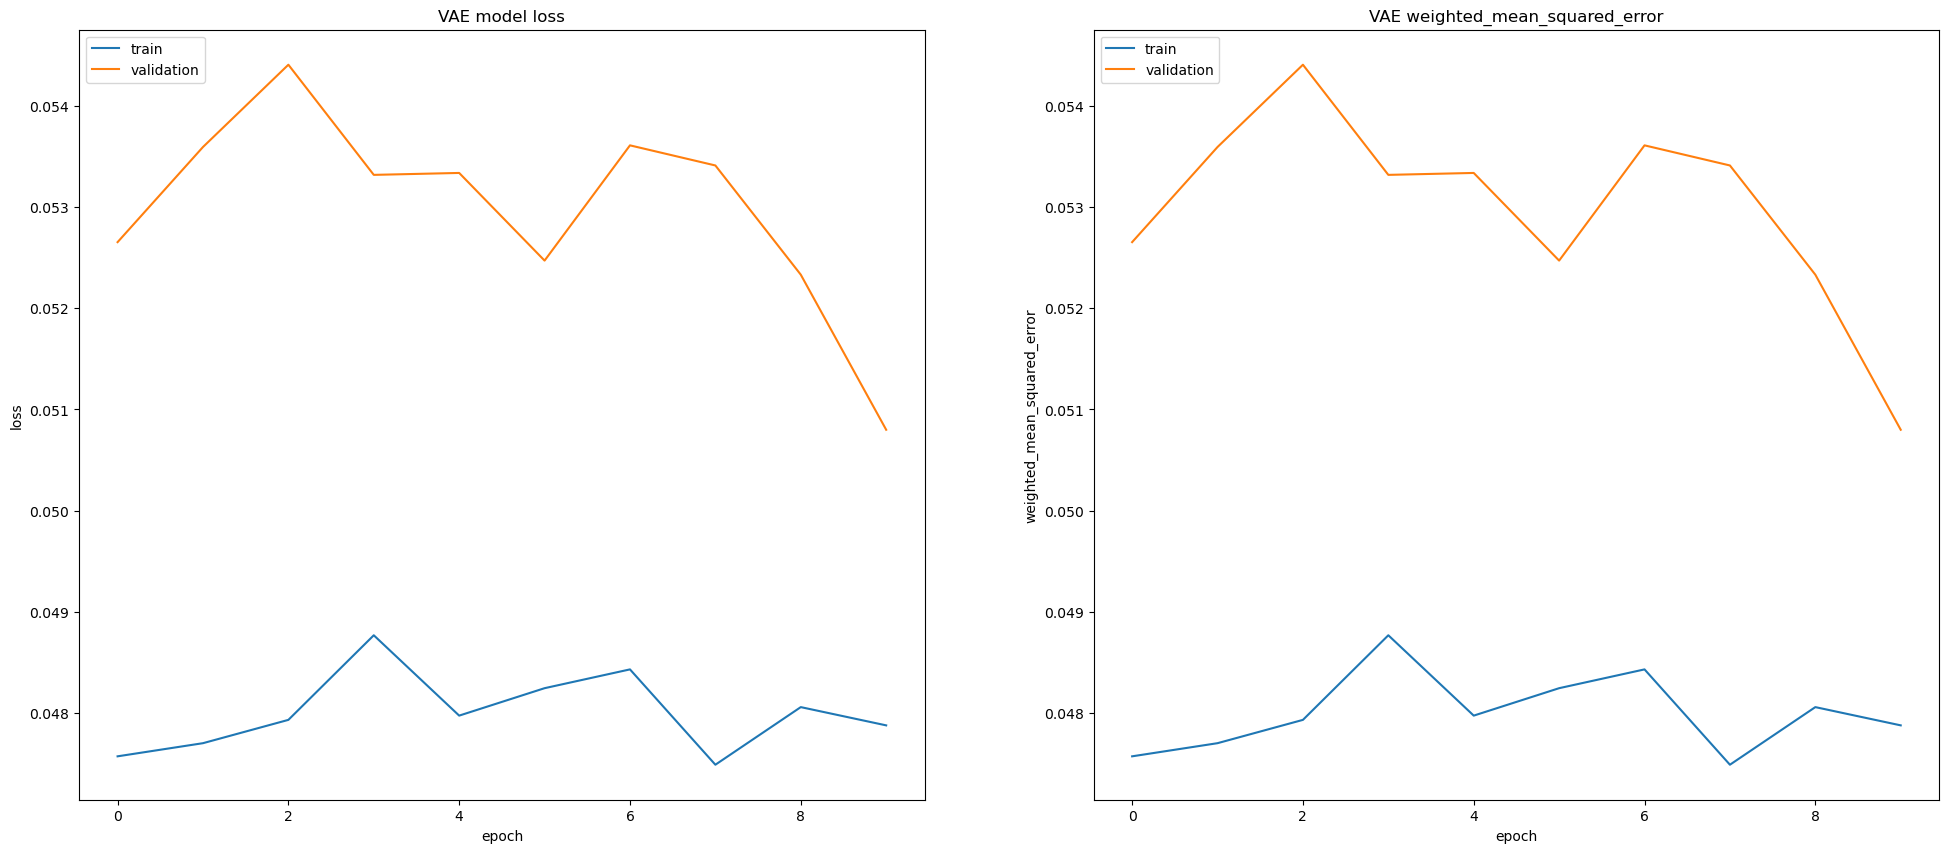

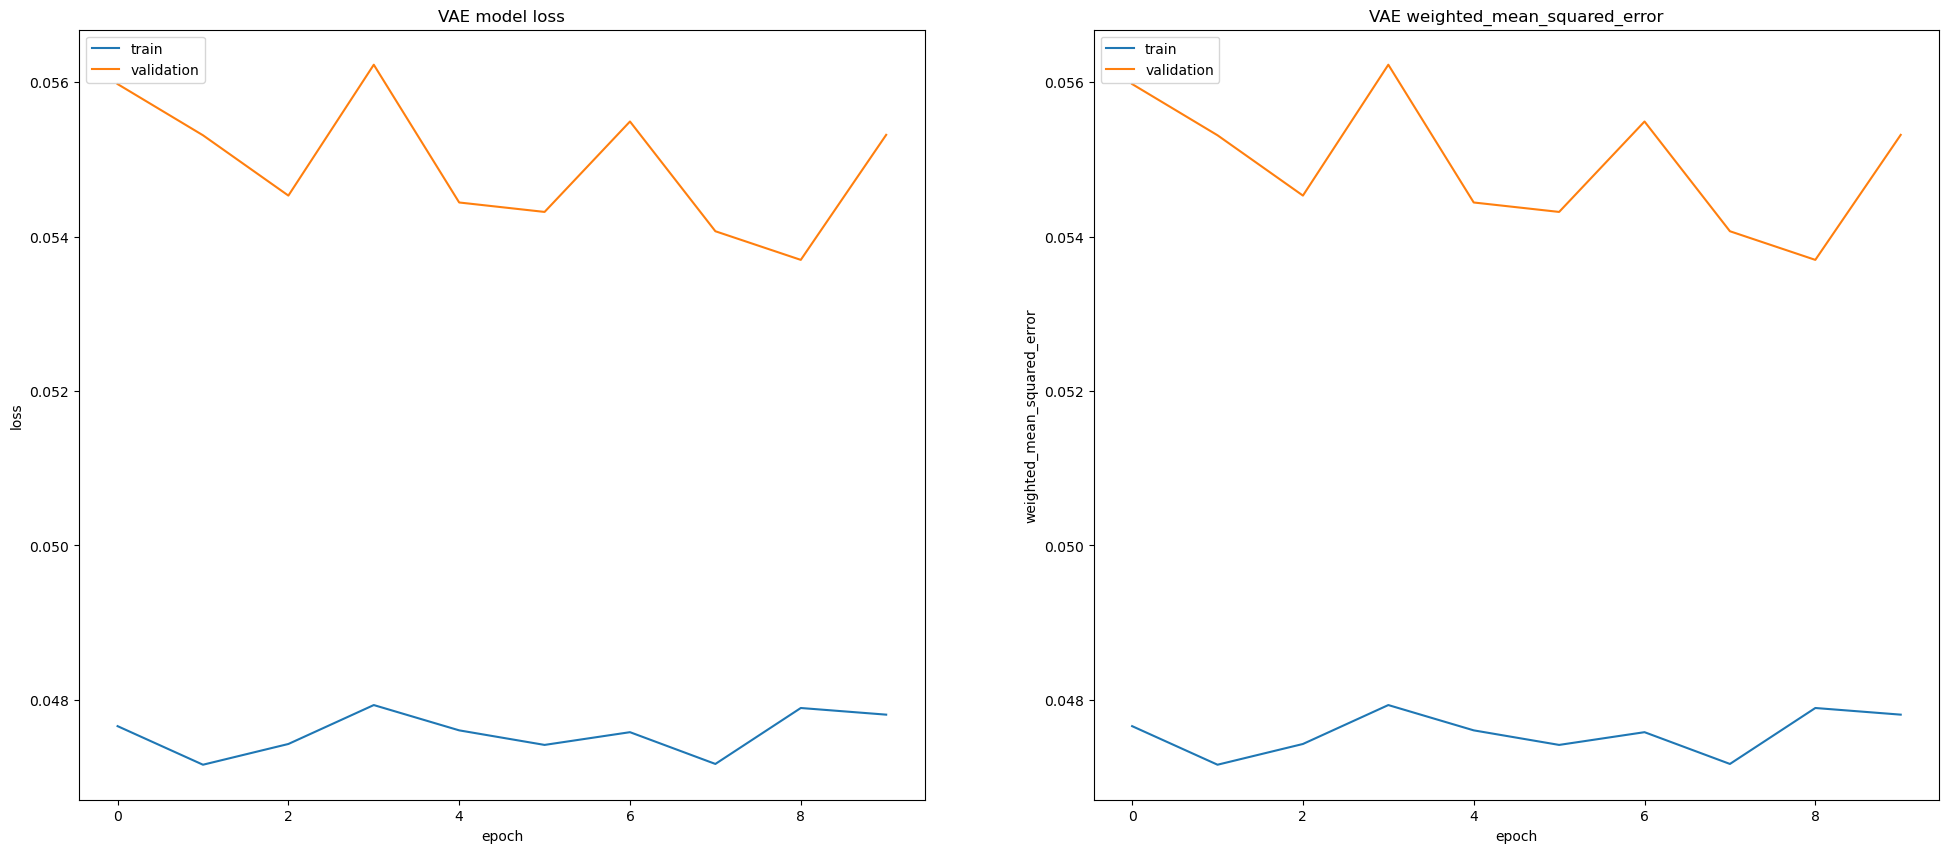

In [2]:
from Stlearn.Factory import *
from Stlearn.Portfolio import *
from tqdm import tqdm

train_start_date_s = '2019-06-01'
val_start_date_s = '2020-01-01'
test_start_date_s = '2020-02-01'
test_end_date_s = '2020-03-01'

freq = 'month'
offset = 1
limit = 2

train_start_date_generator = DateGenerator(Date.create_from_str(train_start_date_s), freq, offset, limit)
val_start_date_generator = DateGenerator(Date.create_from_str(val_start_date_s), freq, offset, limit)
test_start_date_generator = DateGenerator(Date.create_from_str(test_start_date_s), freq, offset, limit)
test_end_date_generator = DateGenerator(Date.create_from_str(test_end_date_s), freq, offset, limit)

# while (train_start_date_generator.has_next()):
for i in tqdm(range(limit)):
    
    train_start_date = train_start_date_generator.next()
    val_start_date = val_start_date_generator.next()
    test_start_date = test_start_date_generator.next()
    test_end_date = test_end_date_generator.next()
    
    lg = 'Train[{} To {}), Validation[{} To {}), Test[{} To {})'.format(
        str(train_start_date), str(val_start_date), 
        str(val_start_date), str(test_start_date),
        str(test_start_date), str(test_end_date))
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    print(lg)
    
    lstmf = ConditionalVariationAutoEncoderFactory(str(train_start_date), str(val_start_date), 
                           str(test_start_date), str(test_end_date))
    data = lstmf.create_data()
    model = lstmf.create_model()
    model.fit(data)
    model.evaluate(data, 'val')
    model.info()

    portfolio = LongRandomPortfolio(data, model)
    print("Long Randomly Picked Stock Portfolio Performance: " + str(portfolio.performance))
    portfolio = LongBestPortfolio(data, model)
    print("Long Best Predicted Stock Portfolio Performance: " + str(portfolio.performance))
    portfolio = LongBestThreePortfolio(data, model)
    print("Long Three Highest Predicted Stock Portfolio Performance: " + str(portfolio.performance))
    portfolio = LongShortBestShotPortfolio(data, model)
    print("Long Short Best Shot Portfolio Performance: " + str(portfolio.performance))
    portfolio = LongMarketPortfolio(data, model)
    print("Long Market Portfolio Performance: " + str(portfolio.performance))
    
    del lstmf, model, data

In [3]:
print("Long Randomly Picked Stock Portfolio Performance: " + str(LongRandomPortfolio.global_portfolio.performance))
print("Long Best Predicted Stock Portfolio Performance: " + str(LongBestPortfolio.global_portfolio.performance))
print("Long Three Highest Predicted Stock Portfolio Performance: " + str(LongBestThreePortfolio.global_portfolio.performance))
print("Long Short Best Shot Portfolio Performance: " + str(LongShortBestShotPortfolio.global_portfolio.performance))
print("Long Market Portfolio Performance: " + str(LongMarketPortfolio.global_portfolio.performance))

Long Randomly Picked Stock Portfolio Performance: [2020-02-03 00:00:00 - 2020-03-31 00:00:00] mean return: -0.48, volatility: 0.86, sharpe ratio: -0.59
Long Best Predicted Stock Portfolio Performance: [2020-02-03 00:00:00 - 2020-03-31 00:00:00] mean return: -0.80, volatility: 0.88, sharpe ratio: -0.93
Long Three Highest Predicted Stock Portfolio Performance: [2020-02-03 00:00:00 - 2020-03-31 00:00:00] mean return: -0.84, volatility: 0.94, sharpe ratio: -0.93
Long Short Best Shot Portfolio Performance: [2020-02-03 00:00:00 - 2020-03-31 00:00:00] mean return: -0.87, volatility: 1.10, sharpe ratio: -0.82
Long Market Portfolio Performance: [2020-02-03 00:00:00 - 2020-03-31 00:00:00] mean return: -0.67, volatility: 0.70, sharpe ratio: -1.01


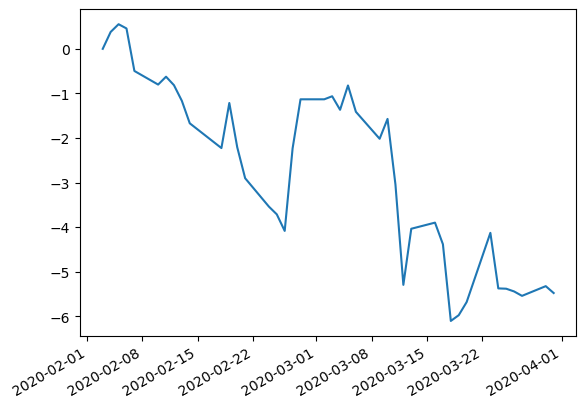

In [4]:
LongShortBestShotPortfolio.global_portfolio.performance.plot_portfolio_value()